In [203]:
# Show plots inline, and load main getdist plot module and samples class
from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples, loadMCSamples
import getdist
# use this *after* importing getdist if you want to use interactive plots
# %matplotlib notebook
import matplotlib.pyplot as plt
import IPython
import numpy as np
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
# matplotlib 2 may not work very well without usetex on, can uncomment
# plt.rcParams['text.usetex']=True
%pylab inline

import math as m
import statistics as s
from scipy import stats

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from scipy.integrate import quad

GetDist Version: 1.1.0, Matplotlib version: 3.1.3
Populating the interactive namespace from numpy and matplotlib


/home/kylar/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [204]:
def LCDM_perturb_reader(file, delim):
        
    #stable method to read in tabular data
    file = open(file)
    table = file.readlines()
    file.close()
    
    header_length = 2
    #defining the length of the actual data of the table
    i = len(table)-header_length
    
    #preallocating the arrays for memory
    tau = np.zeros(i)
    scale = np.zeros(i)
    
    delta_g = np.zeros(i)
    theta_g = np.zeros(i)
    shear_g = np.zeros(i)
    pol0_g = np.zeros(i)
    pol1_g = np.zeros(i)
    pol2_g = np.zeros(i)
    
    delta_b = np.zeros(i)
    theta_b = np.zeros(i)
    
    psi = np.zeros(i)
    phi = np.zeros(i)
    
    delta_ur = np.zeros(i)
    theta_ur = np.zeros(i)
    shear_ur = np.zeros(i)
    
    delta_cdm = np.zeros(i)
    theta_cdm = np.zeros(i)
    
    lc = 0
    
    for line in table:
        lc += 1
        i = lc - header_length - 1
        data = line.strip('\n').strip().split(delim)
        if lc>header_length:
            tau[i] = float(data[0])
            scale[i] = float(data[1])
            delta_g[i] = float(data[2])
            theta_g[i] = float(data[3])
            shear_g[i] = float(data[4])
            pol0_g[i] = float(data[5])
            pol1_g[i] = float(data[6])
            pol2_g[i] = float(data[7])
            
            delta_b[i] = float(data[8])
            theta_b[i] = float(data[9])
            
            psi[i] = float(data[10])
            phi[i] = float(data[11])
            
            delta_ur[i] = float(data[12])
            theta_ur[i] = float(data[13])
            shear_ur[i] = float(data[14])
            
            delta_cdm[i] = float(data[15])
            theta_cdm[i] = float(data[16])

    name = []
    for a in range(len(tau)):
        name.append([tau[a],scale[a],delta_g[a],theta_g[a],shear_g[a],pol0_g[a],pol1_g[a],
                     pol2_g[a],delta_b[a],theta_b[a],psi[a],phi[a],
                     delta_ur[a],theta_ur[a],shear_ur[a],delta_cdm[a],theta_cdm[a]])     
    
    return name

LCDM_perturb_k0 = LCDM_perturb_reader('output/bestfit_plc2018_perturbations_k0_s.dat','      ')
    
i = len(LCDM_perturb_k0)
LCDM_tau_k0 = np.zeros(i)
LCDM_scale_k0 = np.zeros(i)

LCDM_delta_g_k0 = np.zeros(i)
LCDM_theta_g_k0 = np.zeros(i)
LCDM_shear_g_k0 = np.zeros(i)
LCDM_pol0_g_k0 = np.zeros(i)
LCDM_pol1_g_k0 = np.zeros(i)
LCDM_pol2_g_k0 = np.zeros(i)

LCDM_delta_b_k0 = np.zeros(i)
LCDM_theta_b_k0 = np.zeros(i)

LCDM_psi_k0 = np.zeros(i)
LCDM_phi_k0 = np.zeros(i)

LCDM_delta_ur_k0 = np.zeros(i)
LCDM_theta_ur_k0 = np.zeros(i)
LCDM_shear_ur_k0 = np.zeros(i)

LCDM_delta_cdm_k0 = np.zeros(i)
LCDM_theta_cdm_k0 = np.zeros(i)

for i in range(len(LCDM_perturb_k0)):
    temp = LCDM_perturb_k0[i]
    
    LCDM_tau_k0[i] = temp[0]
    LCDM_scale_k0[i] = temp[1]
    
    LCDM_delta_g_k0[i] = temp[2]
    LCDM_theta_g_k0[i] = temp[3]
    LCDM_shear_g_k0[i] = temp[4]
    LCDM_pol0_g_k0[i] = temp[5]
    LCDM_pol1_g_k0[i] = temp[6]
    LCDM_pol2_g_k0[i] = temp[7]
    
    LCDM_delta_b_k0[i] = temp[8]
    LCDM_theta_b_k0[i] = temp[9]
    
    LCDM_psi_k0[i] = temp[10]
    LCDM_phi_k0[i] = temp[11]
    
    LCDM_delta_ur_k0[i] = temp[12]
    LCDM_theta_ur_k0[i] = temp[13]
    LCDM_shear_ur_k0[i] = temp[14]
    
    LCDM_delta_cdm_k0[i] = temp[15]
    LCDM_theta_cdm_k0[i] = temp[16]
    
LCDM_perturb_k1 = LCDM_perturb_reader('output/bestfit_plc2018_perturbations_k1_s.dat','      ')
    
i = len(LCDM_perturb_k1)
LCDM_tau_k1 = np.zeros(i)
LCDM_scale_k1 = np.zeros(i)

LCDM_delta_g_k1 = np.zeros(i)
LCDM_theta_g_k1 = np.zeros(i)
LCDM_shear_g_k1 = np.zeros(i)
LCDM_pol0_g_k1 = np.zeros(i)
LCDM_pol1_g_k1 = np.zeros(i)
LCDM_pol2_g_k1 = np.zeros(i)

LCDM_delta_b_k1 = np.zeros(i)
LCDM_theta_b_k1 = np.zeros(i)

LCDM_psi_k1 = np.zeros(i)
LCDM_phi_k1 = np.zeros(i)

LCDM_delta_ur_k1 = np.zeros(i)
LCDM_theta_ur_k1 = np.zeros(i)
LCDM_shear_ur_k1 = np.zeros(i)

LCDM_delta_cdm_k1 = np.zeros(i)
LCDM_theta_cdm_k1 = np.zeros(i)

for i in range(len(LCDM_perturb_k1)):
    temp = LCDM_perturb_k1[i]
    
    LCDM_tau_k1[i] = temp[0]
    LCDM_scale_k1[i] = temp[1]
    
    LCDM_delta_g_k1[i] = temp[2]
    LCDM_theta_g_k1[i] = temp[3]
    LCDM_shear_g_k1[i] = temp[4]
    LCDM_pol0_g_k1[i] = temp[5]
    LCDM_pol1_g_k1[i] = temp[6]
    LCDM_pol2_g_k1[i] = temp[7]
    
    LCDM_delta_b_k1[i] = temp[8]
    LCDM_theta_b_k1[i] = temp[9]
    
    LCDM_psi_k1[i] = temp[10]
    LCDM_phi_k1[i] = temp[11]
    
    LCDM_delta_ur_k1[i] = temp[12]
    LCDM_theta_ur_k1[i] = temp[13]
    LCDM_shear_ur_k1[i] = temp[14]
    
    LCDM_delta_cdm_k1[i] = temp[15]
    LCDM_theta_cdm_k1[i] = temp[16]
    
LCDM_perturb_k2 = LCDM_perturb_reader('output/bestfit_plc2018_perturbations_k2_s.dat','      ')
    
i = len(LCDM_perturb_k2)
LCDM_tau_k2 = np.zeros(i)
LCDM_scale_k2 = np.zeros(i)

LCDM_delta_g_k2 = np.zeros(i)
LCDM_theta_g_k2 = np.zeros(i)
LCDM_shear_g_k2 = np.zeros(i)
LCDM_pol0_g_k2 = np.zeros(i)
LCDM_pol1_g_k2 = np.zeros(i)
LCDM_pol2_g_k2 = np.zeros(i)

LCDM_delta_b_k2 = np.zeros(i)
LCDM_theta_b_k2 = np.zeros(i)

LCDM_psi_k2 = np.zeros(i)
LCDM_phi_k2 = np.zeros(i)

LCDM_delta_ur_k2 = np.zeros(i)
LCDM_theta_ur_k2 = np.zeros(i)
LCDM_shear_ur_k2 = np.zeros(i)

LCDM_delta_cdm_k2 = np.zeros(i)
LCDM_theta_cdm_k2 = np.zeros(i)

for i in range(len(LCDM_perturb_k2)):
    temp = LCDM_perturb_k2[i]
    
    LCDM_tau_k2[i] = temp[0]
    LCDM_scale_k2[i] = temp[1]
    
    LCDM_delta_g_k2[i] = temp[2]
    LCDM_theta_g_k2[i] = temp[3]
    LCDM_shear_g_k2[i] = temp[4]
    LCDM_pol0_g_k2[i] = temp[5]
    LCDM_pol1_g_k2[i] = temp[6]
    LCDM_pol2_g_k2[i] = temp[7]
    
    LCDM_delta_b_k2[i] = temp[8]
    LCDM_theta_b_k2[i] = temp[9]
    
    LCDM_psi_k2[i] = temp[10]
    LCDM_phi_k2[i] = temp[11]
    
    LCDM_delta_ur_k2[i] = temp[12]
    LCDM_theta_ur_k2[i] = temp[13]
    LCDM_shear_ur_k2[i] = temp[14]
    
    LCDM_delta_cdm_k2[i] = temp[15]
    LCDM_theta_cdm_k2[i] = temp[16]

In [205]:
def FFAT_perturb_reader(file, delim):
        
    #stable method to read in tabular data
    file = open(file)
    table = file.readlines()
    file.close()
    
    header_length = 2
    #defining the length of the actual data of the table
    i = len(table)-header_length
    
    #preallocating the arrays for memory
    tau = np.zeros(i)
    scale = np.zeros(i)
    
    delta_g = np.zeros(i)
    theta_g = np.zeros(i)
    shear_g = np.zeros(i)
    pol0_g = np.zeros(i)
    pol1_g = np.zeros(i)
    pol2_g = np.zeros(i)
    
    delta_b = np.zeros(i)
    theta_b = np.zeros(i)
    
    psi = np.zeros(i)
    phi = np.zeros(i)
    
    delta_ur = np.zeros(i)
    theta_ur = np.zeros(i)
    shear_ur = np.zeros(i)
    
    delta_idr = np.zeros(i)
    theta_idr = np.zeros(i)
    shear_idr = np.zeros(i)
    
    delta_cdm = np.zeros(i)
    theta_cdm = np.zeros(i)
    
    delta_idm = np.zeros(i)
    theta_idm = np.zeros(i)
    
    lc = 0
    
    for line in table:
        lc += 1
        i = lc - header_length - 1
        data = line.strip('\n').strip().split(delim)
        if lc>header_length:
            tau[i] = float(data[0])
            scale[i] = float(data[1])
            delta_g[i] = float(data[2])
            theta_g[i] = float(data[3])
            shear_g[i] = float(data[4])
            pol0_g[i] = float(data[5])
            pol1_g[i] = float(data[6])
            pol2_g[i] = float(data[7])
            
            delta_b[i] = float(data[8])
            theta_b[i] = float(data[9])
            
            psi[i] = float(data[10])
            phi[i] = float(data[11])
            
            delta_ur[i] = float(data[12])
            theta_ur[i] = float(data[13])
            shear_ur[i] = float(data[14])
            
            delta_idr[i] = float(data[15])
            theta_idr[i] = float(data[16])
            shear_idr[i] = float(data[17])
            
            delta_cdm[i] = float(data[18])
            theta_cdm[i] = float(data[19])
            
            delta_idm[i] = float(data[20])
            theta_idm[i] = float(data[21])

    name = []
    for a in range(len(tau)):
        name.append([tau[a],scale[a],delta_g[a],theta_g[a],shear_g[a],pol0_g[a],pol1_g[a],
                     pol2_g[a],delta_b[a],theta_b[a],psi[a],phi[a],delta_idr[a],theta_idr[a],shear_idr[a],
                     delta_ur[a],theta_ur[a],shear_ur[a],delta_cdm[a],theta_cdm[a],delta_idm[a],theta_idm[a]])     
    
    return name

FFAT_perturb_k0 = FFAT_perturb_reader('output/mirror_perturbations_k0_s.dat','      ')
    
i = len(FFAT_perturb_k0)
FFAT_tau_k0 = np.zeros(i)
FFAT_scale_k0 = np.zeros(i)

FFAT_delta_g_k0 = np.zeros(i)
FFAT_theta_g_k0 = np.zeros(i)
FFAT_shear_g_k0 = np.zeros(i)
FFAT_pol0_g_k0 = np.zeros(i)
FFAT_pol1_g_k0 = np.zeros(i)
FFAT_pol2_g_k0 = np.zeros(i)

FFAT_delta_b_k0 = np.zeros(i)
FFAT_theta_b_k0 = np.zeros(i)

FFAT_psi_k0 = np.zeros(i)
FFAT_phi_k0 = np.zeros(i)

FFAT_delta_ur_k0 = np.zeros(i)
FFAT_theta_ur_k0 = np.zeros(i)
FFAT_shear_ur_k0 = np.zeros(i)

FFAT_delta_idr_k0 = np.zeros(i)
FFAT_theta_idr_k0 = np.zeros(i)
FFAT_shear_idr_k0 = np.zeros(i)

FFAT_delta_cdm_k0 = np.zeros(i)
FFAT_theta_cdm_k0 = np.zeros(i)

FFAT_delta_idm_k0 = np.zeros(i)
FFAT_theta_idm_k0 = np.zeros(i)

for i in range(len(FFAT_perturb_k0)):
    temp = FFAT_perturb_k0[i]
    
    FFAT_tau_k0[i] = temp[0]
    FFAT_scale_k0[i] = temp[1]
    
    FFAT_delta_g_k0[i] = temp[2]
    FFAT_theta_g_k0[i] = temp[3]
    FFAT_shear_g_k0[i] = temp[4]
    FFAT_pol0_g_k0[i] = temp[5]
    FFAT_pol1_g_k0[i] = temp[6]
    FFAT_pol2_g_k0[i] = temp[7]
    
    FFAT_delta_b_k0[i] = temp[8]
    FFAT_theta_b_k0[i] = temp[9]
    
    FFAT_psi_k0[i] = temp[10]
    FFAT_phi_k0[i] = temp[11]
    
    FFAT_delta_ur_k0[i] = temp[12]
    FFAT_theta_ur_k0[i] = temp[13]
    FFAT_shear_ur_k0[i] = temp[14]
    
    FFAT_delta_cdm_k0[i] = temp[18]
    FFAT_theta_cdm_k0[i] = temp[19]
    
FFAT_perturb_k1 = FFAT_perturb_reader('output/mirror_perturbations_k1_s.dat','      ')
    
i = len(FFAT_perturb_k1)
FFAT_tau_k1 = np.zeros(i)
FFAT_scale_k1 = np.zeros(i)

FFAT_delta_g_k1 = np.zeros(i)
FFAT_theta_g_k1 = np.zeros(i)
FFAT_shear_g_k1 = np.zeros(i)
FFAT_pol0_g_k1 = np.zeros(i)
FFAT_pol1_g_k1 = np.zeros(i)
FFAT_pol2_g_k1 = np.zeros(i)

FFAT_delta_b_k1 = np.zeros(i)
FFAT_theta_b_k1 = np.zeros(i)

FFAT_psi_k1 = np.zeros(i)
FFAT_phi_k1 = np.zeros(i)

FFAT_delta_ur_k1 = np.zeros(i)
FFAT_theta_ur_k1 = np.zeros(i)
FFAT_shear_ur_k1 = np.zeros(i)

FFAT_delta_cdm_k1 = np.zeros(i)
FFAT_theta_cdm_k1 = np.zeros(i)

for i in range(len(FFAT_perturb_k1)):
    temp = FFAT_perturb_k1[i]
    
    FFAT_tau_k1[i] = temp[0]
    FFAT_scale_k1[i] = temp[1]
    
    FFAT_delta_g_k1[i] = temp[2]
    FFAT_theta_g_k1[i] = temp[3]
    FFAT_shear_g_k1[i] = temp[4]
    FFAT_pol0_g_k1[i] = temp[5]
    FFAT_pol1_g_k1[i] = temp[6]
    FFAT_pol2_g_k1[i] = temp[7]
    
    FFAT_delta_b_k1[i] = temp[8]
    FFAT_theta_b_k1[i] = temp[9]
    
    FFAT_psi_k1[i] = temp[10]
    FFAT_phi_k1[i] = temp[11]
    
    FFAT_delta_ur_k1[i] = temp[12]
    FFAT_theta_ur_k1[i] = temp[13]
    FFAT_shear_ur_k1[i] = temp[14]
    
    FFAT_delta_cdm_k1[i] = temp[18]
    FFAT_theta_cdm_k1[i] = temp[19]
    
FFAT_perturb_k2 = FFAT_perturb_reader('output/mirror_perturbations_k2_s.dat','      ')
    
i = len(FFAT_perturb_k2)
FFAT_tau_k2 = np.zeros(i)
FFAT_scale_k2 = np.zeros(i)

FFAT_delta_g_k2 = np.zeros(i)
FFAT_theta_g_k2 = np.zeros(i)
FFAT_shear_g_k2 = np.zeros(i)
FFAT_pol0_g_k2 = np.zeros(i)
FFAT_pol1_g_k2 = np.zeros(i)
FFAT_pol2_g_k2 = np.zeros(i)

FFAT_delta_b_k2 = np.zeros(i)
FFAT_theta_b_k2 = np.zeros(i)

FFAT_psi_k2 = np.zeros(i)
FFAT_phi_k2 = np.zeros(i)

FFAT_delta_ur_k2 = np.zeros(i)
FFAT_theta_ur_k2 = np.zeros(i)
FFAT_shear_ur_k2 = np.zeros(i)

FFAT_delta_cdm_k2 = np.zeros(i)
FFAT_theta_cdm_k2 = np.zeros(i)

for i in range(len(FFAT_perturb_k2)):
    temp = FFAT_perturb_k2[i]
    
    FFAT_tau_k2[i] = temp[0]
    FFAT_scale_k2[i] = temp[1]
    
    FFAT_delta_g_k2[i] = temp[2]
    FFAT_theta_g_k2[i] = temp[3]
    FFAT_shear_g_k2[i] = temp[4]
    FFAT_pol0_g_k2[i] = temp[5]
    FFAT_pol1_g_k2[i] = temp[6]
    FFAT_pol2_g_k2[i] = temp[7]
    
    FFAT_delta_b_k2[i] = temp[8]
    FFAT_theta_b_k2[i] = temp[9]
    
    FFAT_psi_k2[i] = temp[10]
    FFAT_phi_k2[i] = temp[11]
    
    FFAT_delta_ur_k2[i] = temp[12]
    FFAT_theta_ur_k2[i] = temp[13]
    FFAT_shear_ur_k2[i] = temp[14]
    
    FFAT_delta_cdm_k2[i] = temp[18]
    FFAT_theta_cdm_k2[i] = temp[19]

In [206]:
LCDM_tau_k0 = (1/LCDM_scale_k0)-1
FFAT_tau_k0 = 1/FFAT_scale_k0-1

LCDM_tau_k1 = 1/LCDM_scale_k1-1
FFAT_tau_k1 = 1/FFAT_scale_k1-1

LCDM_tau_k2 = 1/LCDM_scale_k2-1
FFAT_tau_k2 = 1/FFAT_scale_k2-1

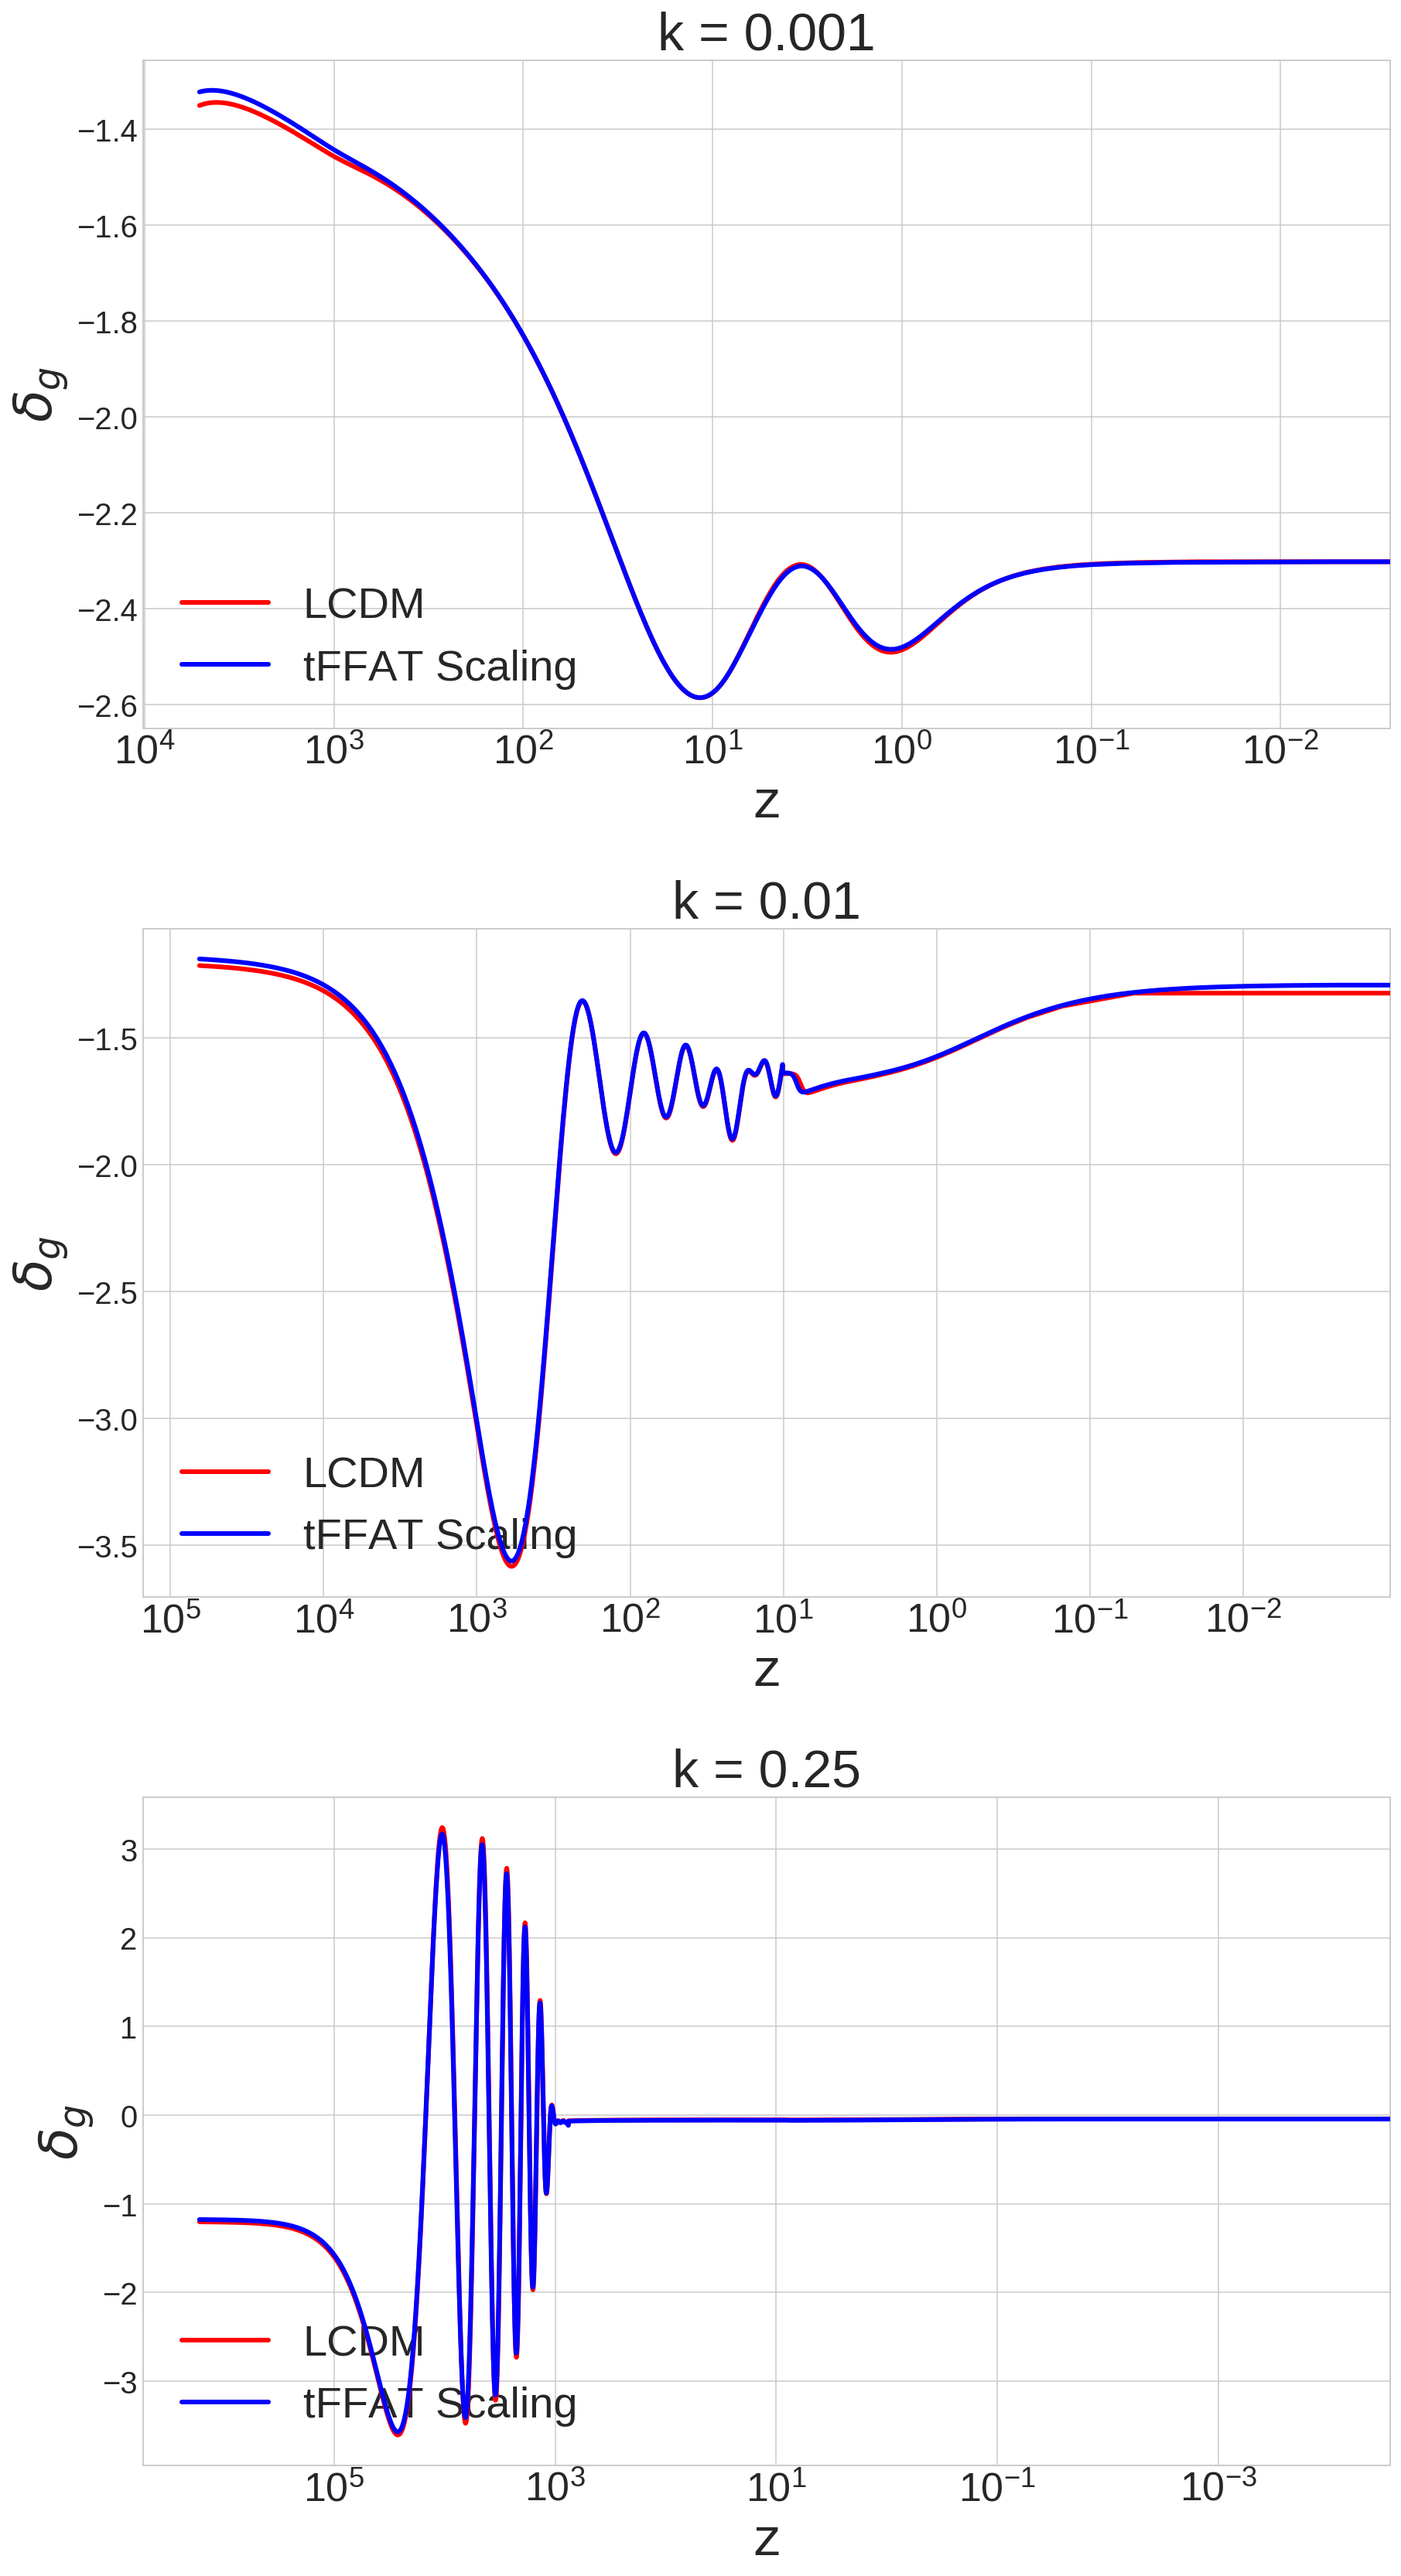

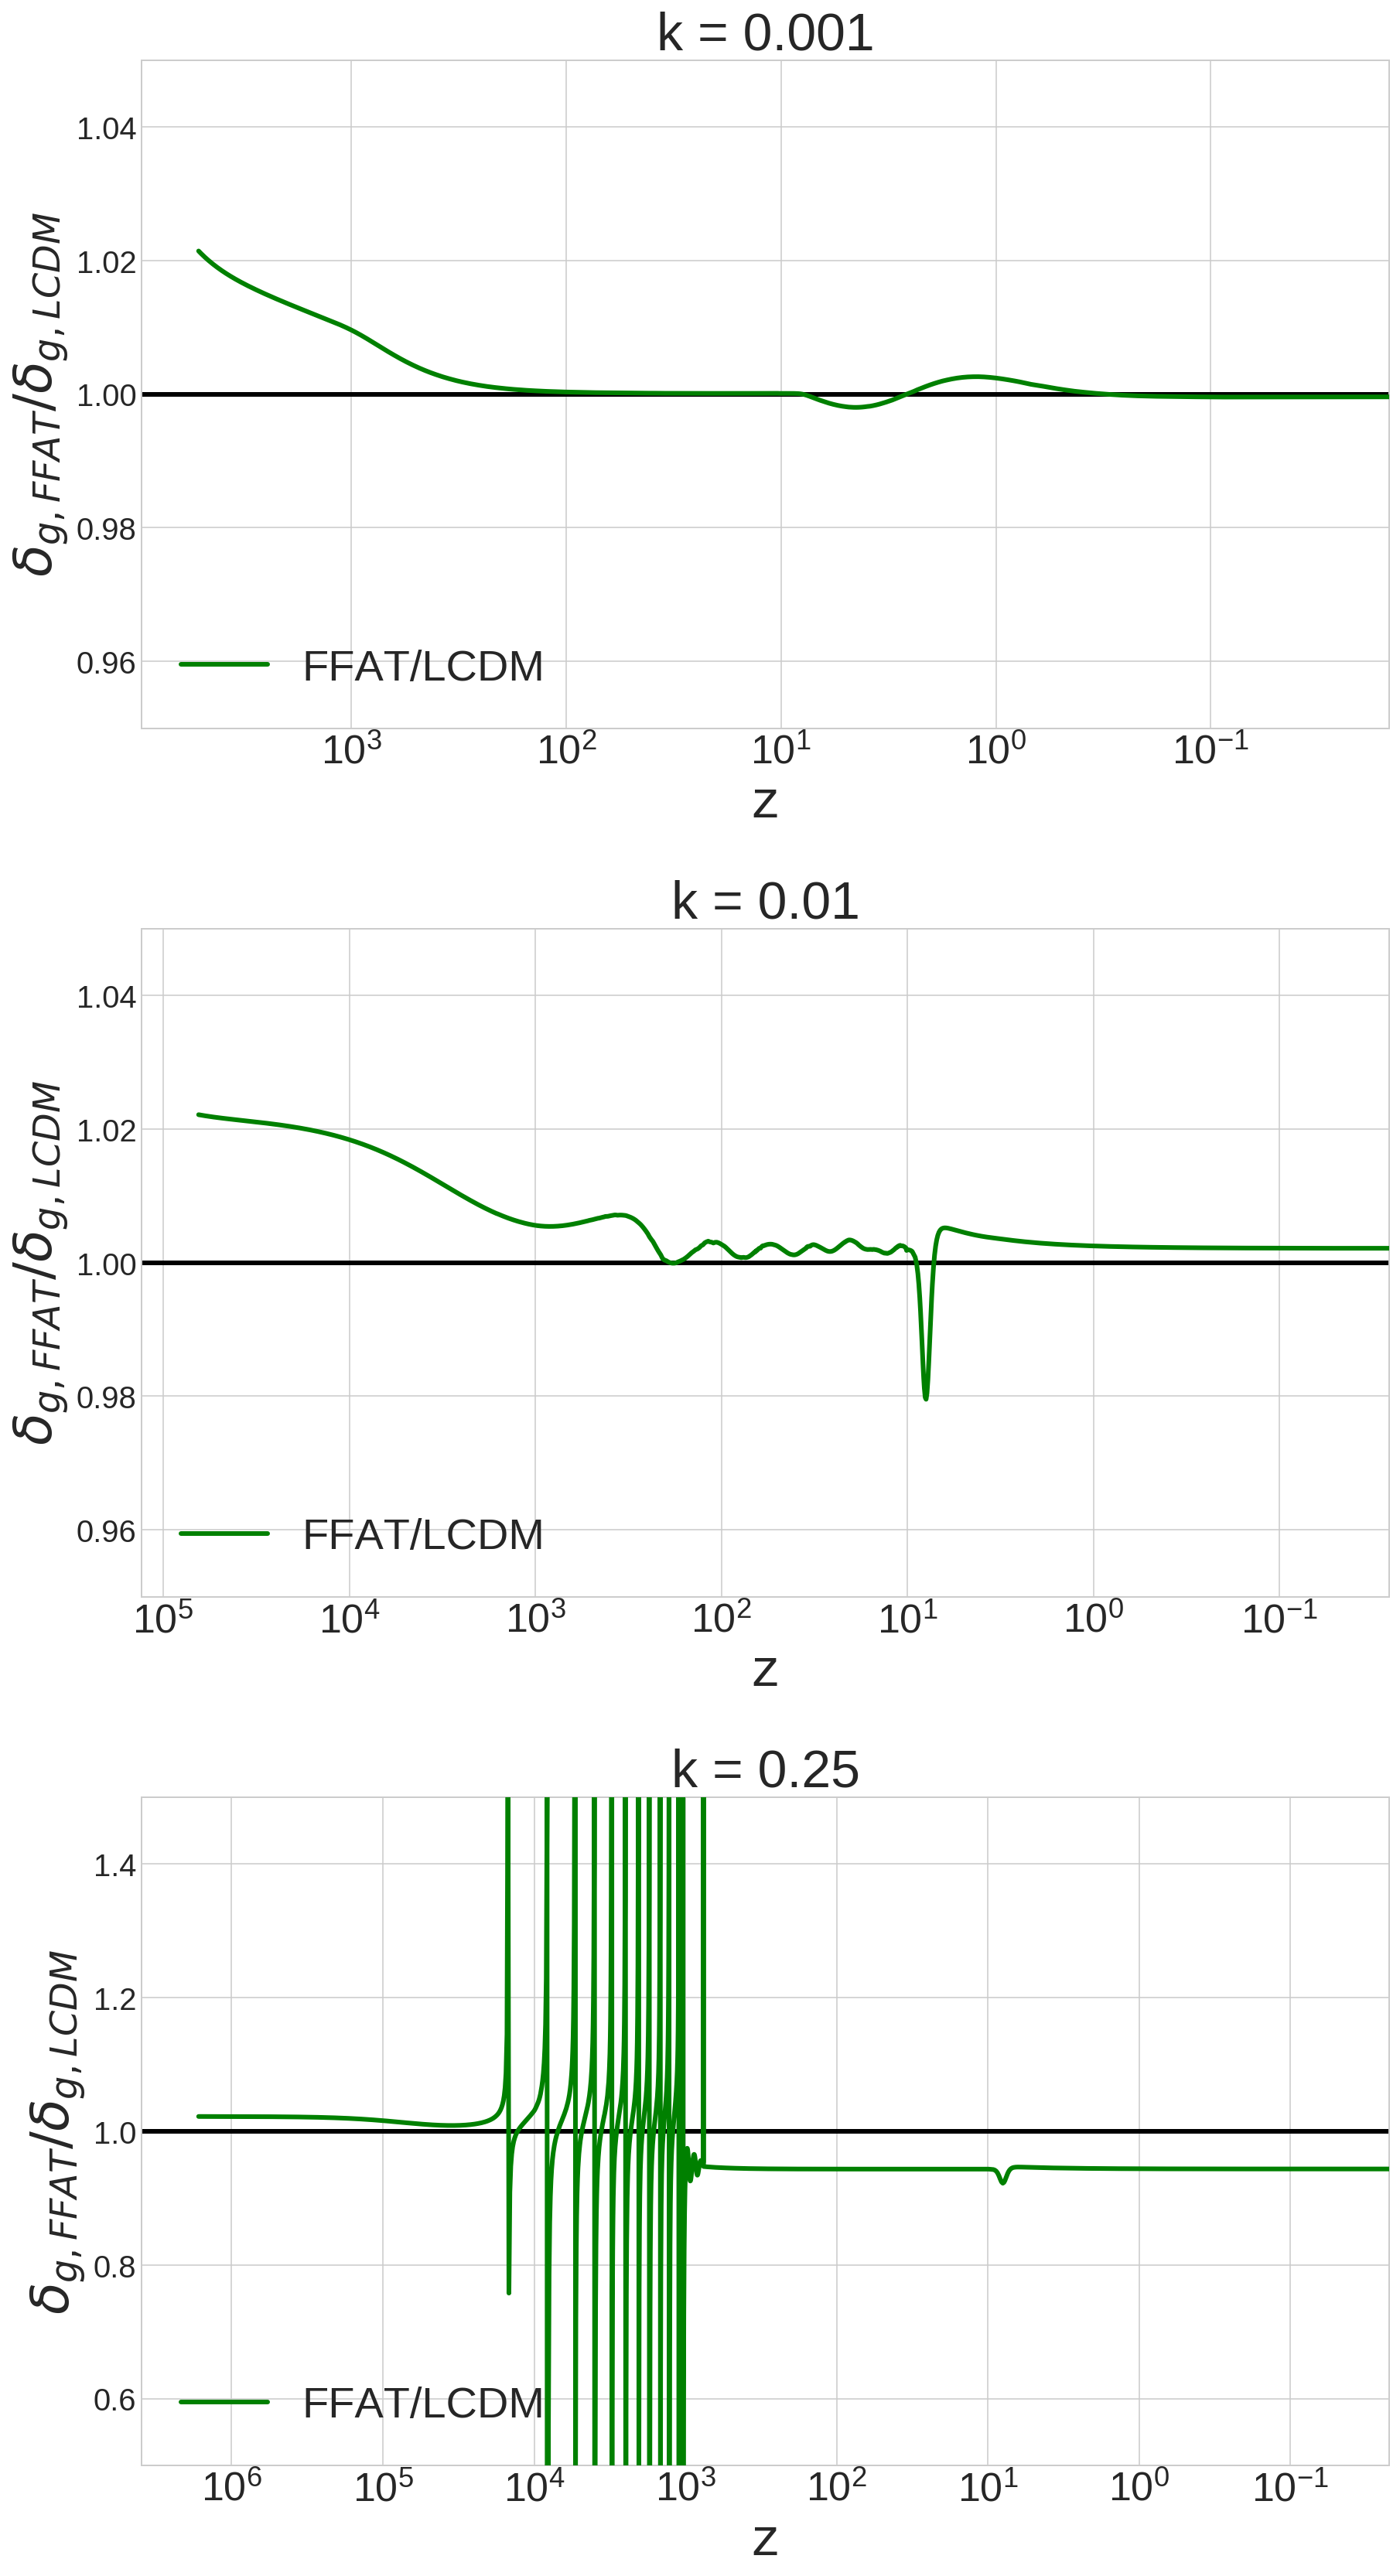

In [207]:
y1 = LCDM_delta_g_k0
x1 = LCDM_tau_k0
#x1 = LCDM_scale_k0
y2 = FFAT_delta_g_k0
x2 = FFAT_tau_k0
#x2 = FFAT_scale_k0

b1 = LCDM_delta_g_k1
a1 = LCDM_tau_k1
#a1 = LCDM_scale_k1
b2 = FFAT_delta_g_k1
a2 = FFAT_tau_k1
#a2 = FFAT_scale_k1

d1 = LCDM_delta_g_k2
c1 = LCDM_tau_k2
#c1 = LCDM_scale_k2
d2 = FFAT_delta_g_k2
c2 = FFAT_tau_k2
#c2 = FFAT_scale_k2

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="red",zorder=8,linewidth=3)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\delta_g$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title("k = 0.001",fontsize = 34)
#plt.xlim(0.01,)
frame1.invert_xaxis()
plt.xscale("log")

frame2=fig1.add_axes((.1,-0.15,.8,.5))        
plt.plot(a1,b1,color="red",zorder=8,linewidth=3)
plt.plot(a2,b2,color="blue",zorder=9,linewidth=3)
plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\delta_g$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.01",fontsize = 34)
#plt.xlim(0.01,)
frame2.invert_xaxis()
plt.xscale("log")


frame3=fig1.add_axes((.1,-0.8,.8,.5))        
plt.plot(c1,d1,color="red",zorder=8,linewidth=3)
plt.plot(c2,d2,color="blue",zorder=9,linewidth=3)
plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\delta_g$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.25",fontsize = 34)
#plt.xlim(0.01,)
frame3.invert_xaxis()
plt.xscale("log")


fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('delta_g.pdf', dpi=800,bbox_inches='tight')  
plt.show()

from scipy import interpolate
f = interpolate.interp1d(x2,y2)
y1_interp = f(x1)
f = interpolate.interp1d(a2,b2)
b1_interp = f(a1)
f = interpolate.interp1d(c2,d2)
d1_interp = f(c1)

y_ratio = y1/y1_interp
b_ratio = b1/b1_interp
d_ratio = d1/d1_interp

#y_ratio = y1/y2
#b_ratio = b1/b2
#d_ratio = d1/d2


fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y_ratio,color="green",zorder=8,linewidth=3)
#plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\delta_{g,FFAT}/\delta_{g,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title("k = 0.001",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.95,1.05)
frame1.invert_xaxis()
plt.xscale("log")

frame2=fig1.add_axes((.1,-0.15,.8,.5))        
plt.plot(a1,b_ratio,color="green",zorder=8,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\delta_{g,FFAT}/\delta_{g,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.01",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.95,1.05)
frame2.invert_xaxis()
plt.xscale("log")


frame3=fig1.add_axes((.1,-0.8,.8,.5))        
plt.plot(c1,d_ratio,color="green",zorder=8,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\delta_{g,FFAT}/\delta_{g,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.25",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.5,1.5)
frame3.invert_xaxis()
plt.xscale("log")


fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('delta_g_ratio.pdf', dpi=800,bbox_inches='tight')  
plt.show()

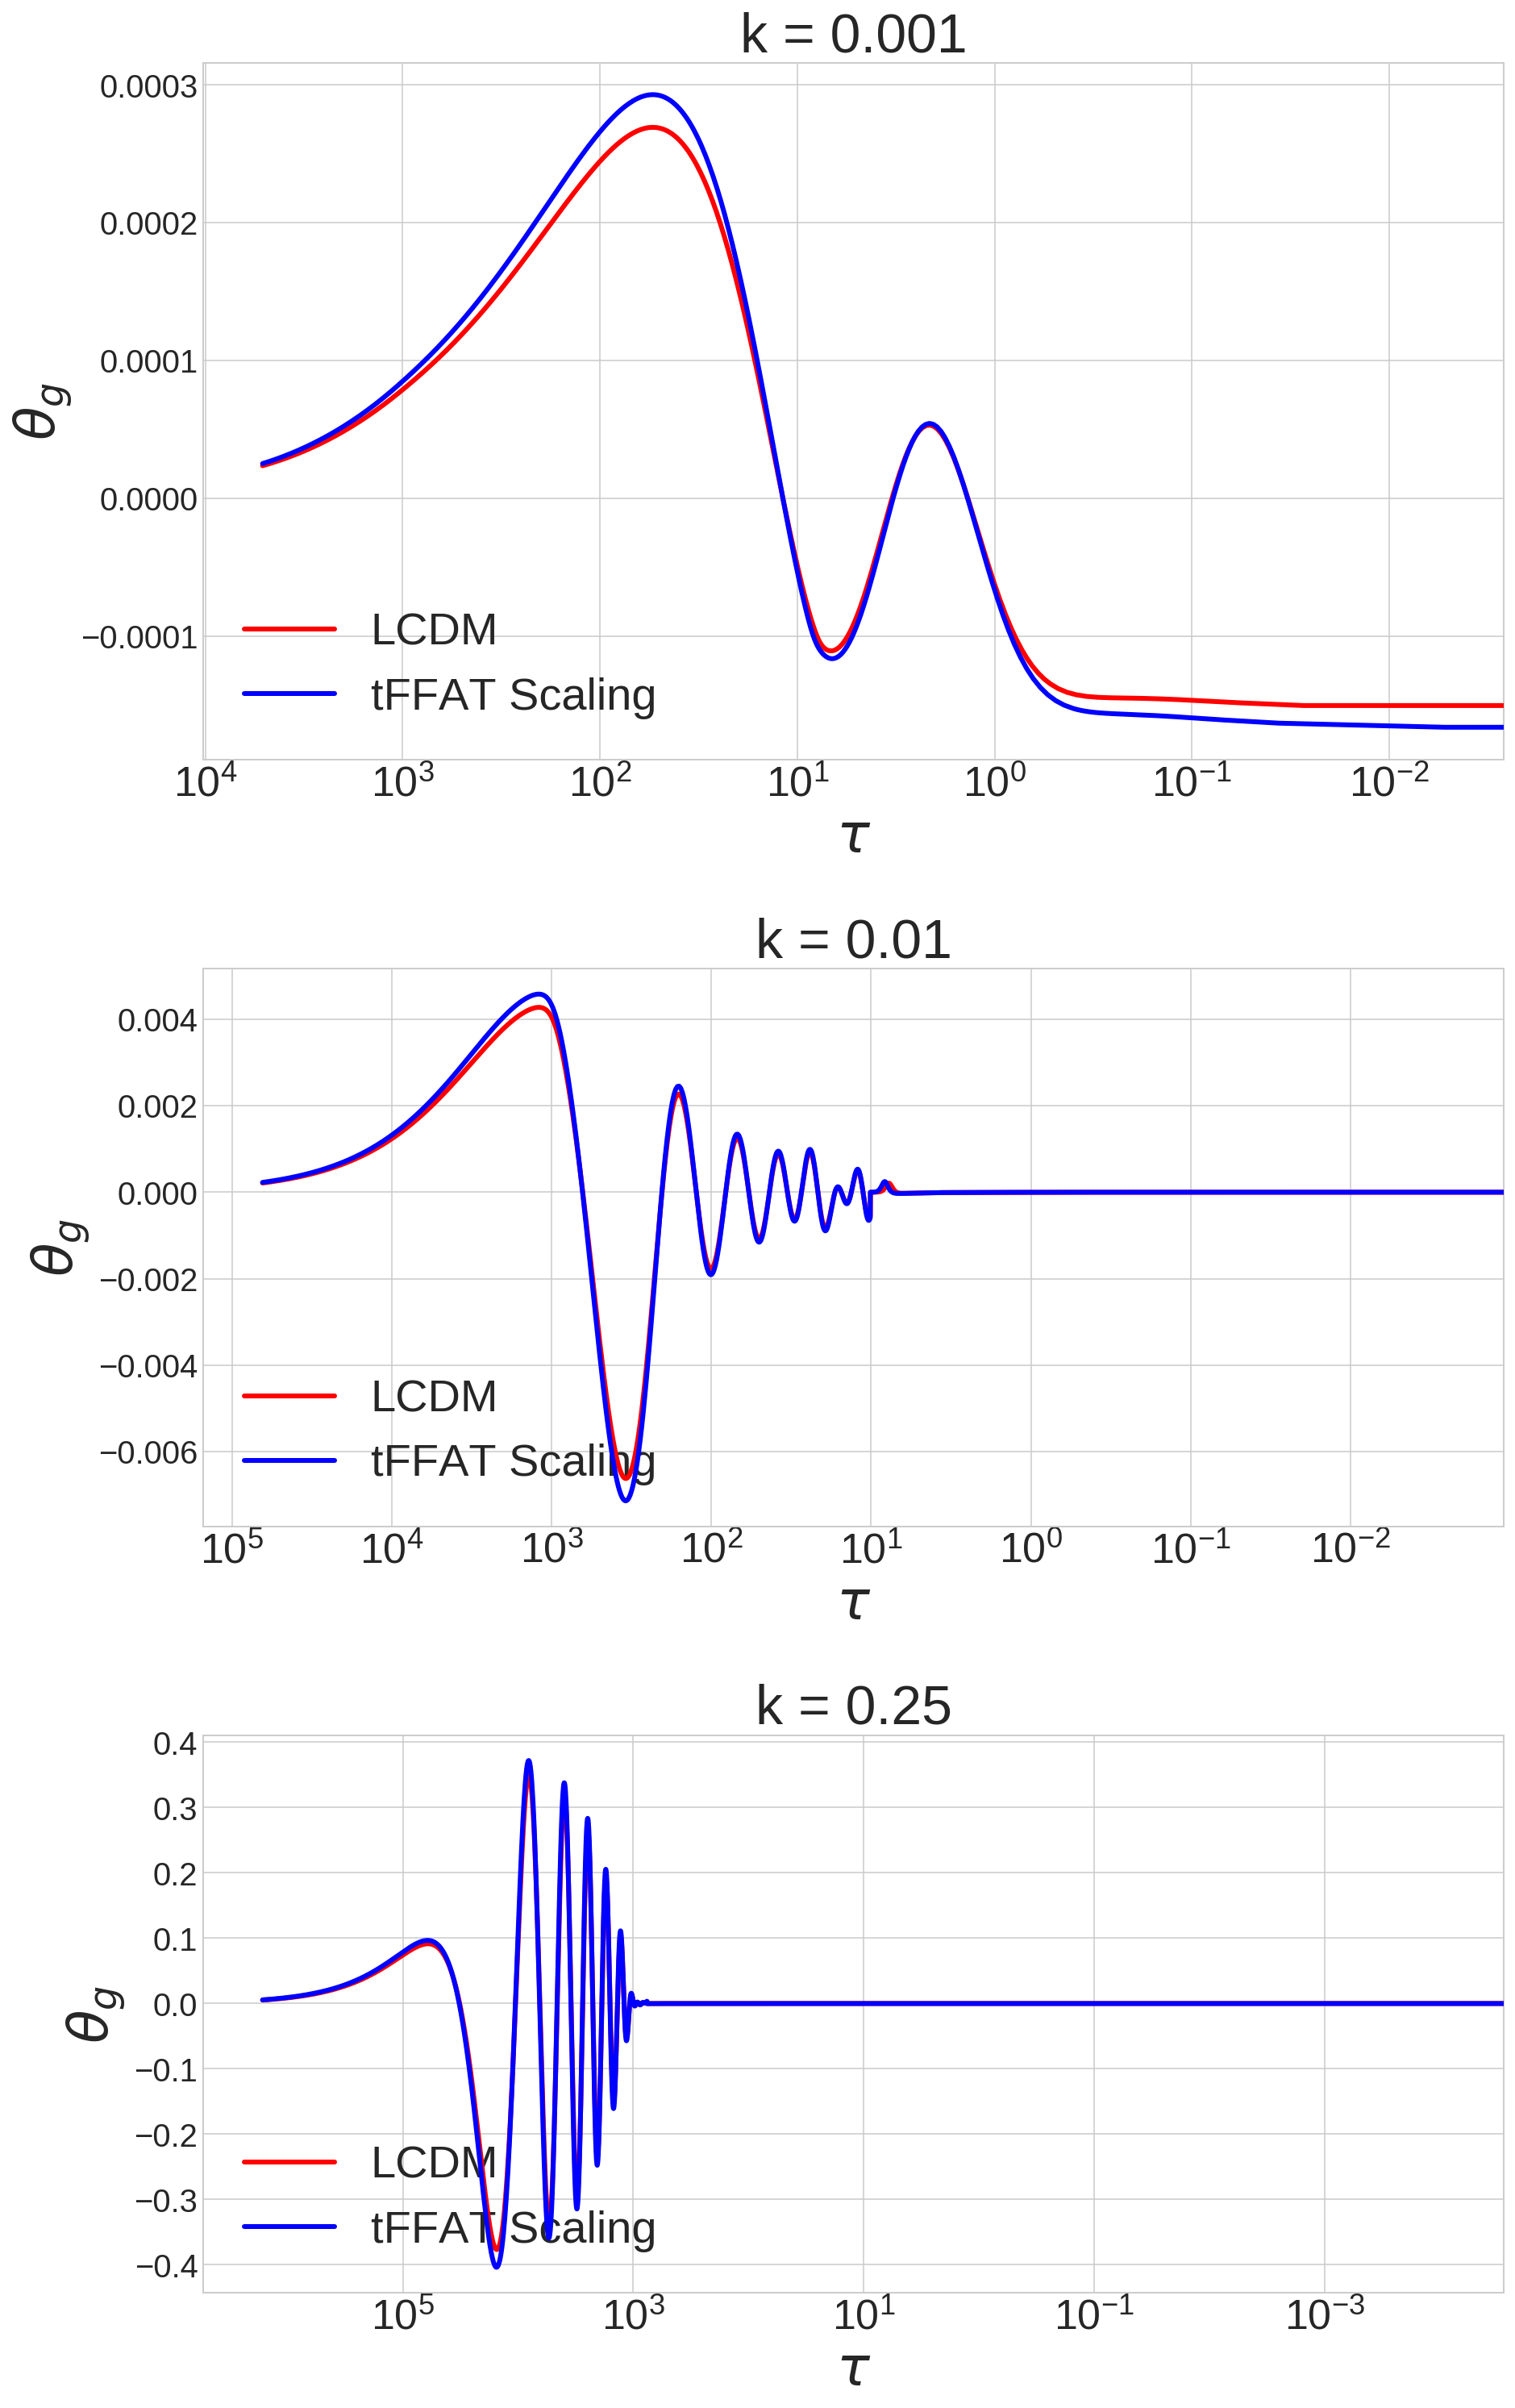

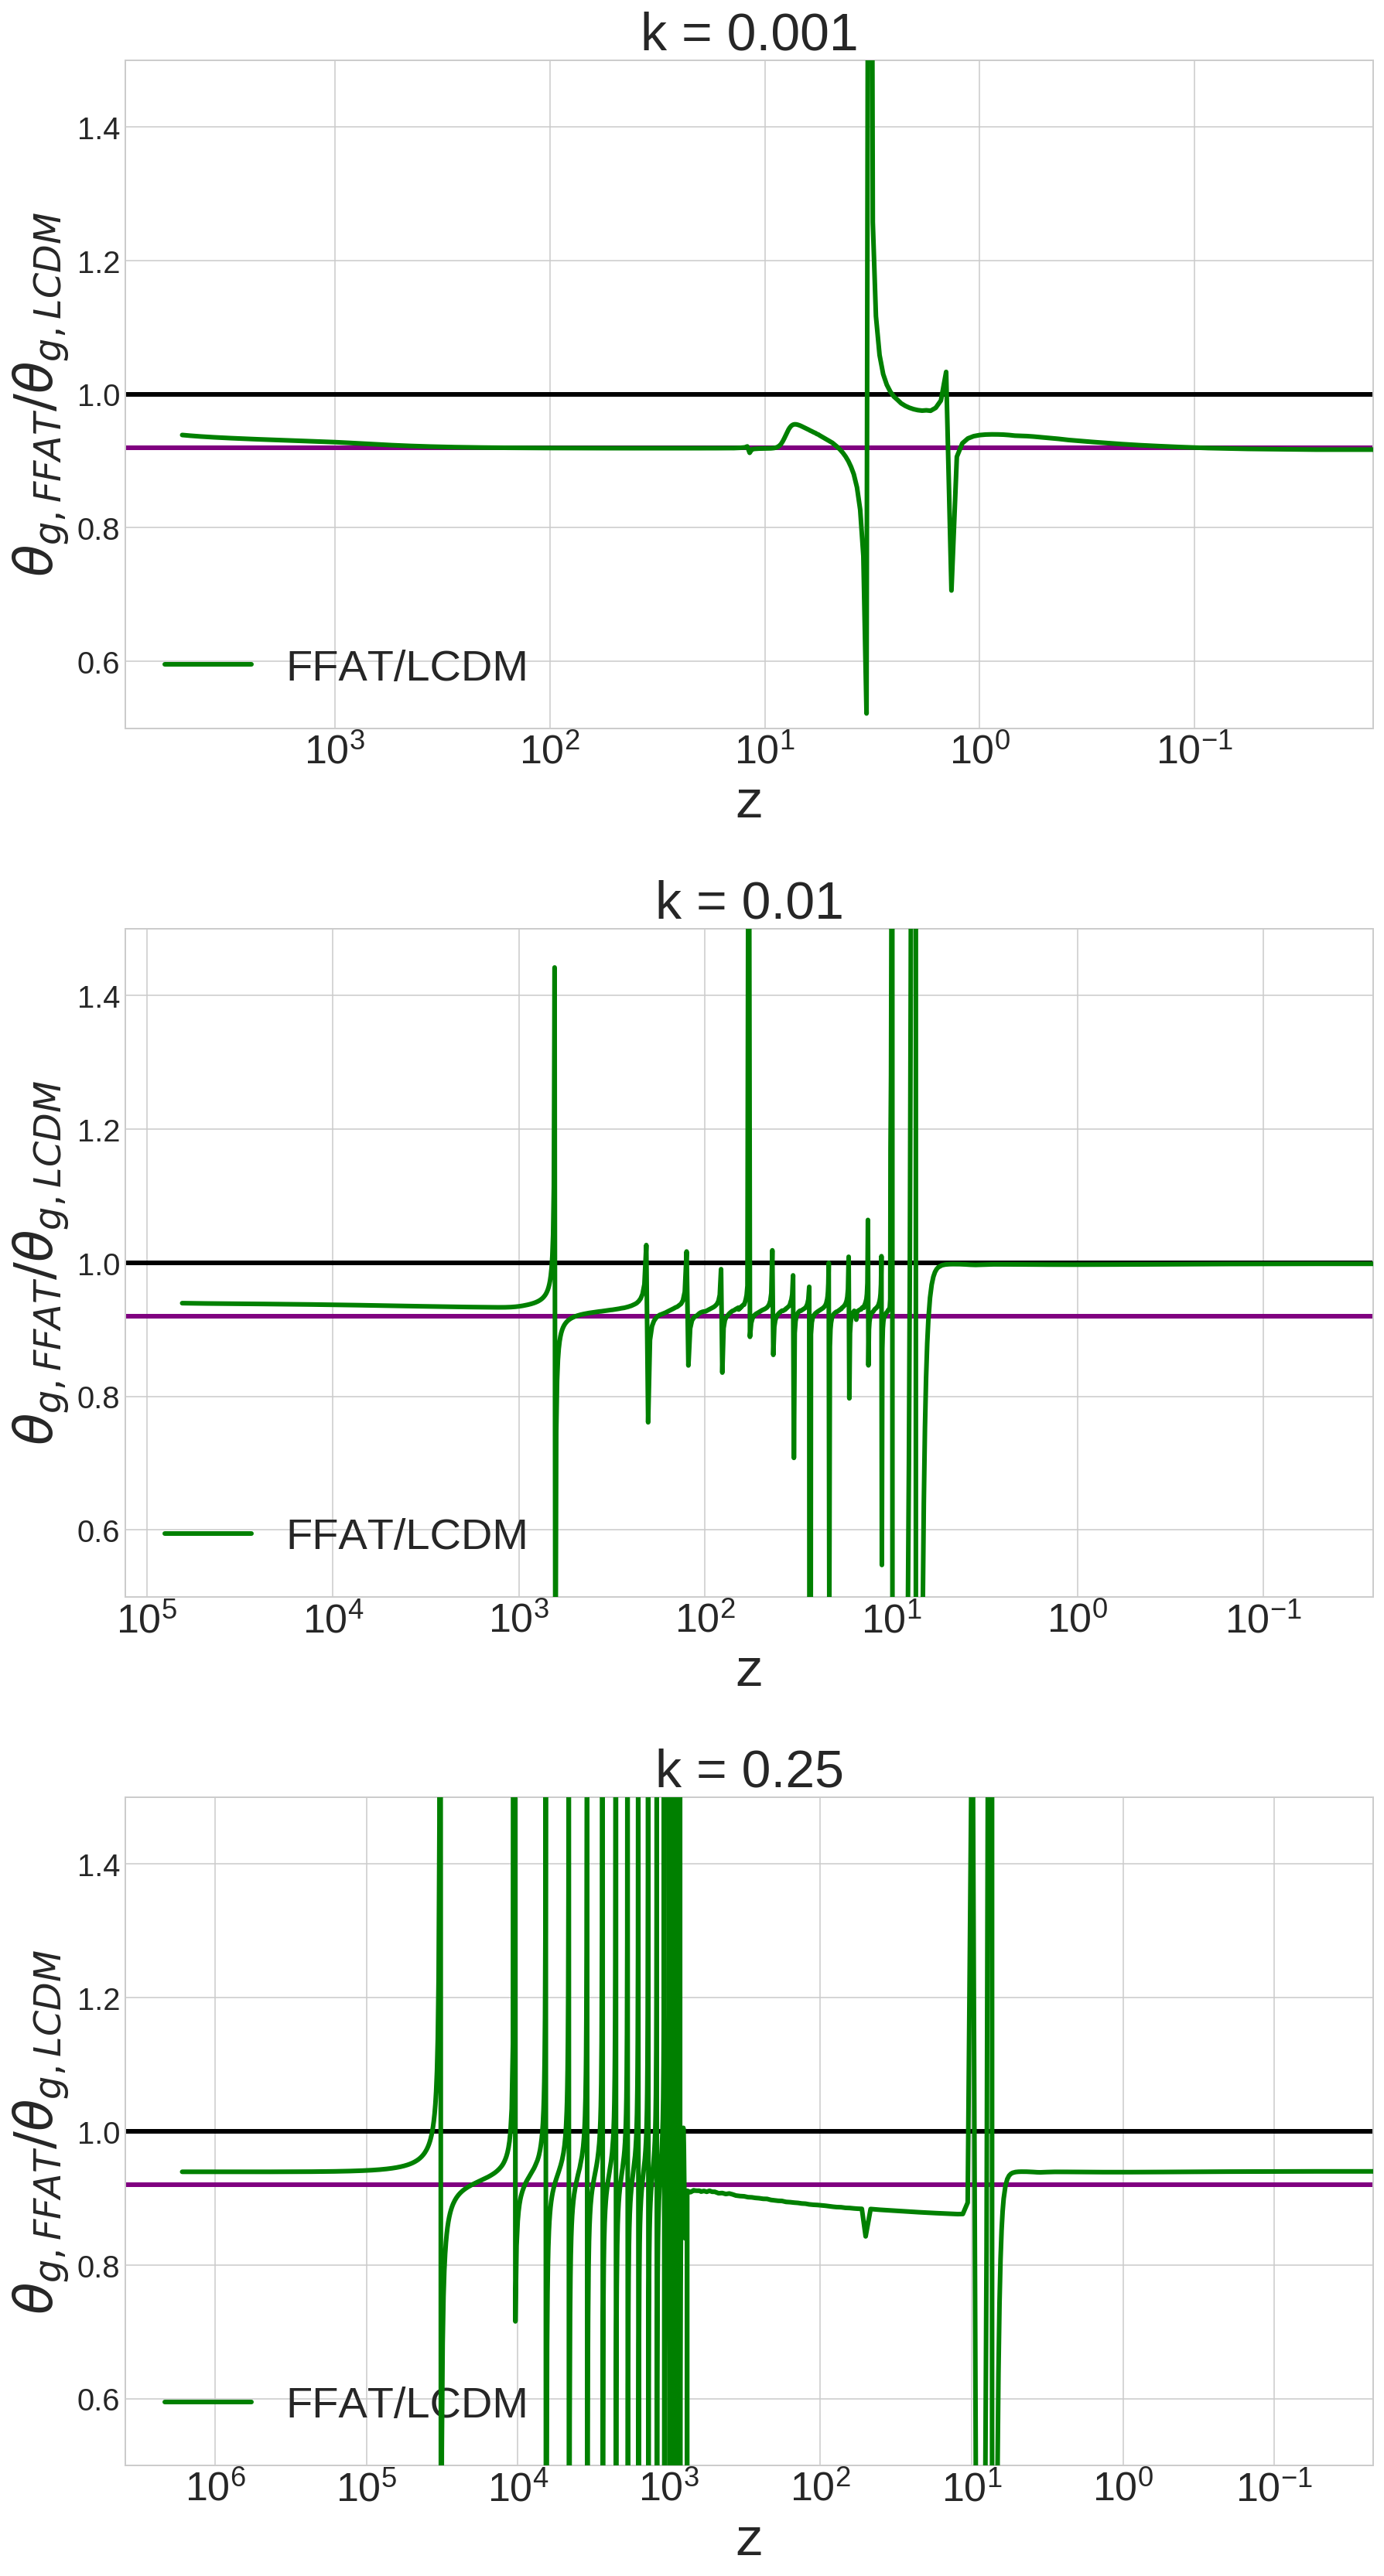

In [208]:
y1 = LCDM_theta_g_k0#/0.001
x1 = LCDM_tau_k0
y2 = FFAT_theta_g_k0#/(0.001*(73.3/67.4))
x2 = FFAT_tau_k0

b1 = LCDM_theta_g_k1
a1 = LCDM_tau_k1
b2 = FFAT_theta_g_k1
a2 = FFAT_tau_k1

d1 = LCDM_theta_g_k2
c1 = LCDM_tau_k2
d2 = FFAT_theta_g_k2
c2 = FFAT_tau_k2

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="red",zorder=8,linewidth=3)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"$\tau$",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\theta_g$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title("k = 0.001",fontsize = 34)
plt.xscale("log")
frame1.invert_xaxis()

frame2=fig1.add_axes((.1,-0.05,.8,.4))        
plt.plot(a1,b1,color="red",zorder=8,linewidth=3)
plt.plot(a2,b2,color="blue",zorder=9,linewidth=3)
plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"$\tau$",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\theta_g$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.01",fontsize = 34)
frame2.invert_xaxis()
plt.xscale("log")


frame3=fig1.add_axes((.1,-0.6,.8,.4))        
plt.plot(c1,d1,color="red",zorder=8,linewidth=3)
plt.plot(c2,d2,color="blue",zorder=9,linewidth=3)
plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"$\tau$",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\theta_g$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.25",fontsize = 34)
frame3.invert_xaxis()
plt.xscale("log")


fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('theta_g.pdf', dpi=800,bbox_inches='tight')  
plt.show()

from scipy import interpolate
f = interpolate.interp1d(x2,y2)
y1_interp = f(x1)
f = interpolate.interp1d(a2,b2)
b1_interp = f(a1)
f = interpolate.interp1d(c2,d2)
d1_interp = f(c1)

y_ratio = y1/y1_interp
b_ratio = b1/b1_interp
d_ratio = d1/d1_interp

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y_ratio,color="green",zorder=8,linewidth=3)
#plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\theta_{g,FFAT}/\theta_{g,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title("k = 0.001",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
plt.axhline(0.91950886766 ,color='purple',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.5,1.5)
frame1.invert_xaxis()
plt.xscale("log")

frame2=fig1.add_axes((.1,-0.15,.8,.5))        
plt.plot(a1,b_ratio,color="green",zorder=8,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\theta_{g,FFAT}/\theta_{g,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.01",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
plt.axhline(0.91950886766 ,color='purple',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.5,1.5)
frame2.invert_xaxis()
plt.xscale("log")


frame3=fig1.add_axes((.1,-0.8,.8,.5))        
plt.plot(c1,d_ratio,color="green",zorder=8,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\theta_{g,FFAT}/\theta_{g,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.25",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
plt.axhline(0.91950886766 ,color='purple',linewidth=3)

#plt.xlim(0.01,)
plt.ylim(0.5,1.5)
frame3.invert_xaxis()
plt.xscale("log")


fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('theta_g_ratio.pdf', dpi=800,bbox_inches='tight')  
plt.show()

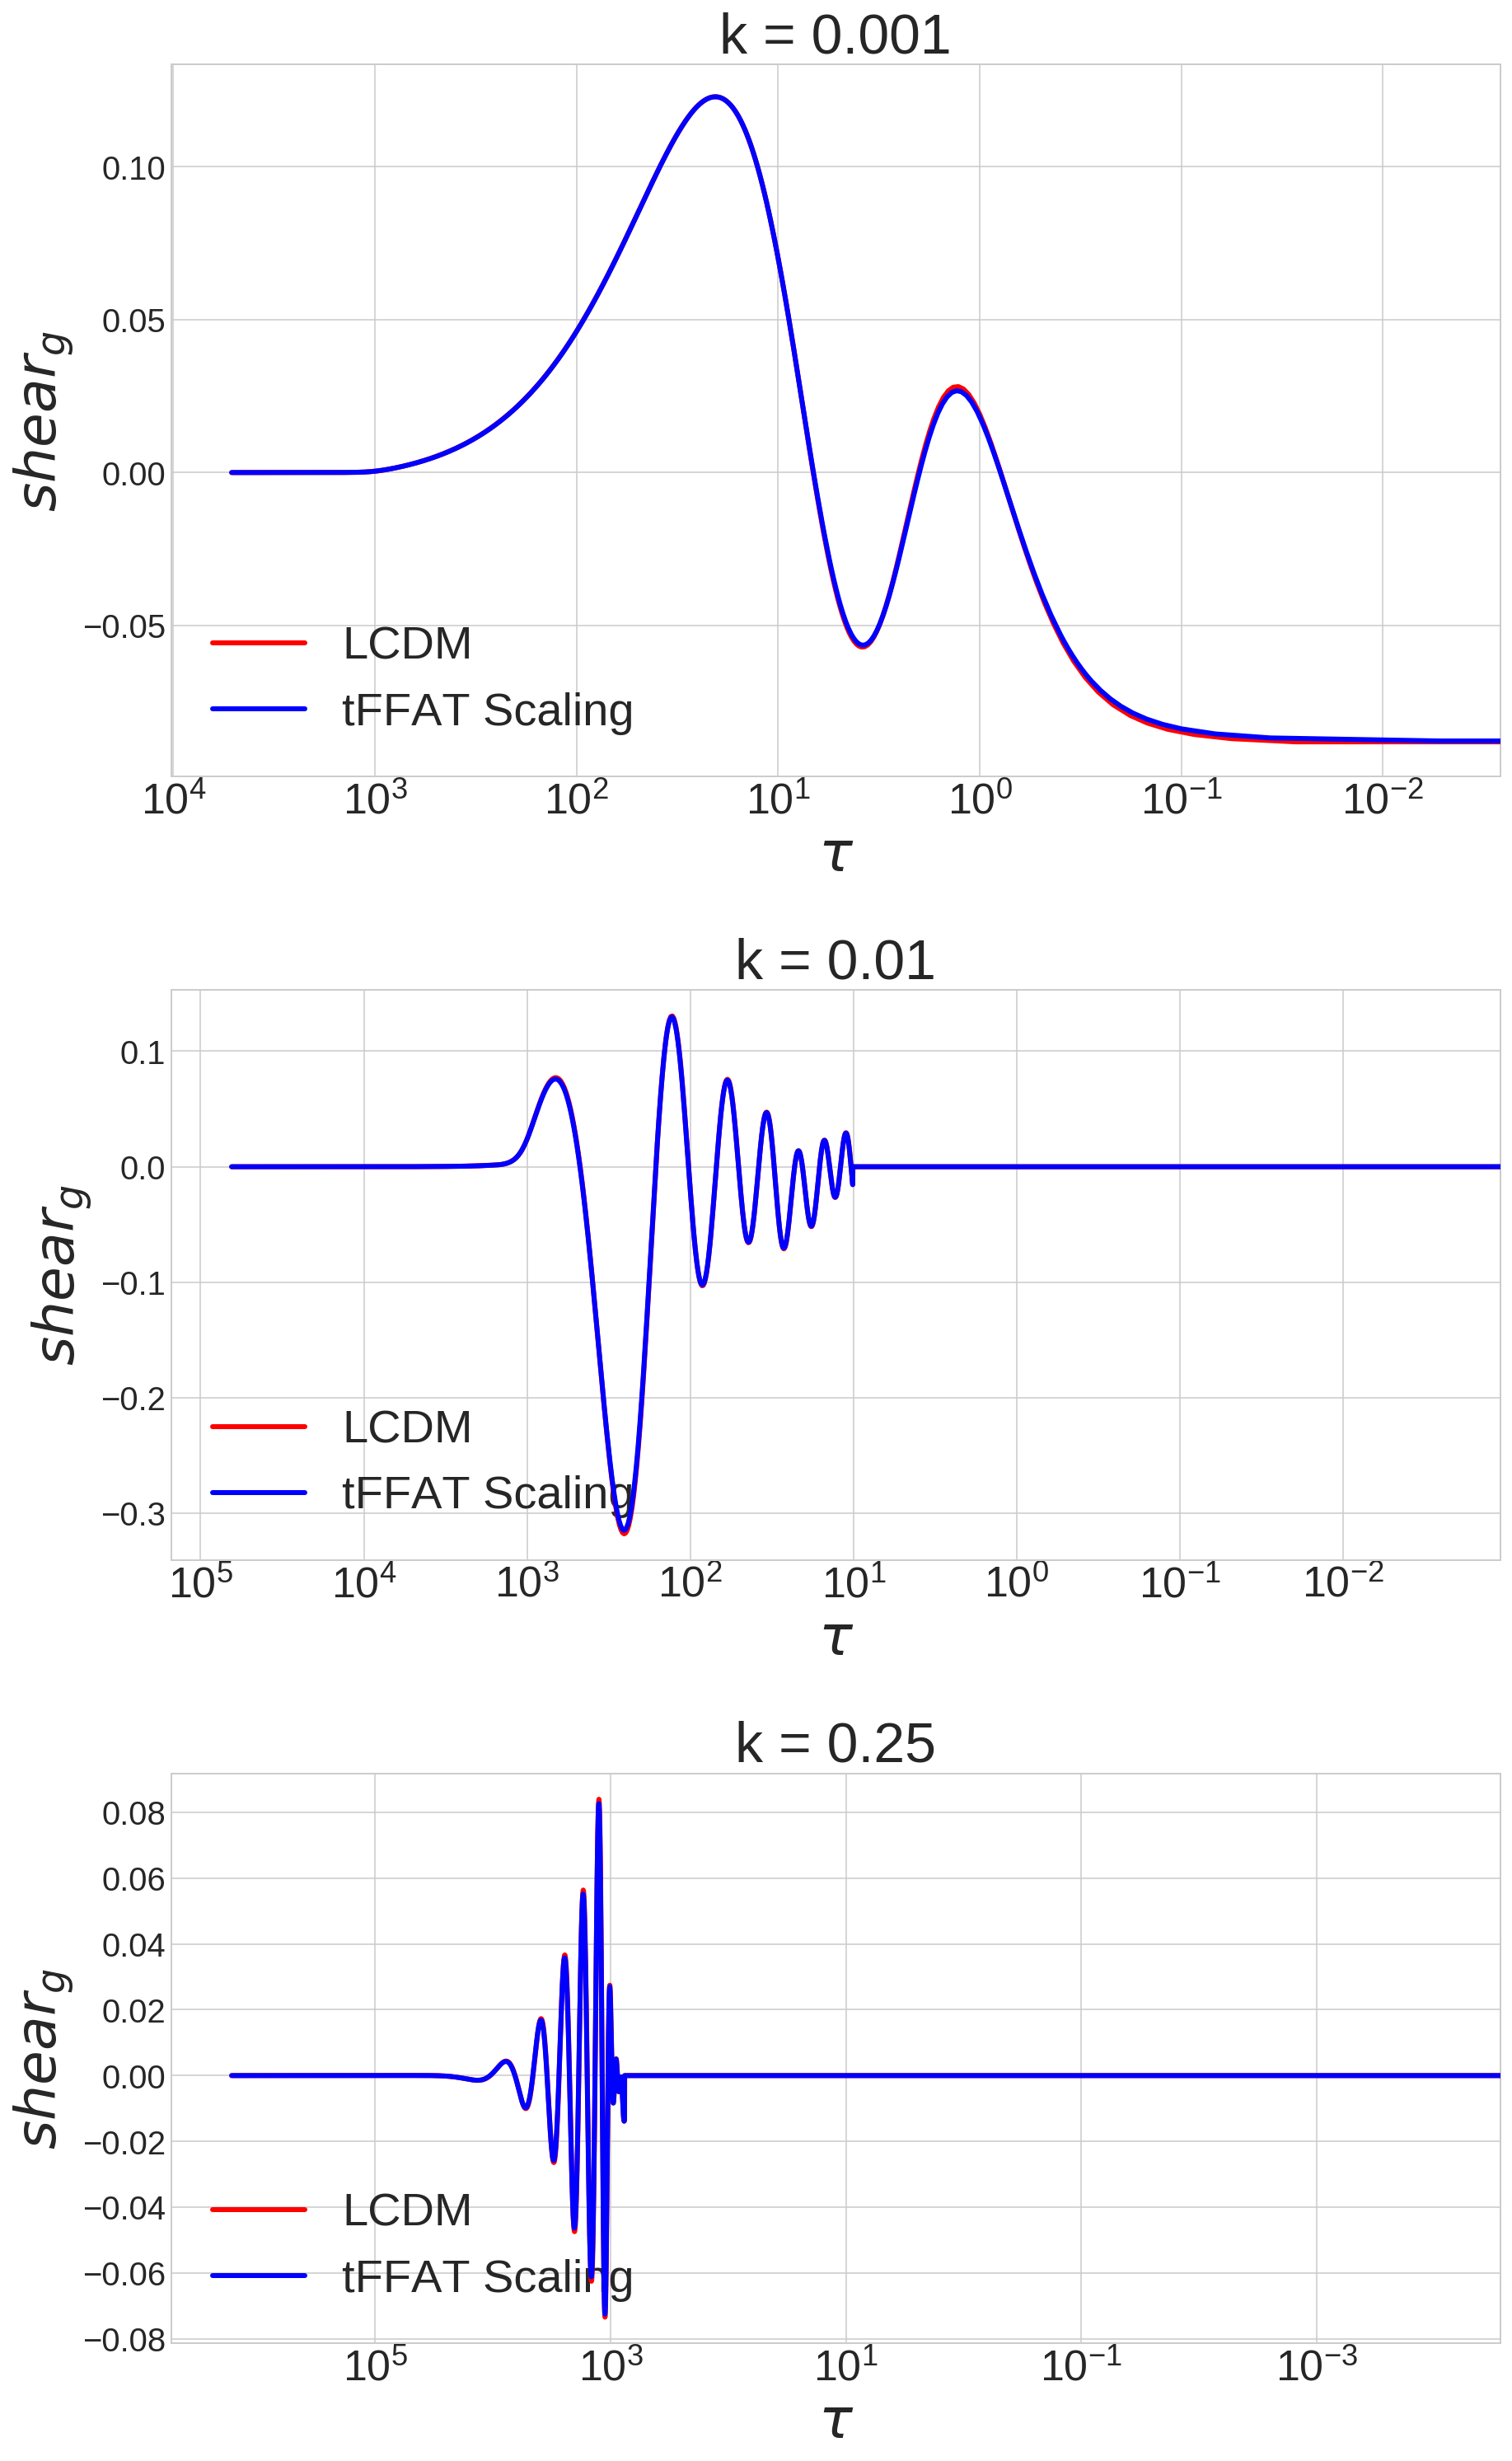

/home/kylar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in true_divide
/home/kylar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in true_divide
/home/kylar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in true_divide


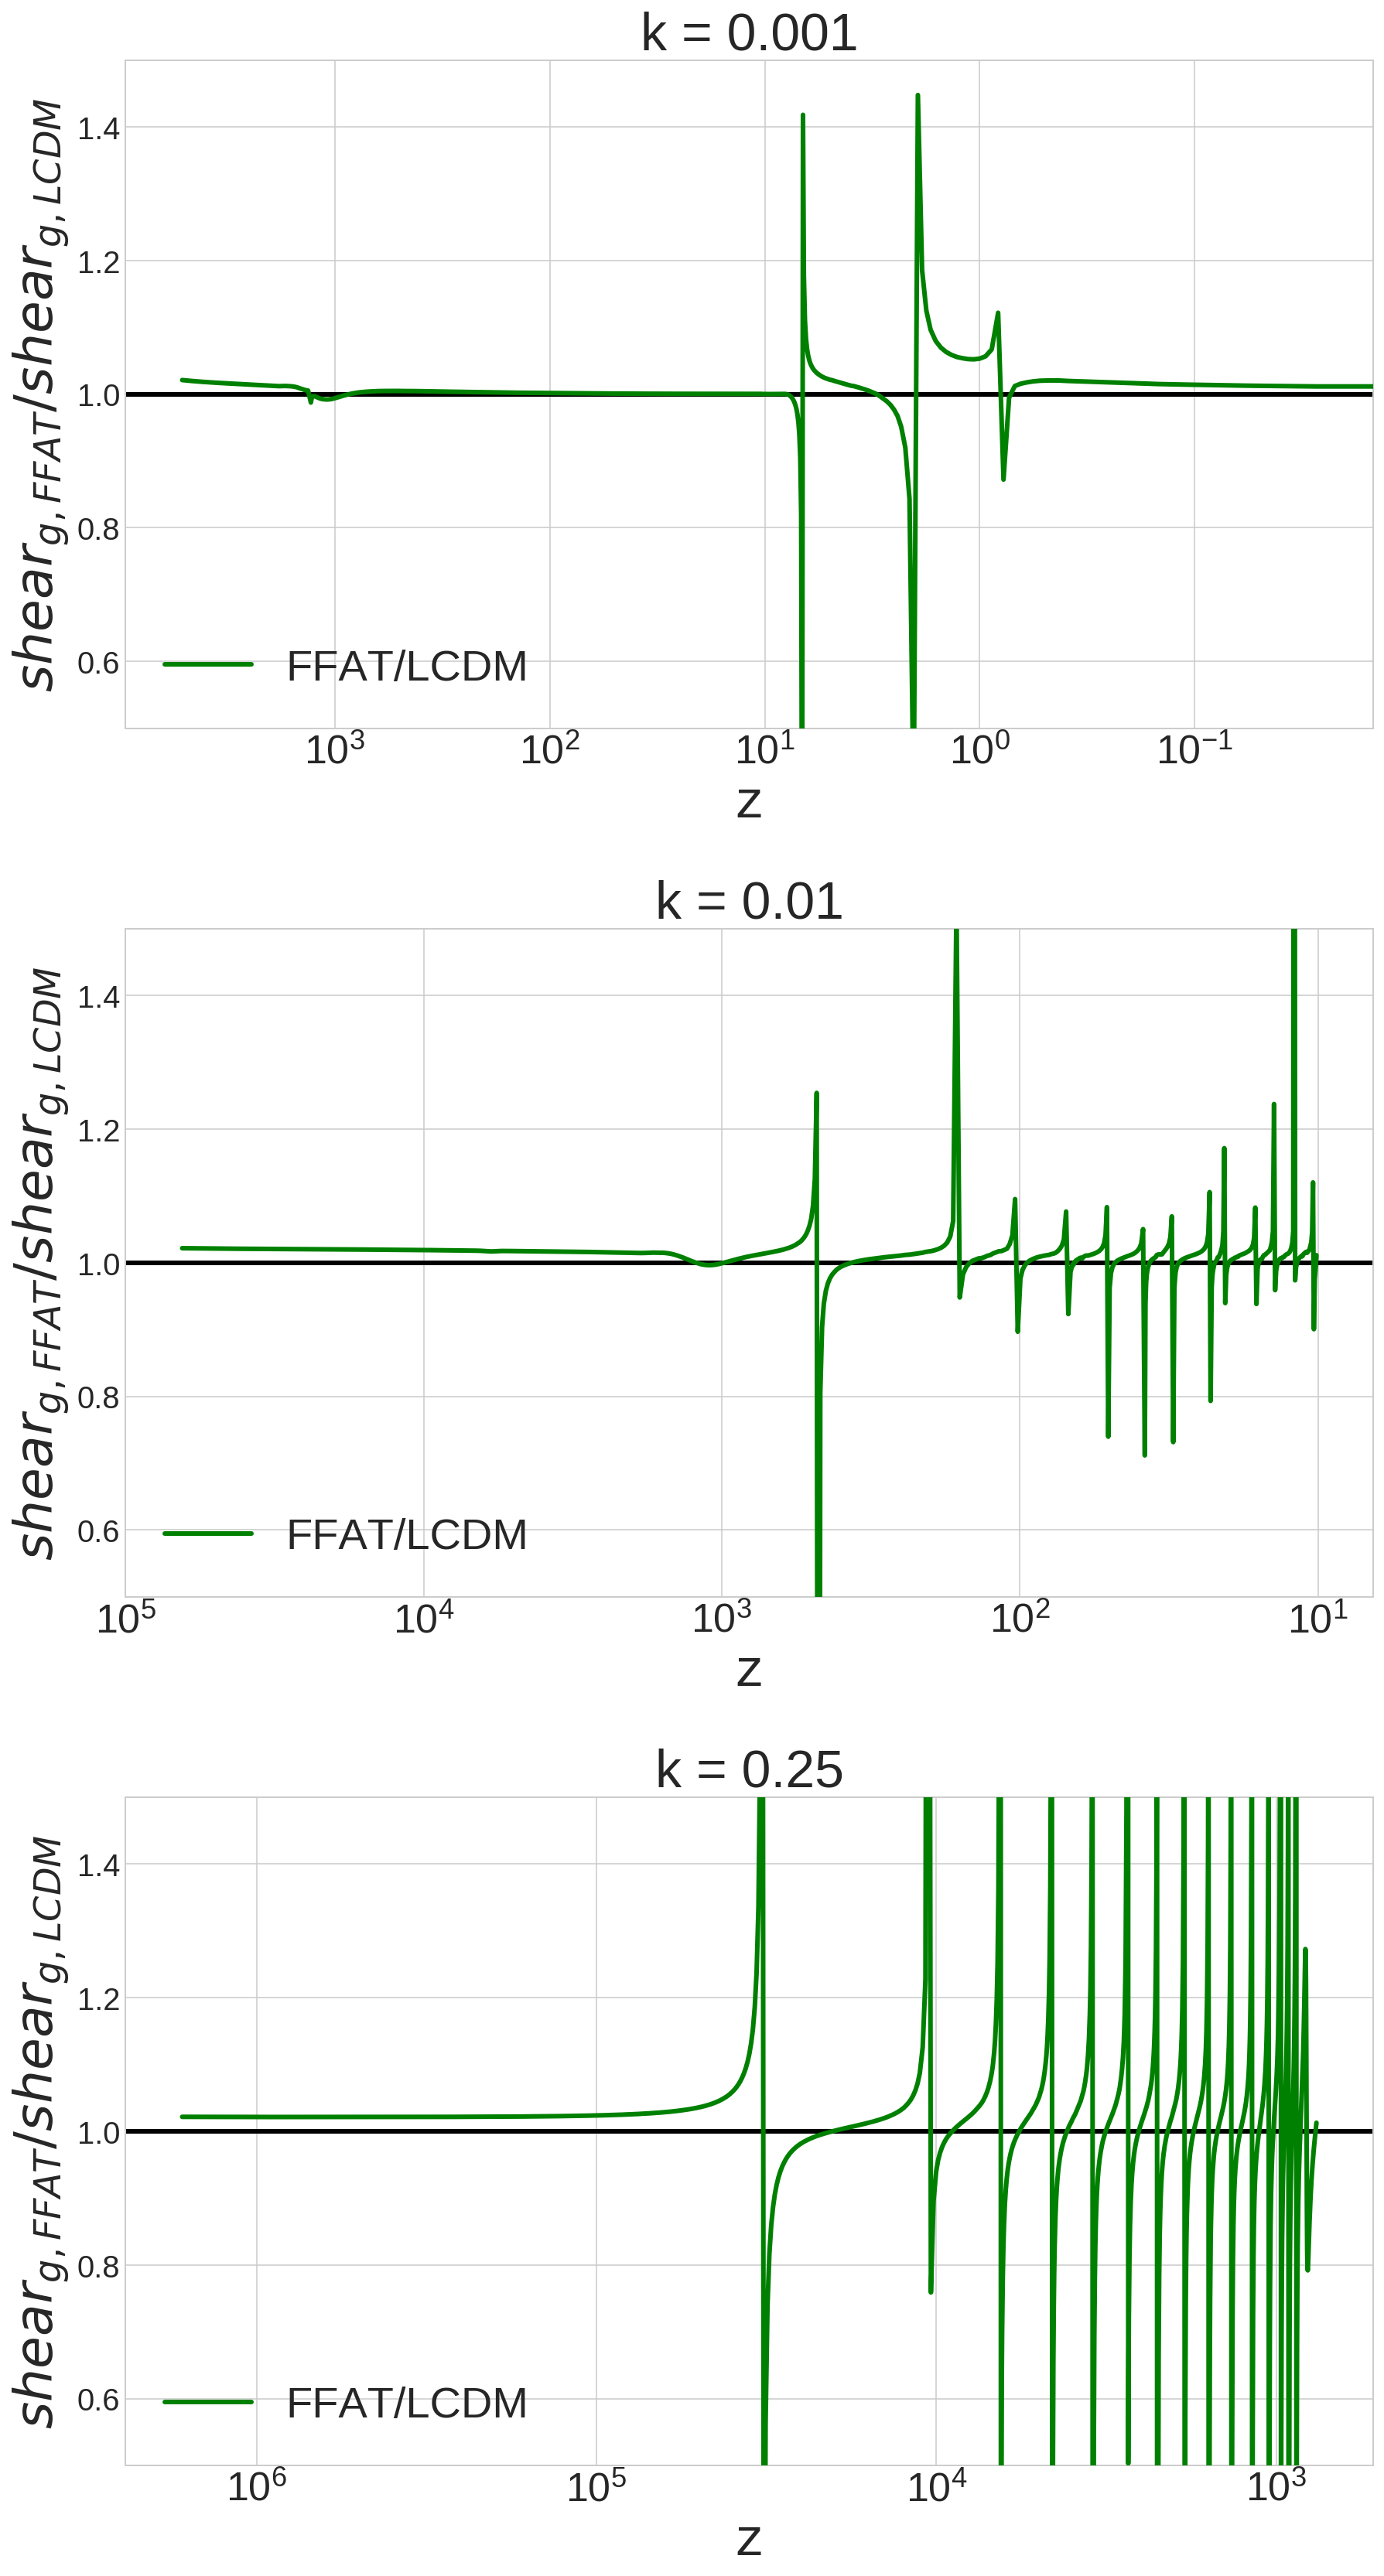

In [209]:
y1 = LCDM_shear_g_k0
x1 = LCDM_tau_k0
y2 = FFAT_shear_g_k0
x2 = FFAT_tau_k0

b1 = LCDM_shear_g_k1
a1 = LCDM_tau_k1
b2 = FFAT_shear_g_k1
a2 = FFAT_tau_k1

d1 = LCDM_shear_g_k2
c1 = LCDM_tau_k2
d2 = FFAT_shear_g_k2
c2 = FFAT_tau_k2

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="red",zorder=8,linewidth=3)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)
plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"$\tau$",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$shear_g$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title("k = 0.001",fontsize = 34)
plt.xscale("log")
frame1.invert_xaxis()


frame2=fig1.add_axes((.1,-0.05,.8,.4))        
plt.plot(a1,b1,color="red",zorder=8,linewidth=3)
plt.plot(a2,b2,color="blue",zorder=9,linewidth=3)
plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"$\tau$",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$shear_g$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.01",fontsize = 34)
frame2.invert_xaxis()
plt.xscale("log")


frame3=fig1.add_axes((.1,-0.6,.8,.4))        
plt.plot(c1,d1,color="red",zorder=8,linewidth=3)
plt.plot(c2,d2,color="blue",zorder=9,linewidth=3)
plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"$\tau$",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$shear_g$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.25",fontsize = 34)
frame3.invert_xaxis()
plt.xscale("log")


fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('shear_g.pdf', dpi=800,bbox_inches='tight')  
plt.show()

from scipy import interpolate
f = interpolate.interp1d(x2,y2)
y1_interp = f(x1)
f = interpolate.interp1d(a2,b2)
b1_interp = f(a1)
f = interpolate.interp1d(c2,d2)
d1_interp = f(c1)

y_ratio = y1/y1_interp
b_ratio = b1/b1_interp
d_ratio = d1/d1_interp

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y_ratio,color="green",zorder=8,linewidth=3)
#plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$shear_{g,FFAT}/shear_{g,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title("k = 0.001",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.5,1.5)
frame1.invert_xaxis()
plt.xscale("log")

frame2=fig1.add_axes((.1,-0.15,.8,.5))        
plt.plot(a1,b_ratio,color="green",zorder=8,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$shear_{g,FFAT}/shear_{g,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.01",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.5,1.5)
frame2.invert_xaxis()
plt.xscale("log")


frame3=fig1.add_axes((.1,-0.8,.8,.5))        
plt.plot(c1,d_ratio,color="green",zorder=8,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$shear_{g,FFAT}/shear_{g,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.25",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.5,1.5)
frame3.invert_xaxis()
plt.xscale("log")


fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('shear_g_ratio.pdf', dpi=800,bbox_inches='tight')  
plt.show()

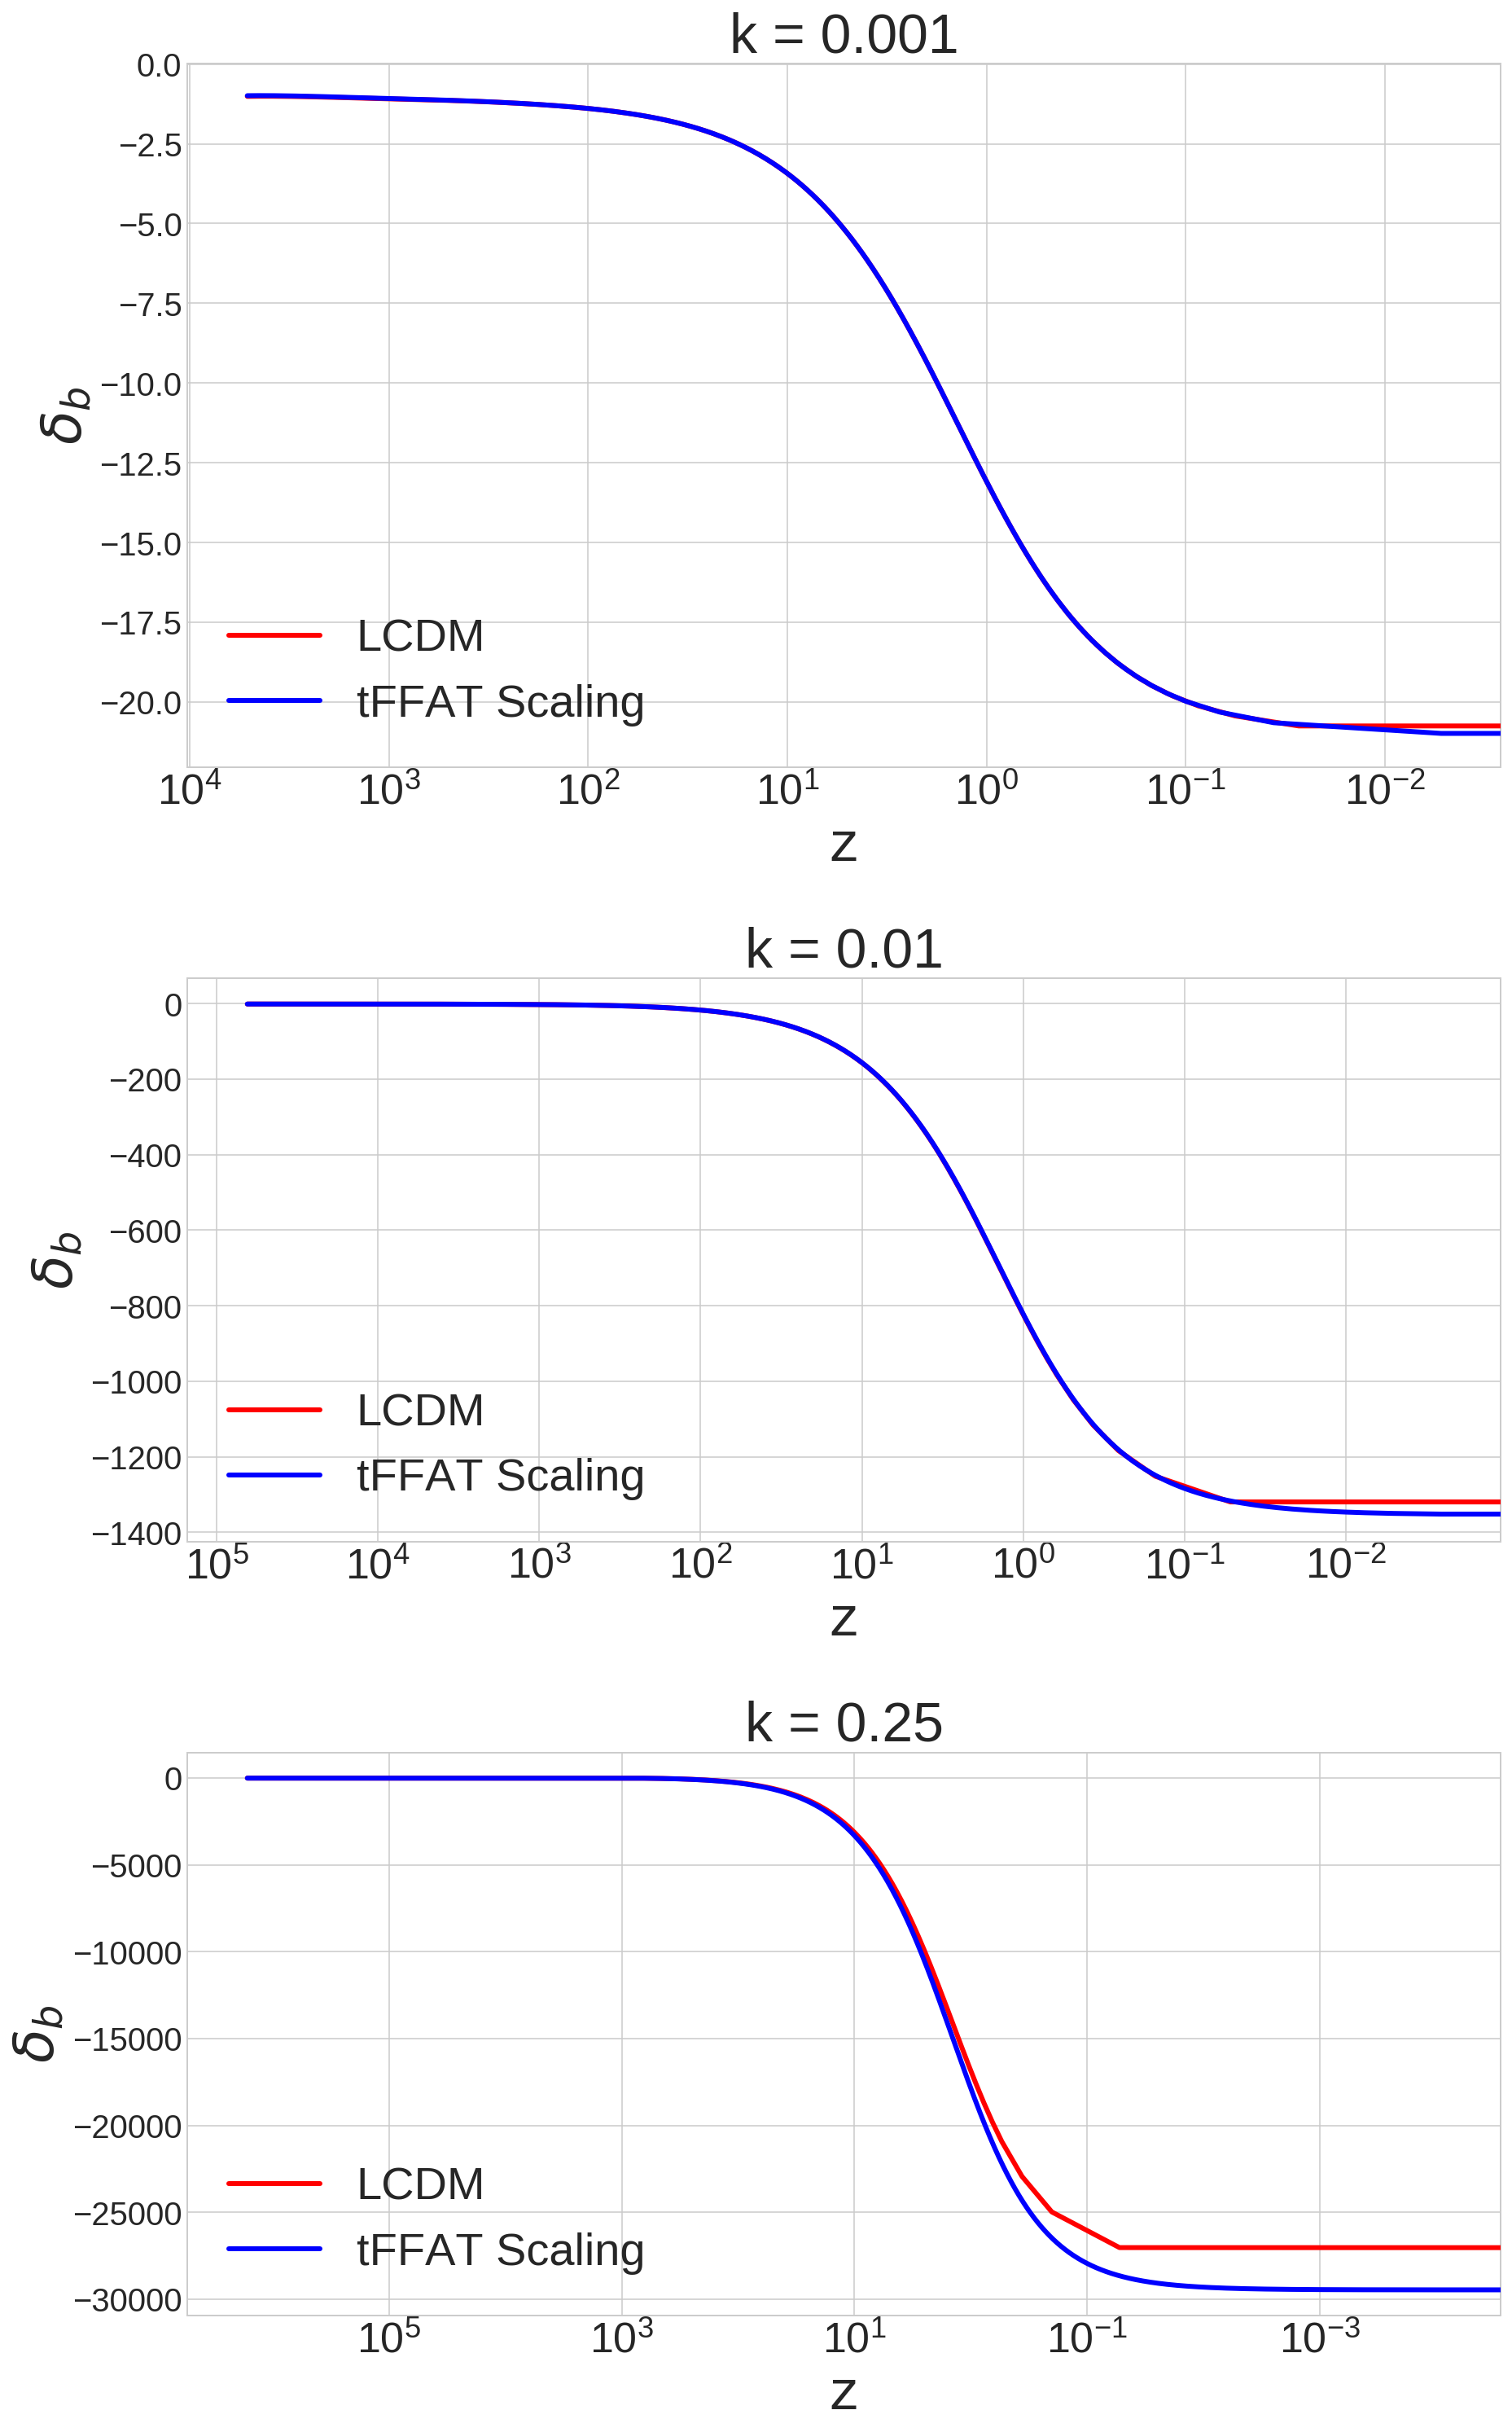

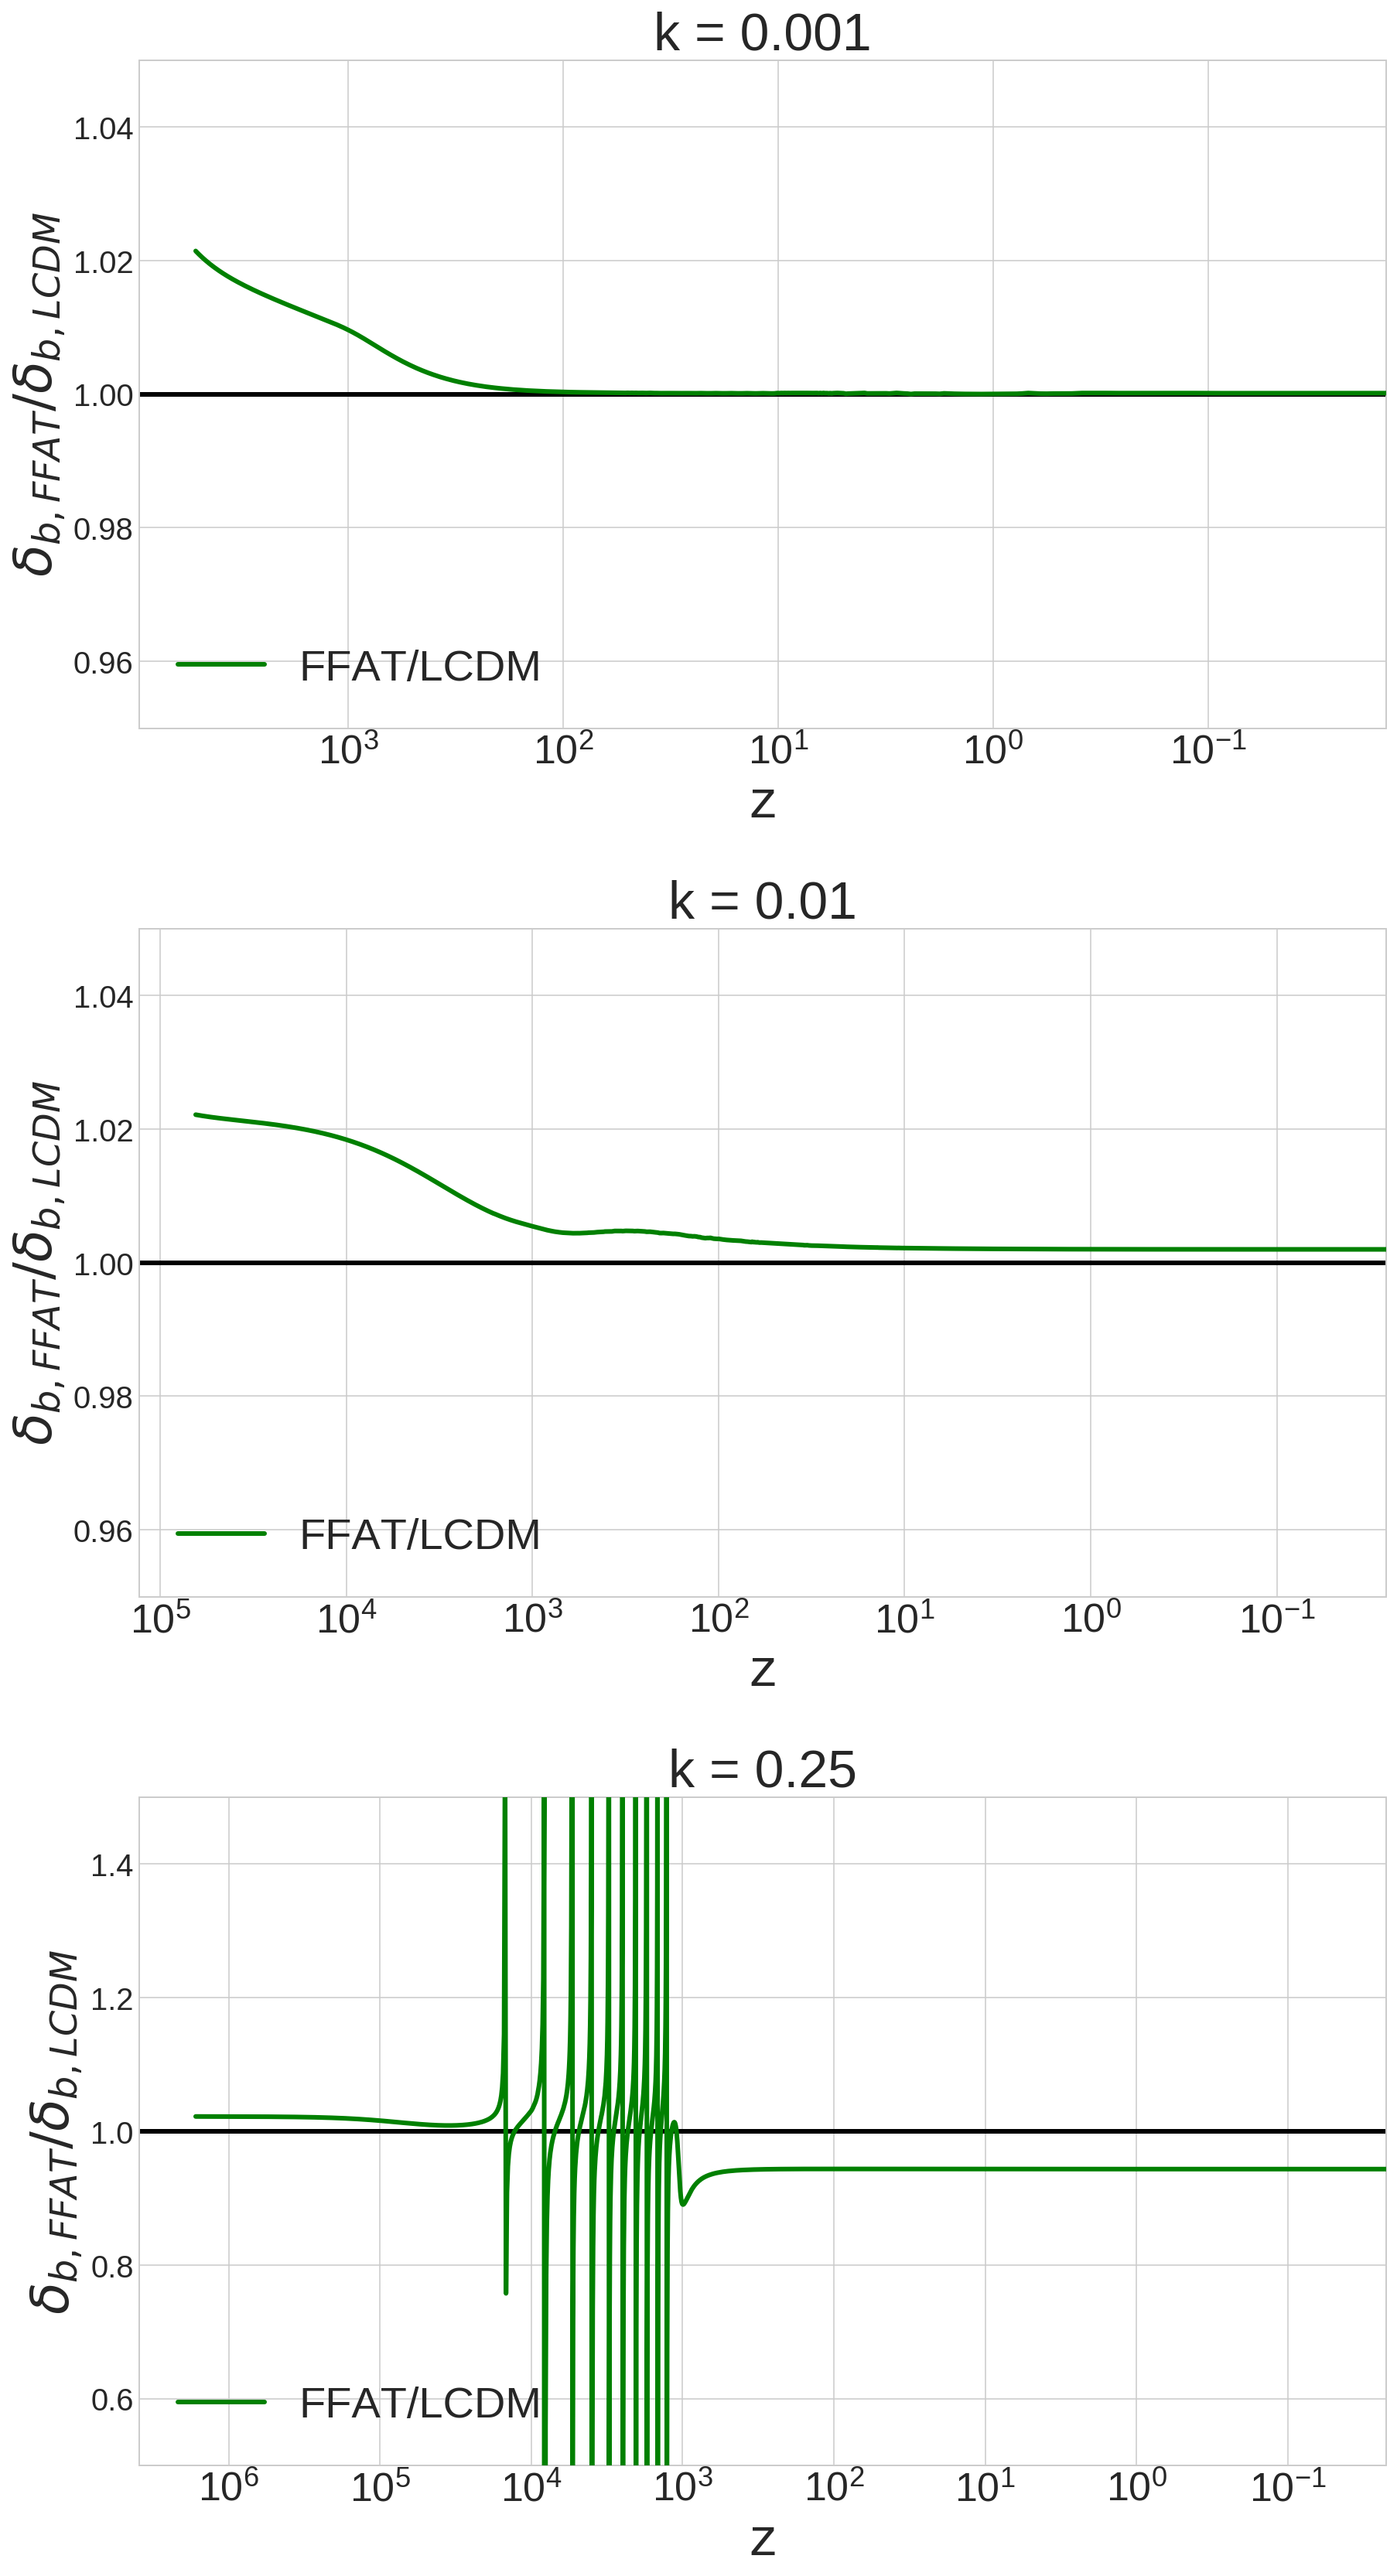

In [210]:
y1 = LCDM_delta_b_k0
x1 = LCDM_tau_k0
y2 = FFAT_delta_b_k0
x2 = FFAT_tau_k0

b1 = LCDM_delta_b_k1
a1 = LCDM_tau_k1
b2 = FFAT_delta_b_k1
a2 = FFAT_tau_k1

d1 = LCDM_delta_b_k2
c1 = LCDM_tau_k2
d2 = FFAT_delta_b_k2
c2 = FFAT_tau_k2

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="red",zorder=8,linewidth=3)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\delta_b$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title("k = 0.001",fontsize = 34)
#plt.xlim(0.01,)
frame1.invert_xaxis()
plt.xscale("log")

frame2=fig1.add_axes((.1,-0.05,.8,.4))        
plt.plot(a1,b1,color="red",zorder=8,linewidth=3)
plt.plot(a2,b2,color="blue",zorder=9,linewidth=3)
plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\delta_b$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.01",fontsize = 34)
#plt.xlim(0.01,)
frame2.invert_xaxis()
plt.xscale("log")


frame3=fig1.add_axes((.1,-0.6,.8,.4))        
plt.plot(c1,d1,color="red",zorder=8,linewidth=3)
plt.plot(c2,d2,color="blue",zorder=9,linewidth=3)
plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\delta_b$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.25",fontsize = 34)
#plt.xlim(0.01,)
frame3.invert_xaxis()
plt.xscale("log")


fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('delta_b.pdf', dpi=800,bbox_inches='tight')  
plt.show()

from scipy import interpolate
f = interpolate.interp1d(x2,y2)
y1_interp = f(x1)
f = interpolate.interp1d(a2,b2)
b1_interp = f(a1)
f = interpolate.interp1d(c2,d2)
d1_interp = f(c1)

y_ratio = y1/y1_interp
b_ratio = b1/b1_interp
d_ratio = d1/d1_interp

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y_ratio,color="green",zorder=8,linewidth=3)
#plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\delta_{b,FFAT}/\delta_{b,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title("k = 0.001",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.95,1.05)
frame1.invert_xaxis()
plt.xscale("log")

frame2=fig1.add_axes((.1,-0.15,.8,.5))        
plt.plot(a1,b_ratio,color="green",zorder=8,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\delta_{b,FFAT}/\delta_{b,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.01",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.95,1.05)
frame2.invert_xaxis()
plt.xscale("log")


frame3=fig1.add_axes((.1,-0.8,.8,.5))        
plt.plot(c1,d_ratio,color="green",zorder=8,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\delta_{b,FFAT}/\delta_{b,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.25",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.5,1.5)
frame3.invert_xaxis()
plt.xscale("log")


fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('delta_b_ratio.pdf', dpi=800,bbox_inches='tight')  
plt.show()

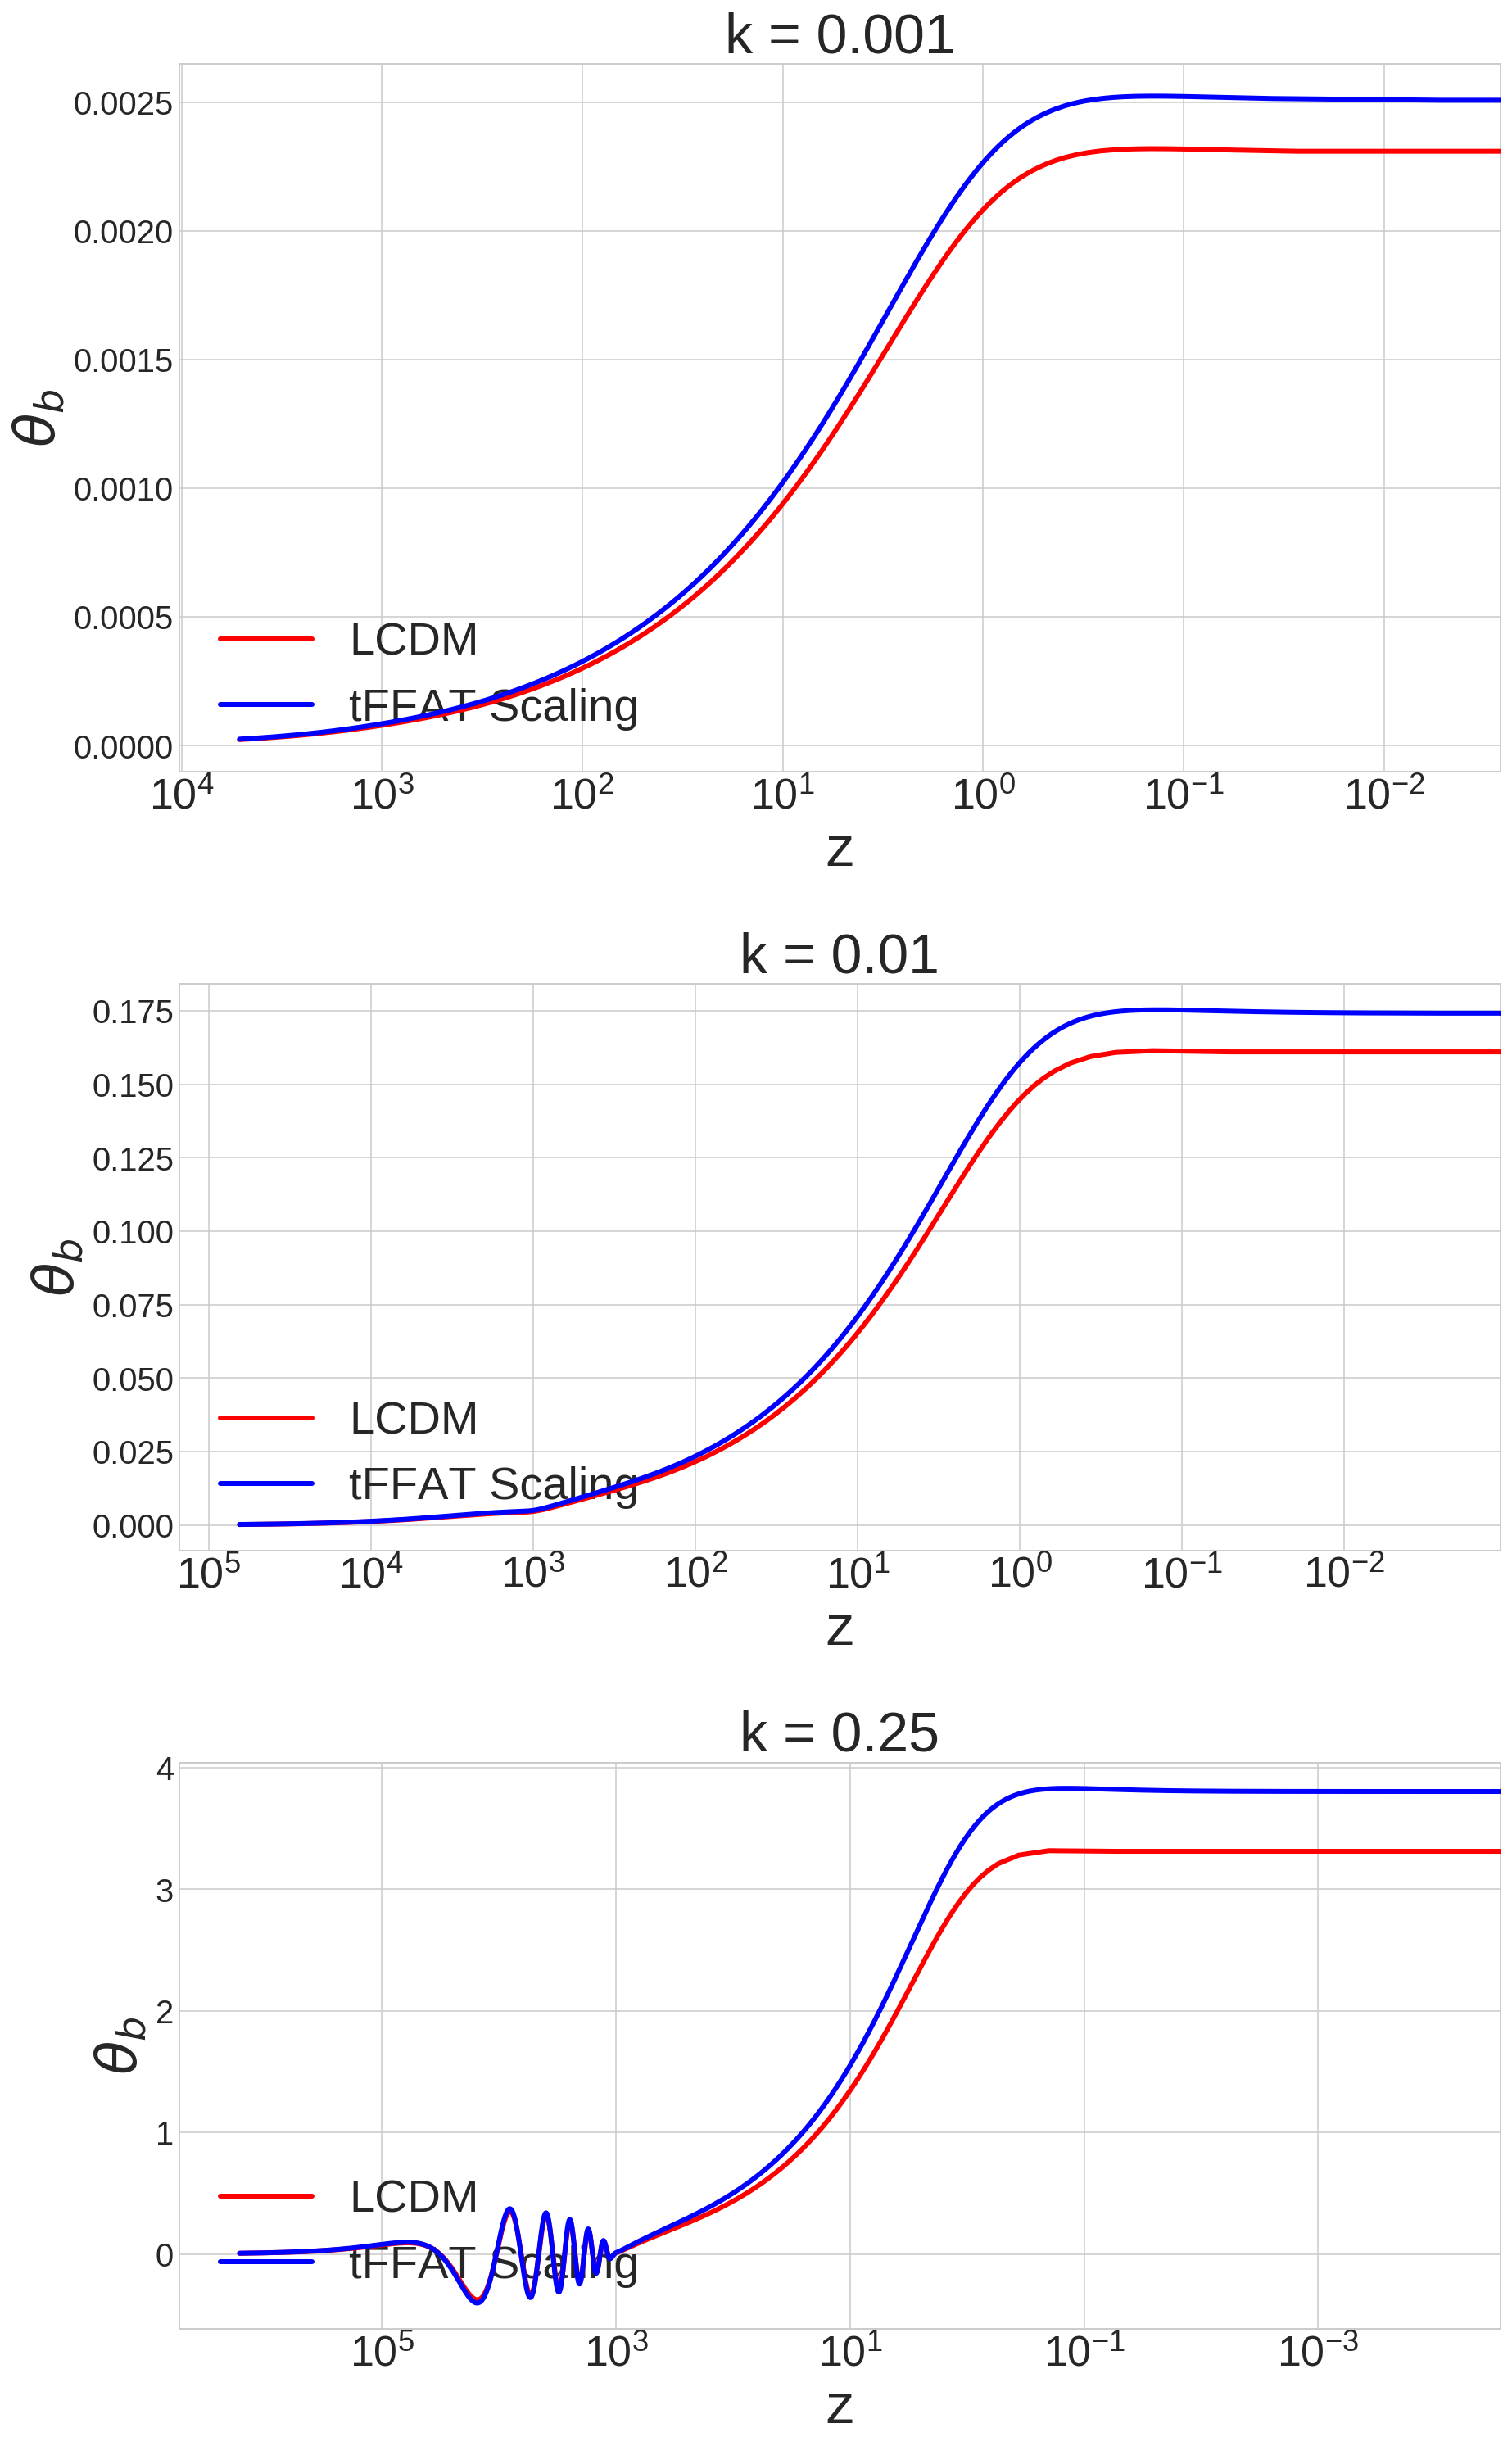

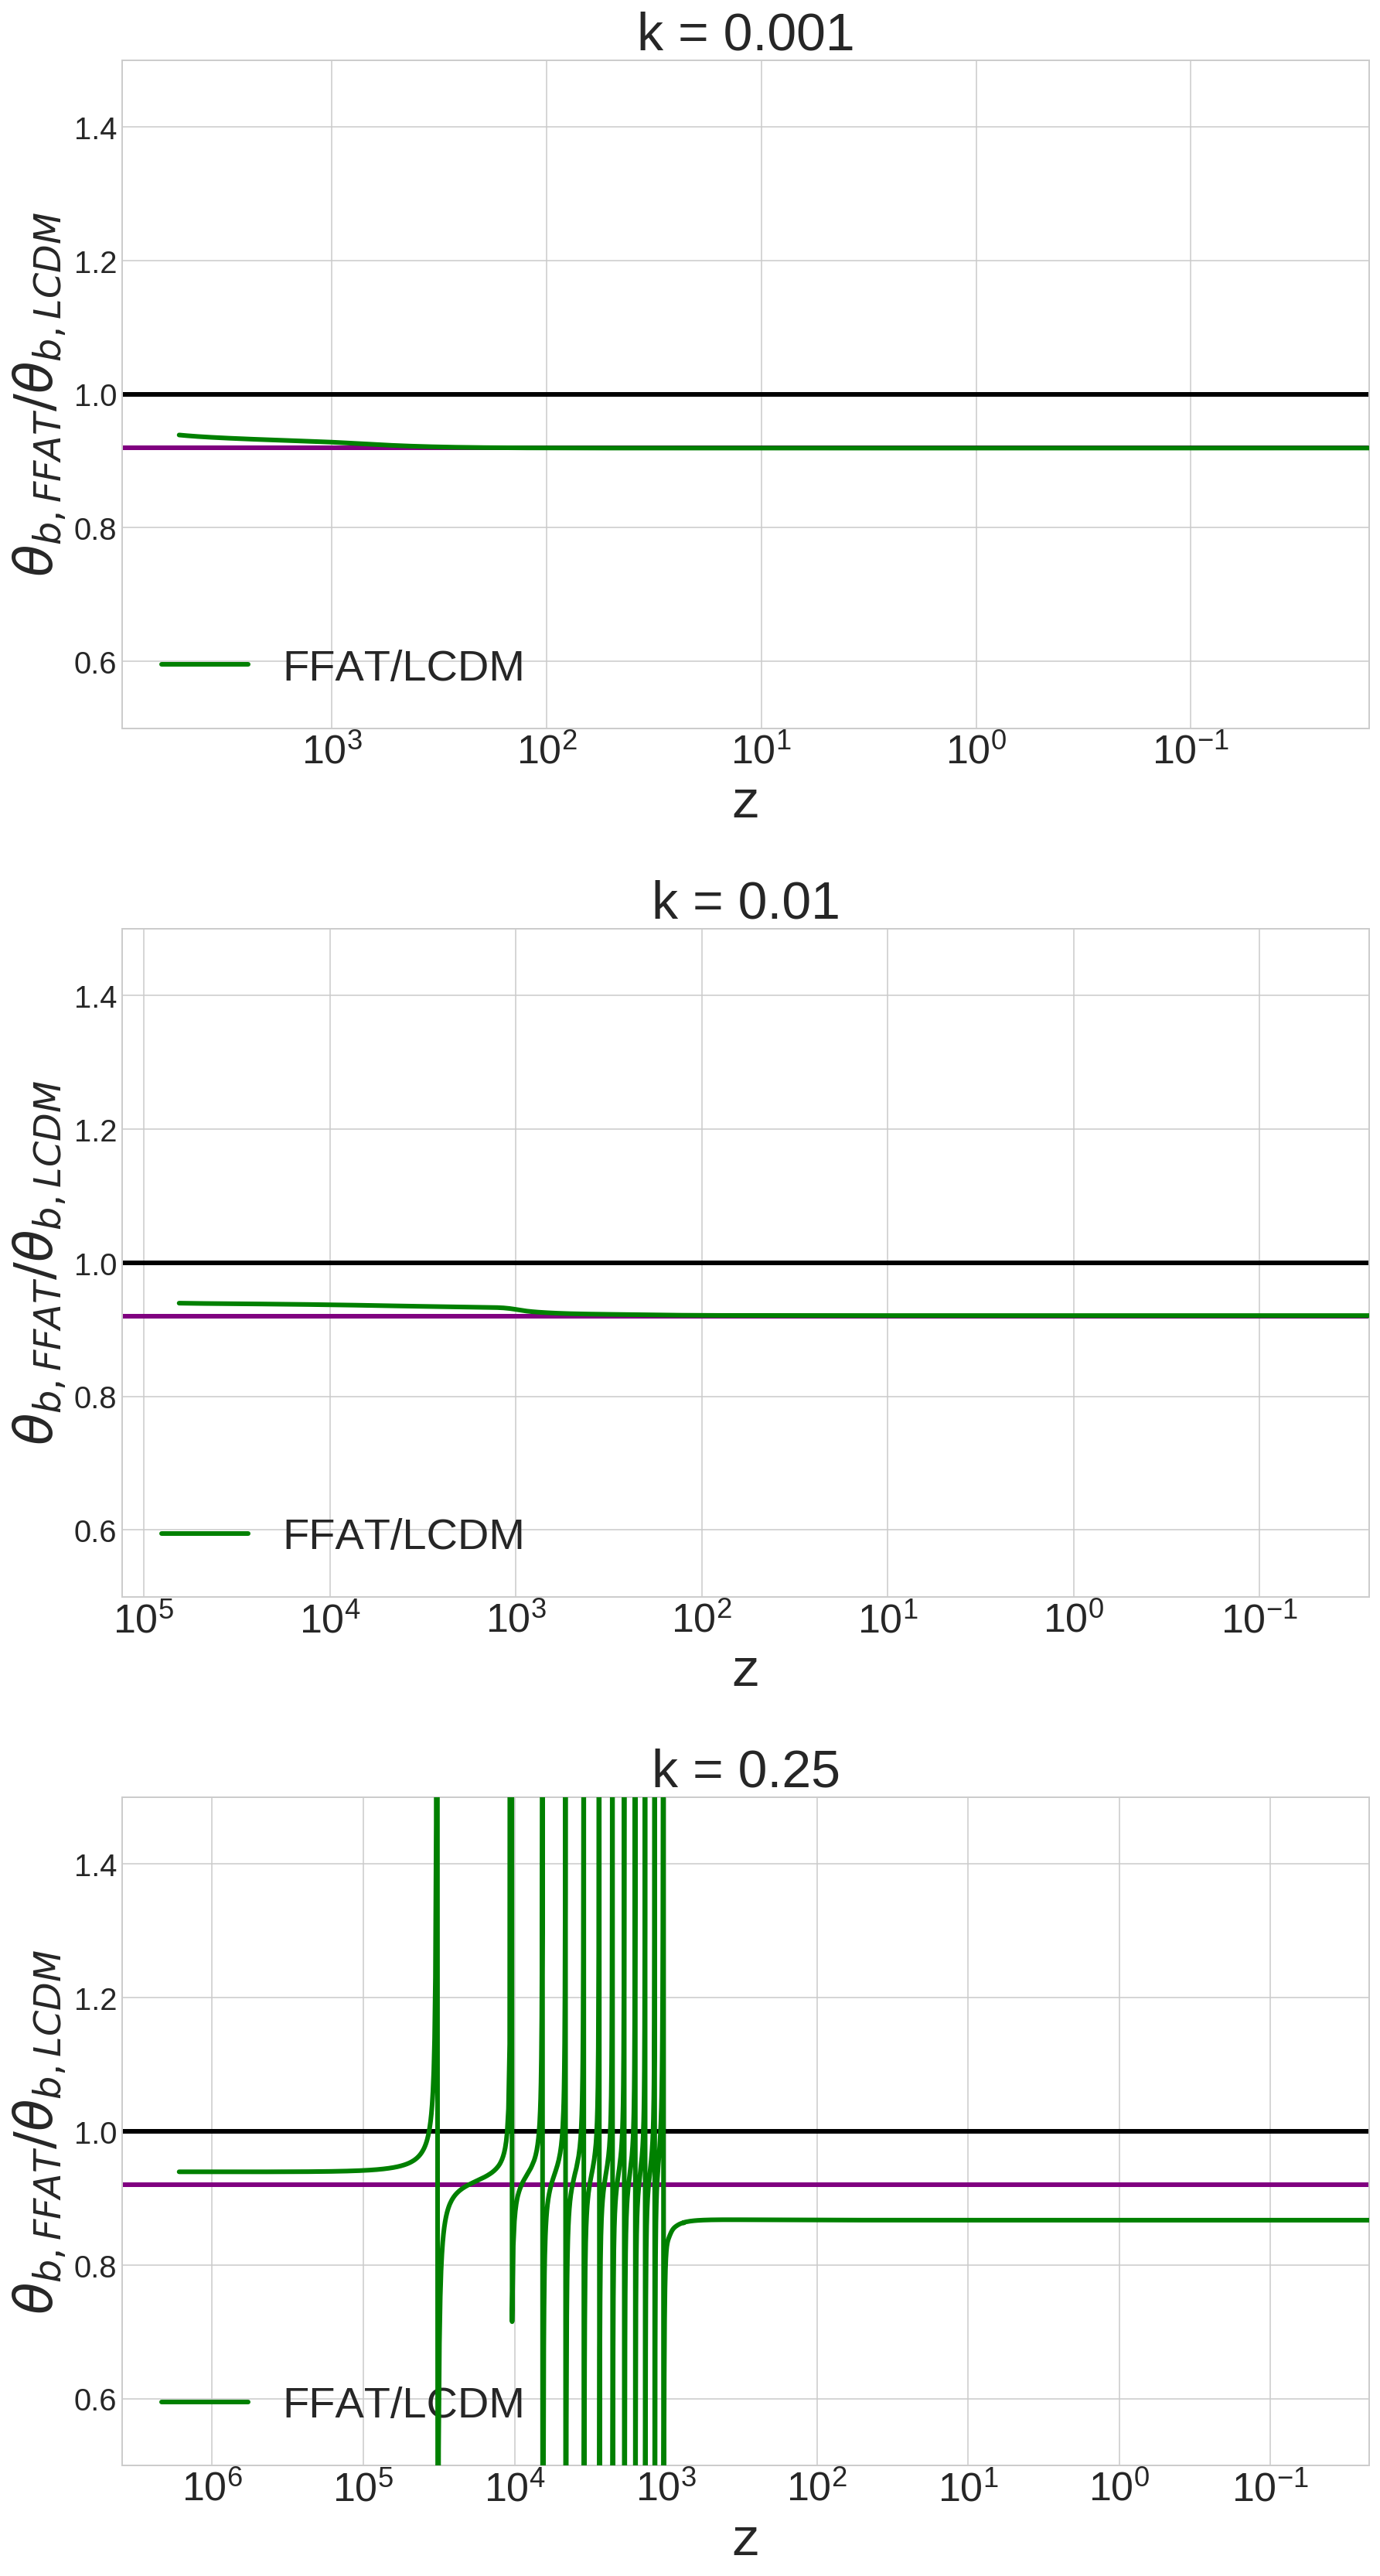

In [211]:
y1 = LCDM_theta_b_k0
x1 = LCDM_tau_k0
y2 = FFAT_theta_b_k0
x2 = FFAT_tau_k0

b1 = LCDM_theta_b_k1
a1 = LCDM_tau_k1
b2 = FFAT_theta_b_k1
a2 = FFAT_tau_k1

d1 = LCDM_theta_b_k2
c1 = LCDM_tau_k2
d2 = FFAT_theta_b_k2
c2 = FFAT_tau_k2

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="red",zorder=8,linewidth=3)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\theta_b$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title("k = 0.001",fontsize = 34)
#plt.xlim(0.01,)
frame1.invert_xaxis()
plt.xscale("log")

frame2=fig1.add_axes((.1,-0.05,.8,.4))        
plt.plot(a1,b1,color="red",zorder=8,linewidth=3)
plt.plot(a2,b2,color="blue",zorder=9,linewidth=3)
plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\theta_b$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.01",fontsize = 34)
#plt.xlim(0.01,)
frame2.invert_xaxis()
plt.xscale("log")


frame3=fig1.add_axes((.1,-0.6,.8,.4))        
plt.plot(c1,d1,color="red",zorder=8,linewidth=3)
plt.plot(c2,d2,color="blue",zorder=9,linewidth=3)
plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\theta_b$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.25",fontsize = 34)
#plt.xlim(0.01,)
frame3.invert_xaxis()
plt.xscale("log")


fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('theta_b.pdf', dpi=800,bbox_inches='tight')  
plt.show()

from scipy import interpolate
f = interpolate.interp1d(x2,y2)
y1_interp = f(x1)
f = interpolate.interp1d(a2,b2)
b1_interp = f(a1)
f = interpolate.interp1d(c2,d2)
d1_interp = f(c1)

y_ratio = y1/y1_interp
b_ratio = b1/b1_interp
d_ratio = d1/d1_interp

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y_ratio,color="green",zorder=8,linewidth=3)
#plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\theta_{b,FFAT}/\theta_{b,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title("k = 0.001",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
plt.axhline(0.91950886766 ,color='purple',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.5,1.5)
frame1.invert_xaxis()
plt.xscale("log")

frame2=fig1.add_axes((.1,-0.15,.8,.5))        
plt.plot(a1,b_ratio,color="green",zorder=8,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\theta_{b,FFAT}/\theta_{b,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.01",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
plt.axhline(0.91950886766 ,color='purple',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.5,1.5)
frame2.invert_xaxis()
plt.xscale("log")


frame3=fig1.add_axes((.1,-0.8,.8,.5))        
plt.plot(c1,d_ratio,color="green",zorder=8,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\theta_{b,FFAT}/\theta_{b,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.25",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
plt.axhline(0.91950886766 ,color='purple',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.5,1.5)
frame3.invert_xaxis()
plt.xscale("log")


fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('theta_b_ratio.pdf', dpi=800,bbox_inches='tight')  
plt.show()

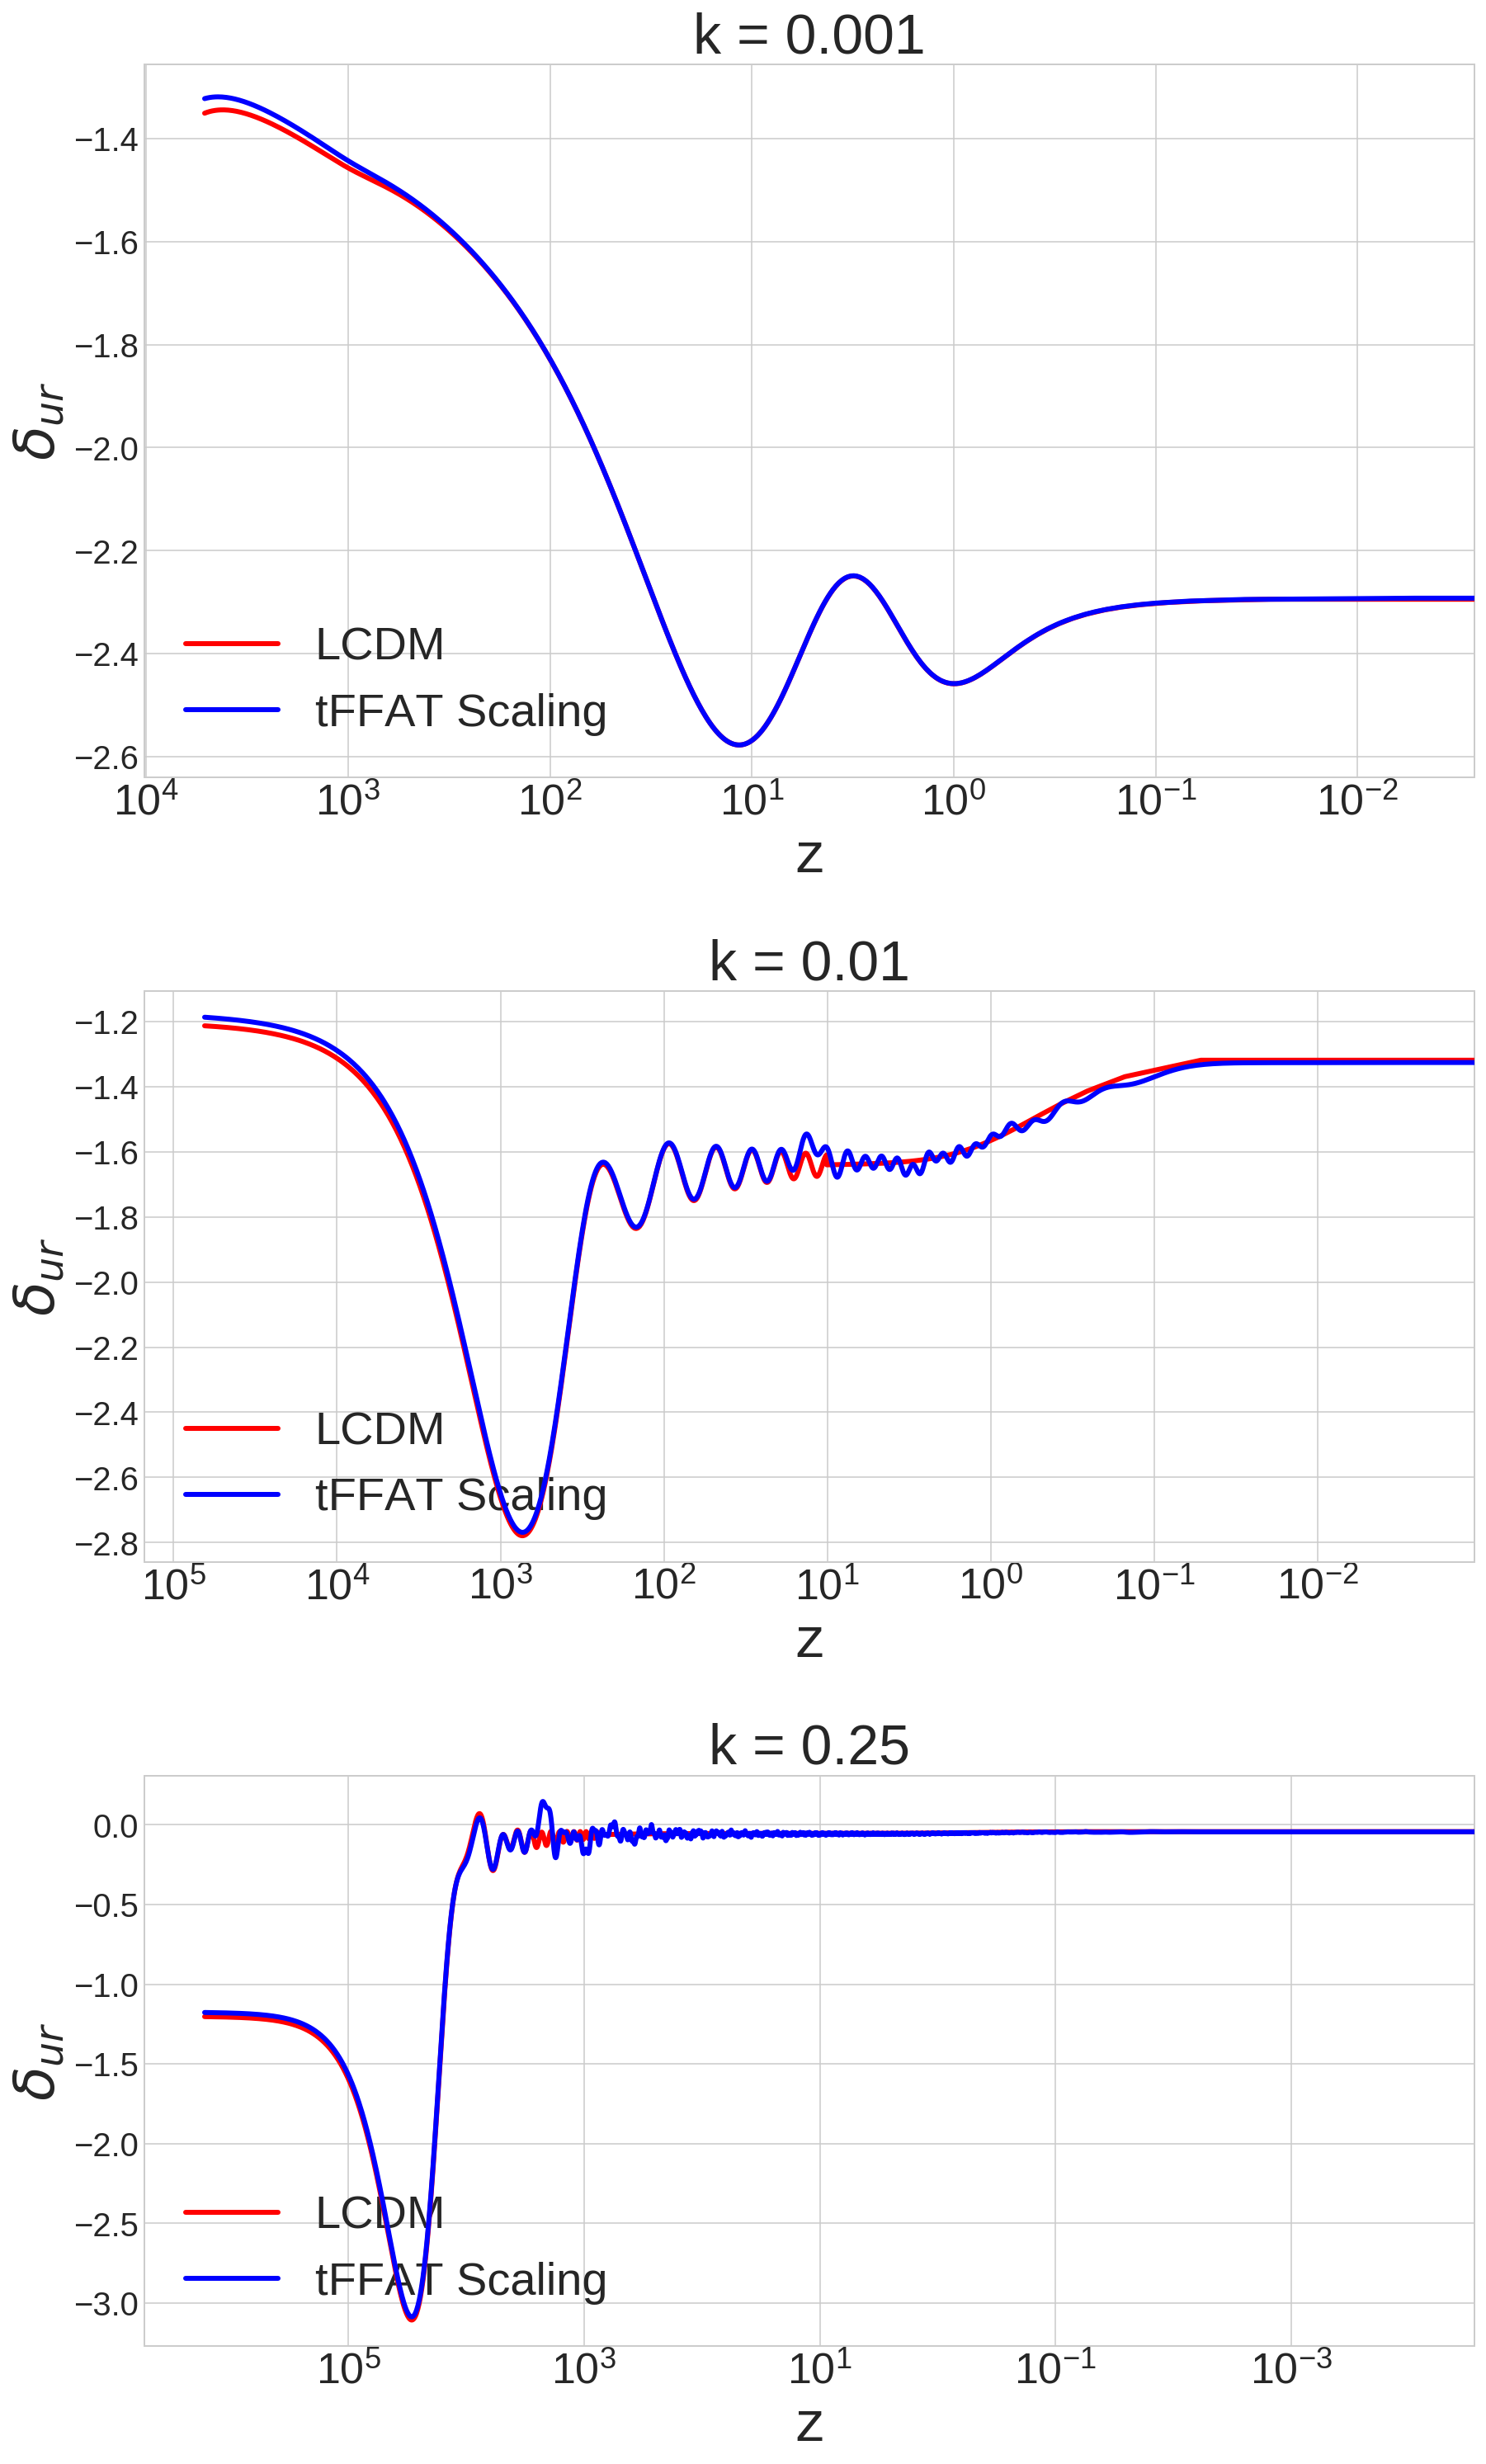

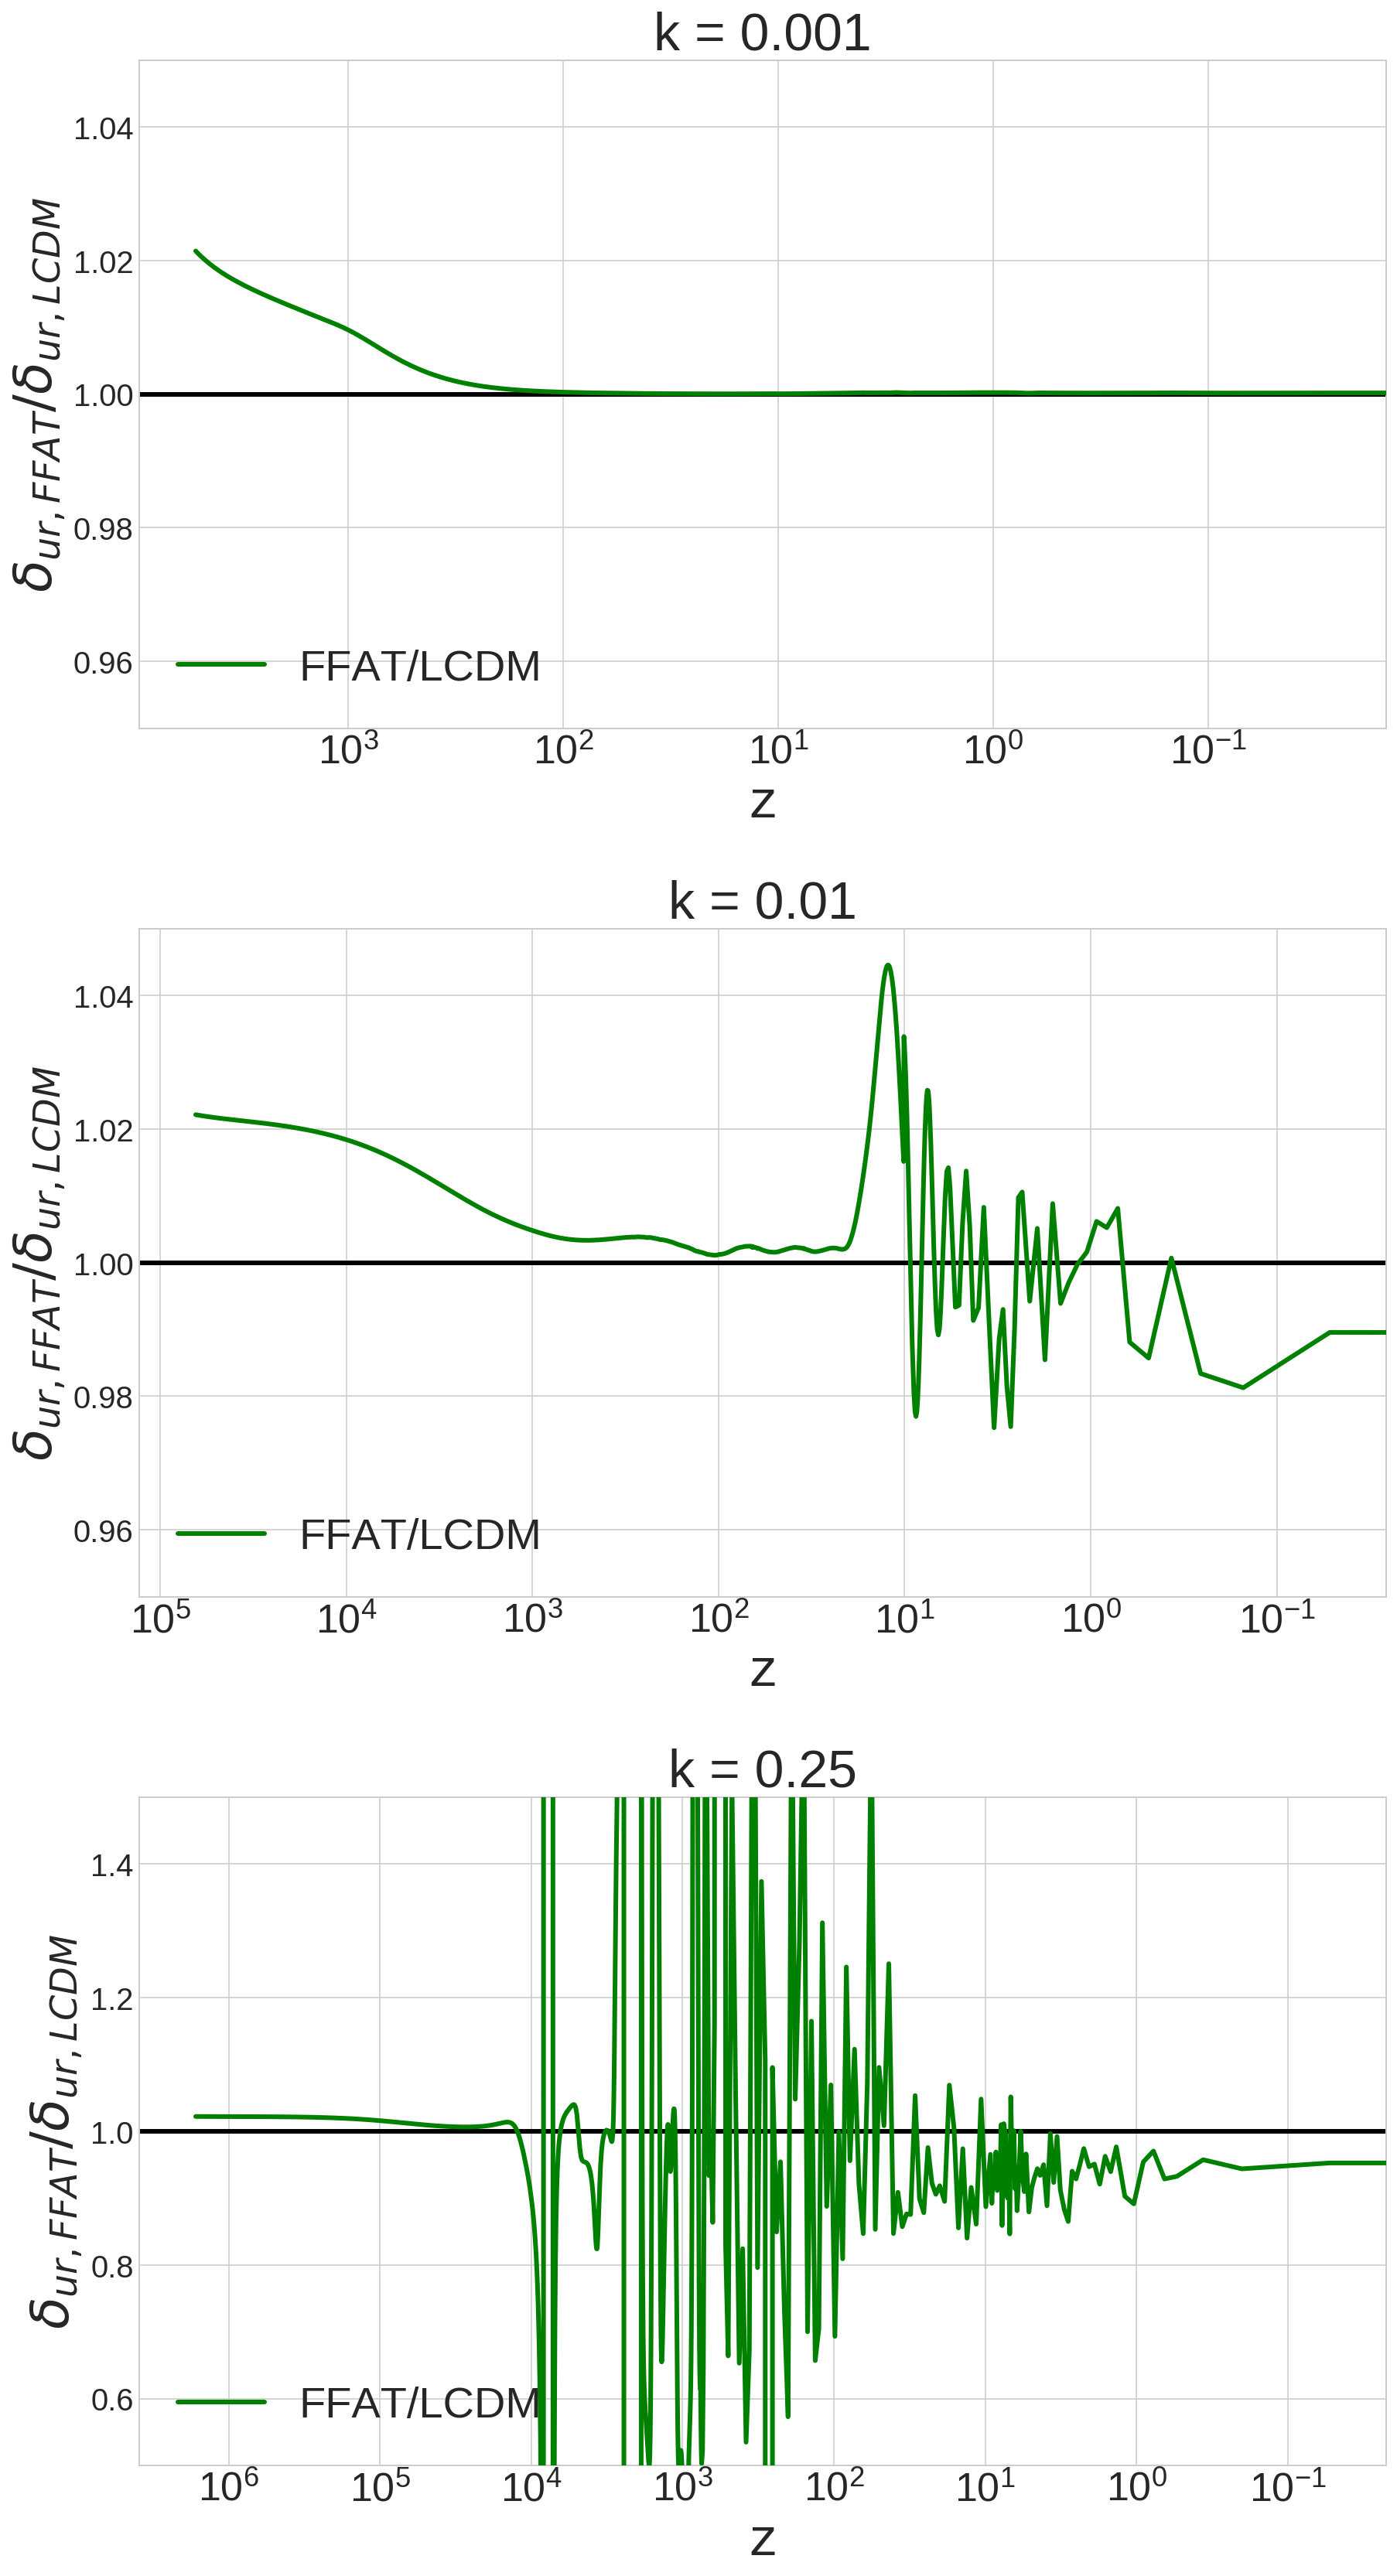

In [212]:
y1 = LCDM_delta_ur_k0
x1 = LCDM_tau_k0
y2 = FFAT_delta_ur_k0
x2 = FFAT_tau_k0

b1 = LCDM_delta_ur_k1
a1 = LCDM_tau_k1
b2 = FFAT_delta_ur_k1
a2 = FFAT_tau_k1

d1 = LCDM_delta_ur_k2
c1 = LCDM_tau_k2
d2 = FFAT_delta_ur_k2
c2 = FFAT_tau_k2

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="red",zorder=8,linewidth=3)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\delta_{ur}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title("k = 0.001",fontsize = 34)
#plt.xlim(0.01,)
frame1.invert_xaxis()
plt.xscale("log")

frame2=fig1.add_axes((.1,-0.05,.8,.4))        
plt.plot(a1,b1,color="red",zorder=8,linewidth=3)
plt.plot(a2,b2,color="blue",zorder=9,linewidth=3)
plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\delta_{ur}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.01",fontsize = 34)
#plt.xlim(0.01,)
frame2.invert_xaxis()
plt.xscale("log")


frame3=fig1.add_axes((.1,-0.6,.8,.4))        
plt.plot(c1,d1,color="red",zorder=8,linewidth=3)
plt.plot(c2,d2,color="blue",zorder=9,linewidth=3)
plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\delta_{ur}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.25",fontsize = 34)
#plt.xlim(0.01,)
frame3.invert_xaxis()
plt.xscale("log")


fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('delta_ur.pdf', dpi=800,bbox_inches='tight')  
plt.show()

from scipy import interpolate
f = interpolate.interp1d(x2,y2)
y1_interp = f(x1)
f = interpolate.interp1d(a2,b2)
b1_interp = f(a1)
f = interpolate.interp1d(c2,d2)
d1_interp = f(c1)

y_ratio = y1/y1_interp
b_ratio = b1/b1_interp
d_ratio = d1/d1_interp

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y_ratio,color="green",zorder=8,linewidth=3)
#plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\delta_{ur,FFAT}/\delta_{ur,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title("k = 0.001",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.95,1.05)
frame1.invert_xaxis()
plt.xscale("log")

frame2=fig1.add_axes((.1,-0.15,.8,.5))        
plt.plot(a1,b_ratio,color="green",zorder=8,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\delta_{ur,FFAT}/\delta_{ur,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.01",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.95,1.05)
frame2.invert_xaxis()
plt.xscale("log")


frame3=fig1.add_axes((.1,-0.8,.8,.5))        
plt.plot(c1,d_ratio,color="green",zorder=8,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\delta_{ur,FFAT}/\delta_{ur,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.25",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.5,1.5)
frame3.invert_xaxis()
plt.xscale("log")


fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('delta_ur_ratio.pdf', dpi=800,bbox_inches='tight')  
plt.show()

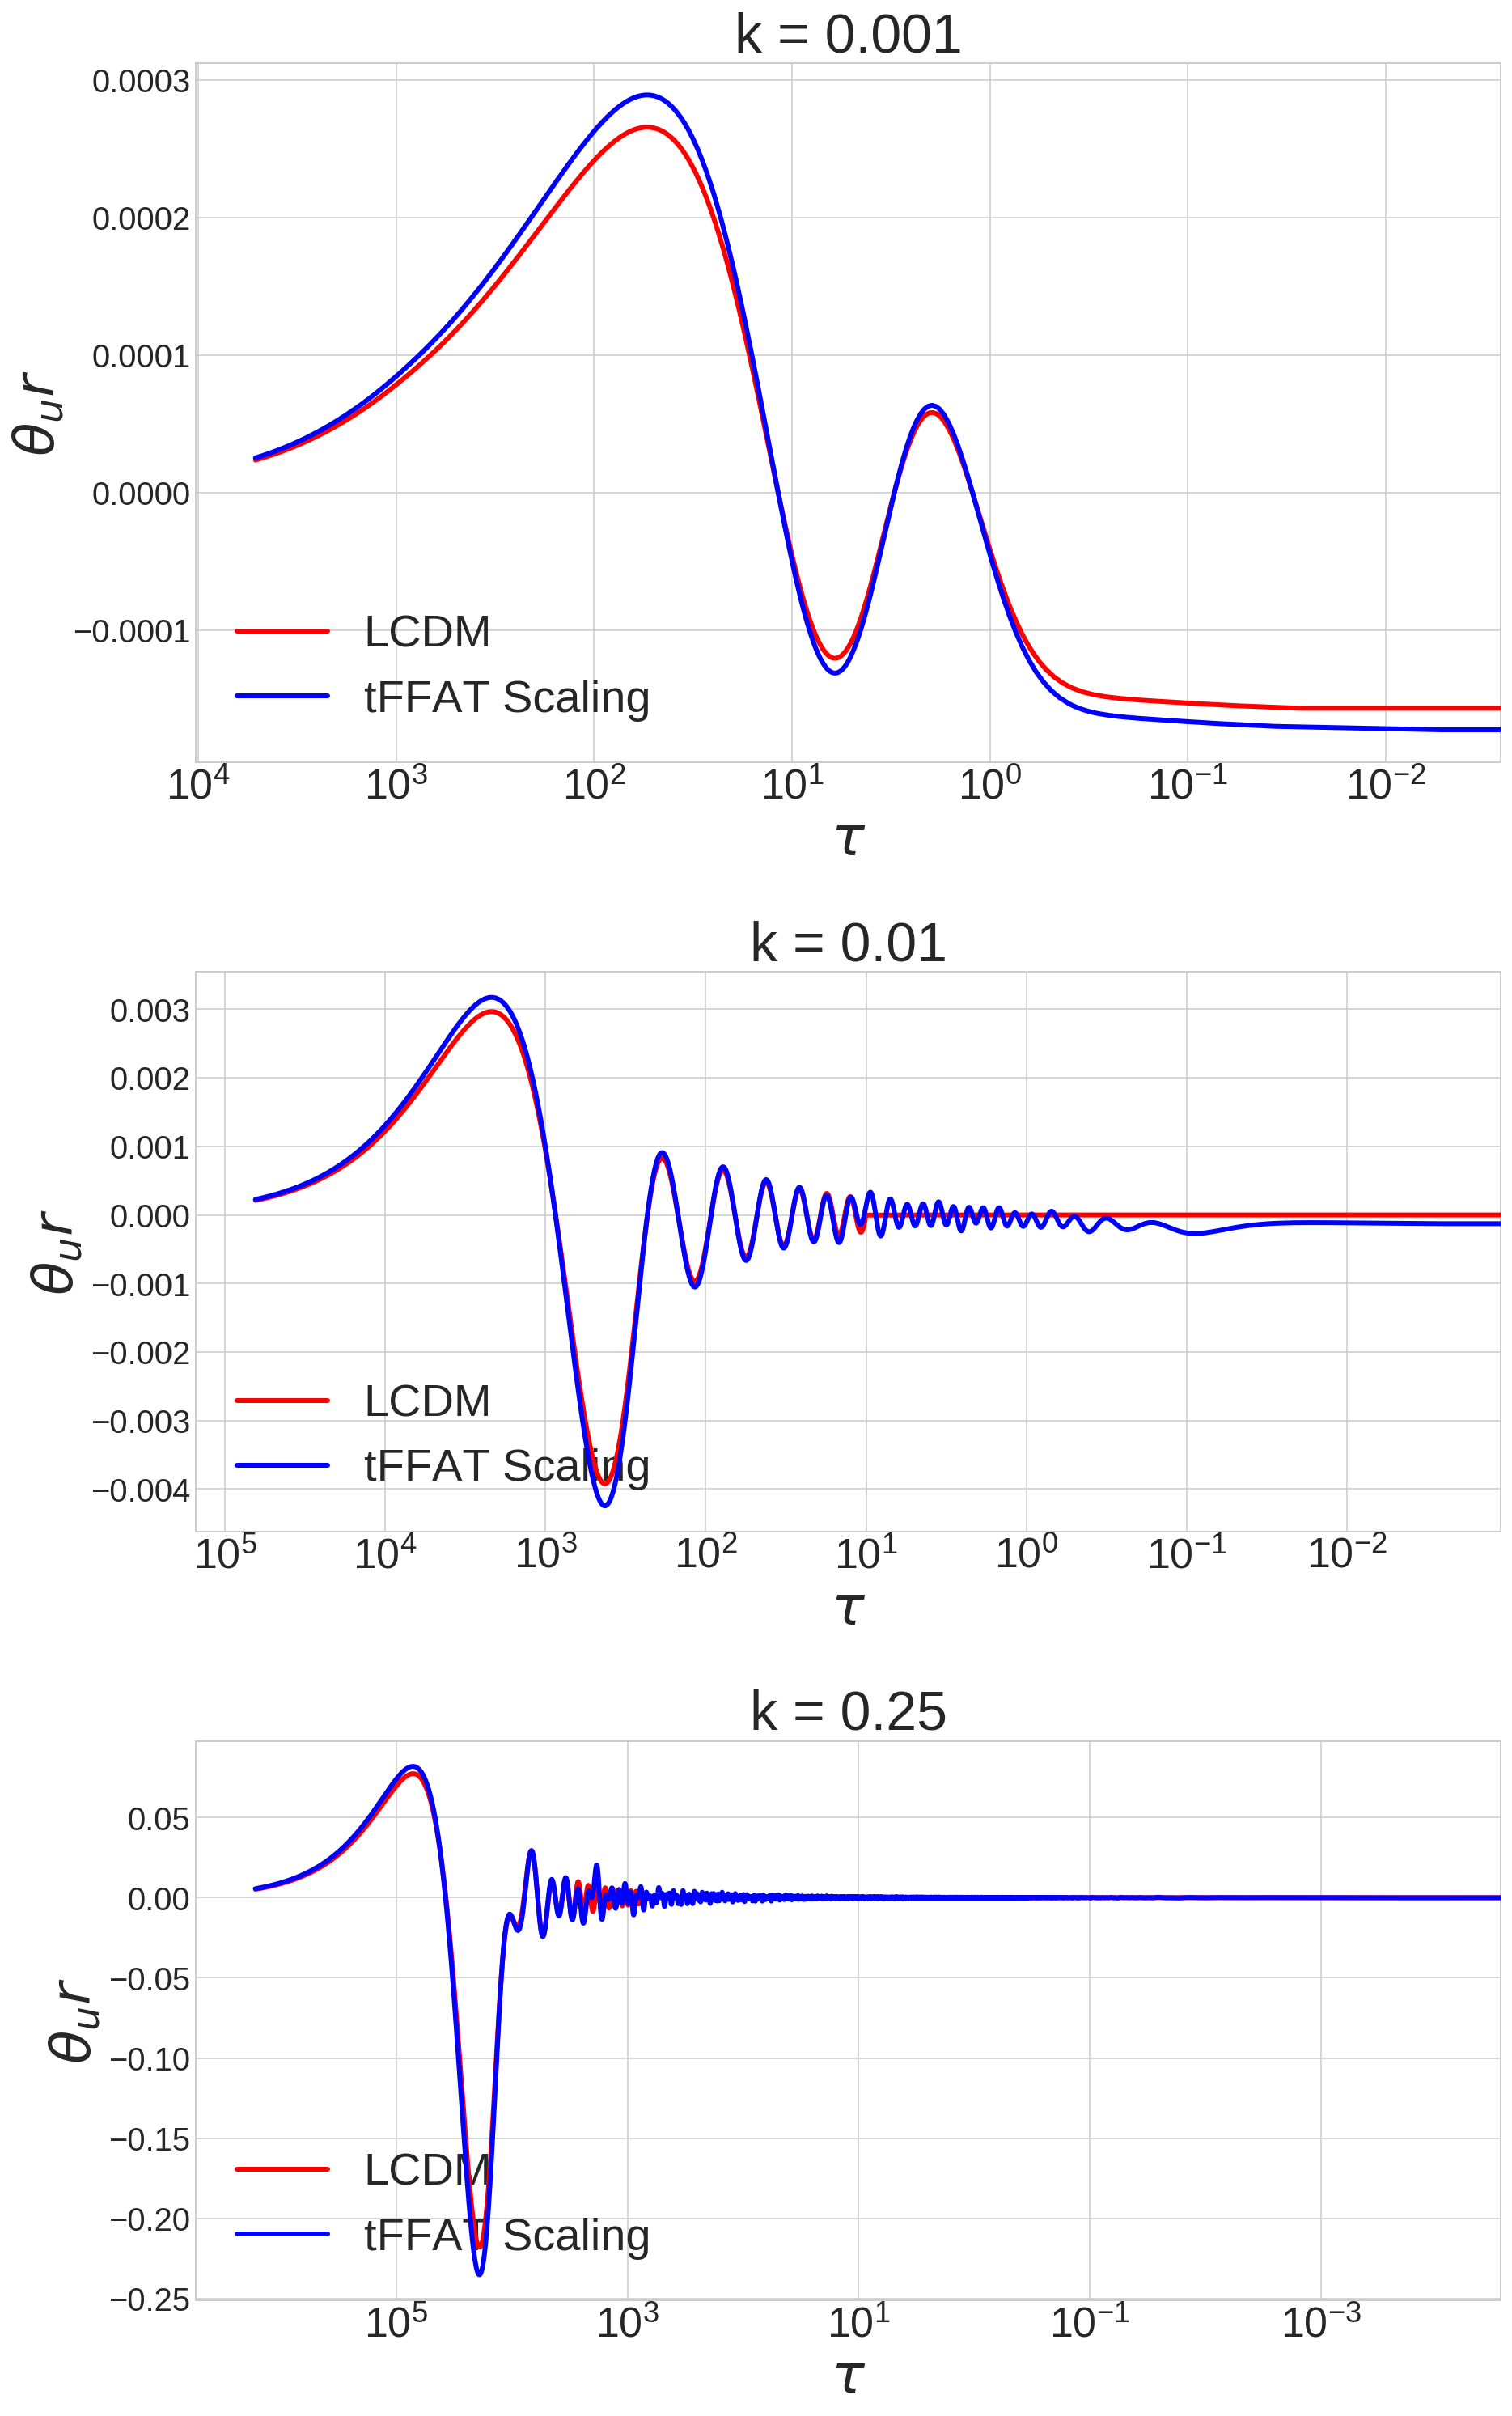

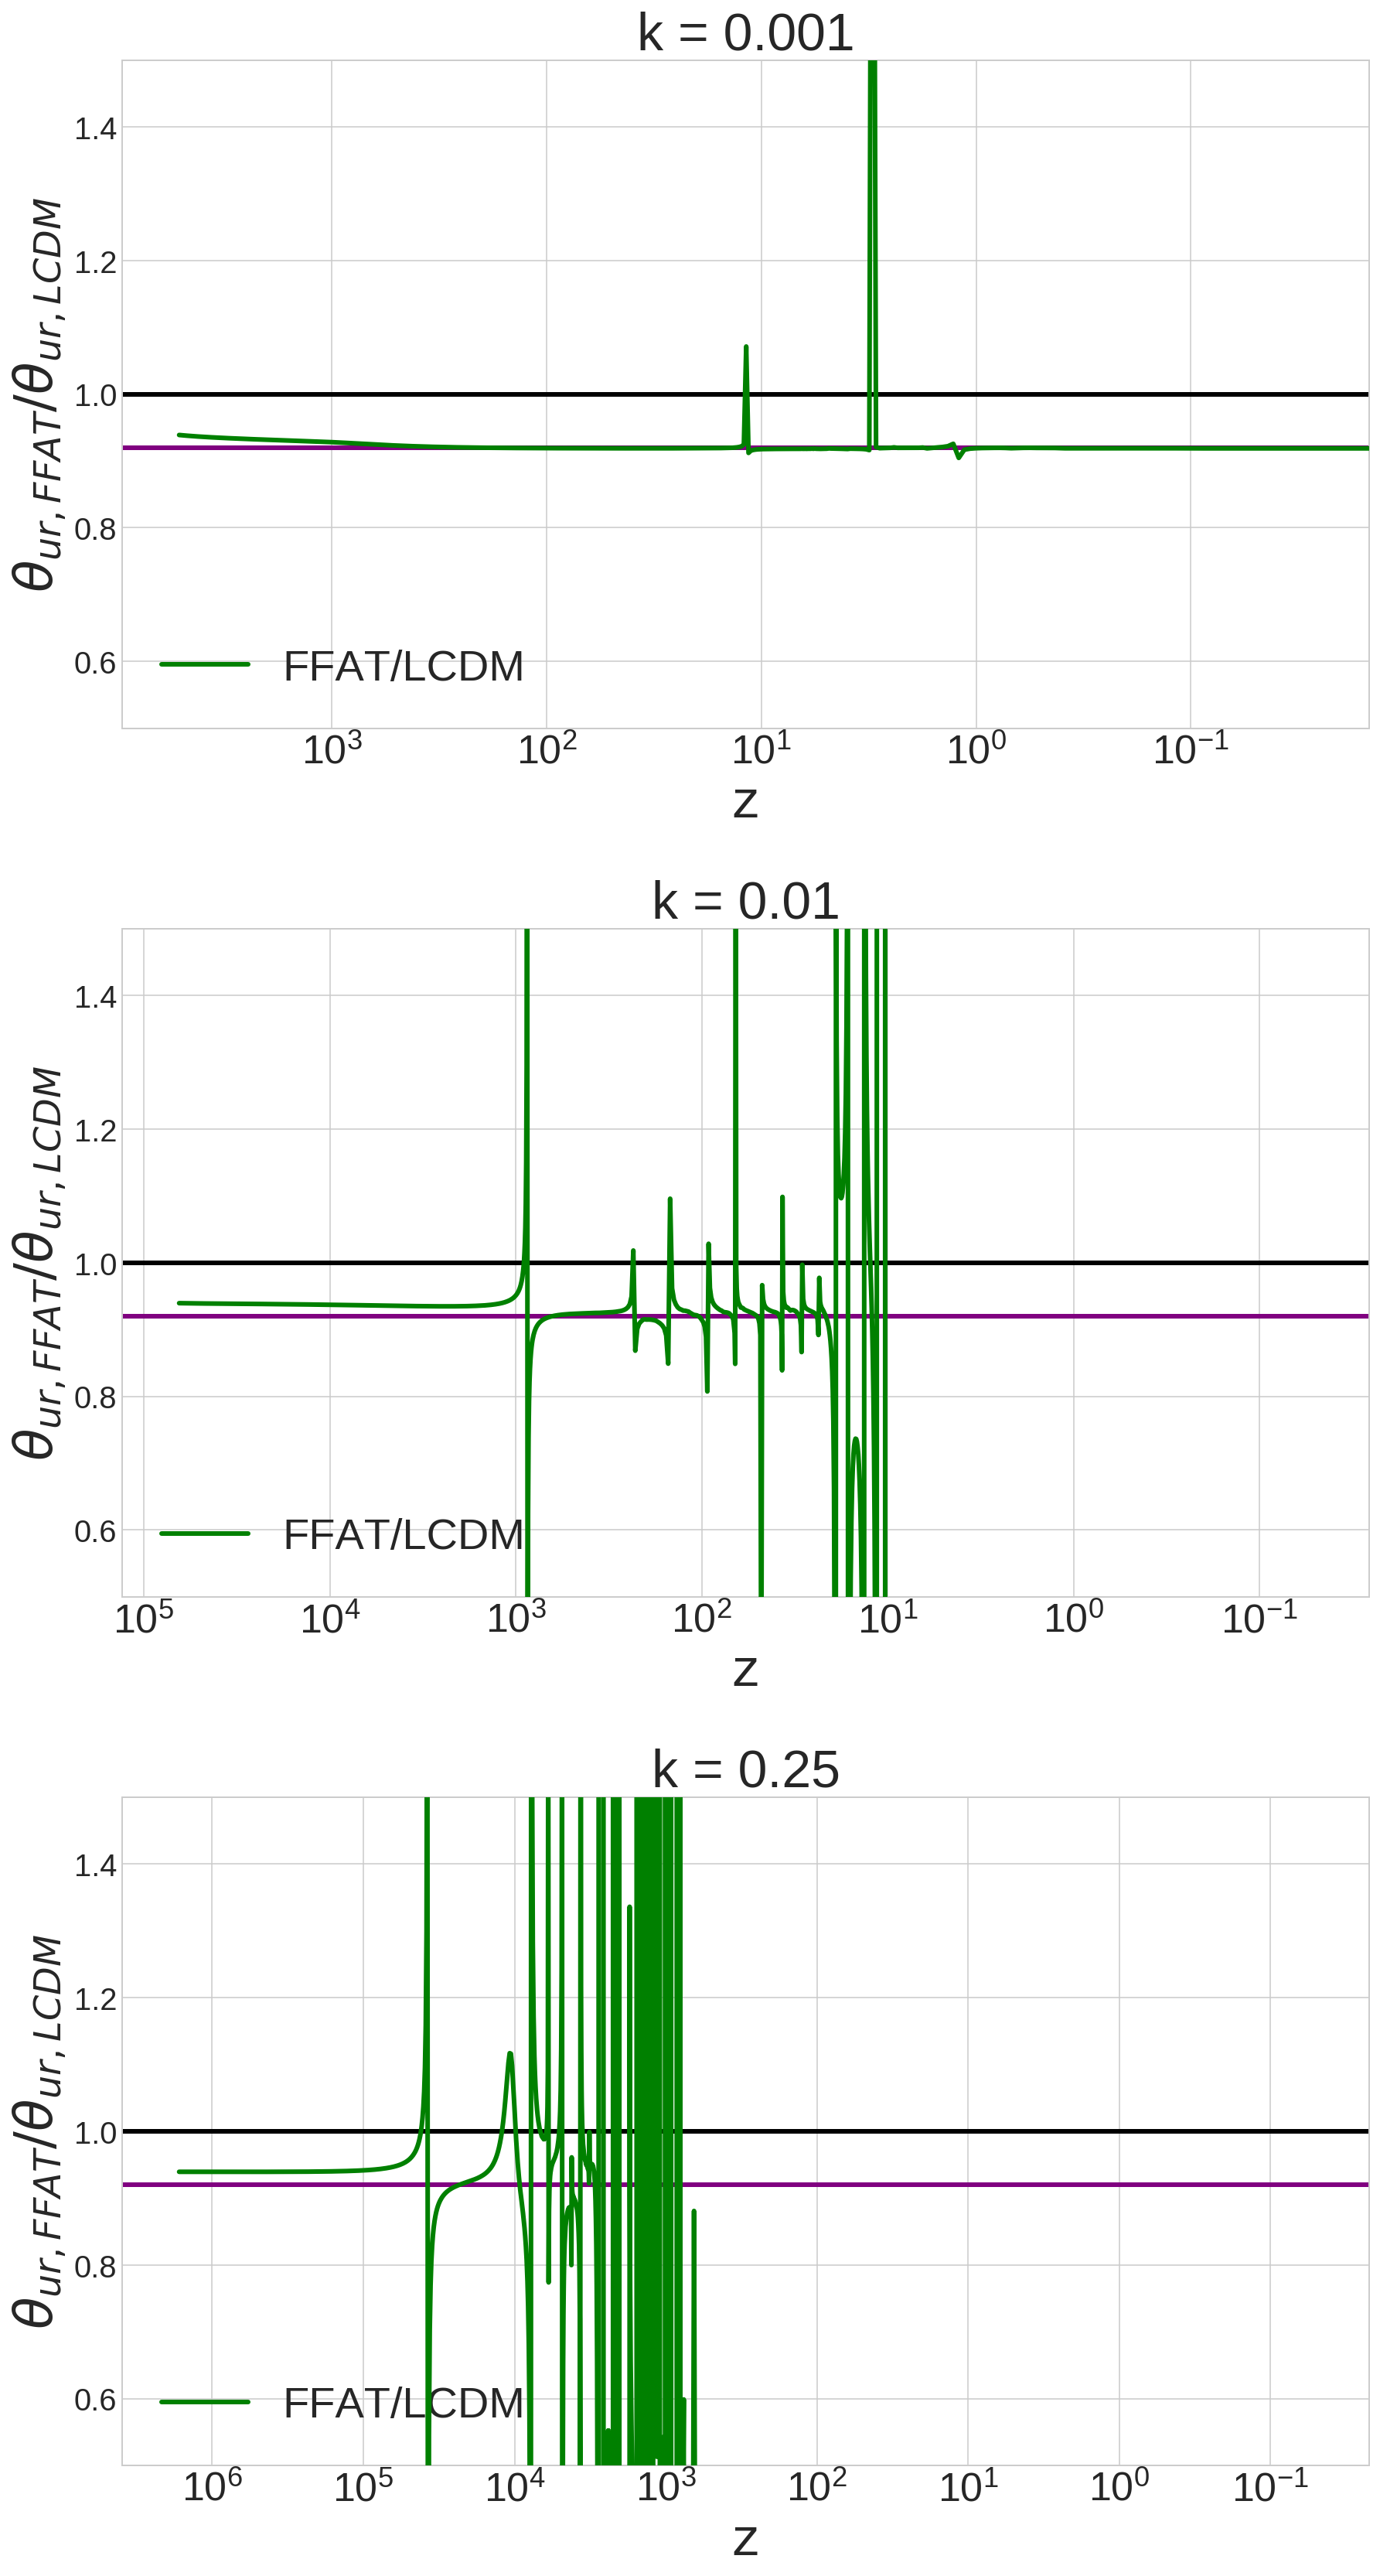

In [213]:
y1 = LCDM_theta_ur_k0
x1 = LCDM_tau_k0
y2 = FFAT_theta_ur_k0
x2 = FFAT_tau_k0

b1 = LCDM_theta_ur_k1
a1 = LCDM_tau_k1
b2 = FFAT_theta_ur_k1
a2 = FFAT_tau_k1

d1 = LCDM_theta_ur_k2
c1 = LCDM_tau_k2
d2 = FFAT_theta_ur_k2
c2 = FFAT_tau_k2

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="red",zorder=8,linewidth=3)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"$\tau$",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\theta_ur$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title("k = 0.001",fontsize = 34)
plt.xscale("log")
frame1.invert_xaxis()


frame2=fig1.add_axes((.1,-0.05,.8,.4))        
plt.plot(a1,b1,color="red",zorder=8,linewidth=3)
plt.plot(a2,b2,color="blue",zorder=9,linewidth=3)
plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"$\tau$",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\theta_ur$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.01",fontsize = 34)
plt.xscale("log")
frame2.invert_xaxis()



frame3=fig1.add_axes((.1,-0.6,.8,.4))        
plt.plot(c1,d1,color="red",zorder=8,linewidth=3)
plt.plot(c2,d2,color="blue",zorder=9,linewidth=3)
plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"$\tau$",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\theta_ur$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.25",fontsize = 34)
plt.xscale("log")
frame3.invert_xaxis()



fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('theta_ur.pdf', dpi=800,bbox_inches='tight')  
plt.show()

from scipy import interpolate
f = interpolate.interp1d(x2,y2)
y1_interp = f(x1)
f = interpolate.interp1d(a2,b2)
b1_interp = f(a1)
f = interpolate.interp1d(c2,d2)
d1_interp = f(c1)

y_ratio = y1/y1_interp
b_ratio = b1/b1_interp
d_ratio = d1/d1_interp

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y_ratio,color="green",zorder=8,linewidth=3)
#plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\theta_{ur,FFAT}/\theta_{ur,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title("k = 0.001",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
plt.axhline(0.91950886766 ,color='purple',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.5,1.5)
frame1.invert_xaxis()
plt.xscale("log")

frame2=fig1.add_axes((.1,-0.15,.8,.5))        
plt.plot(a1,b_ratio,color="green",zorder=8,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\theta_{ur,FFAT}/\theta_{ur,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.01",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
plt.axhline(0.91950886766 ,color='purple',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.5,1.5)
frame2.invert_xaxis()
plt.xscale("log")


frame3=fig1.add_axes((.1,-0.8,.8,.5))        
plt.plot(c1,d_ratio,color="green",zorder=8,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\theta_{ur,FFAT}/\theta_{ur,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.25",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
plt.axhline(0.91950886766 ,color='purple',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.5,1.5)
frame3.invert_xaxis()
plt.xscale("log")


fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('theta_ur_ratio.pdf', dpi=800,bbox_inches='tight')  
plt.show()

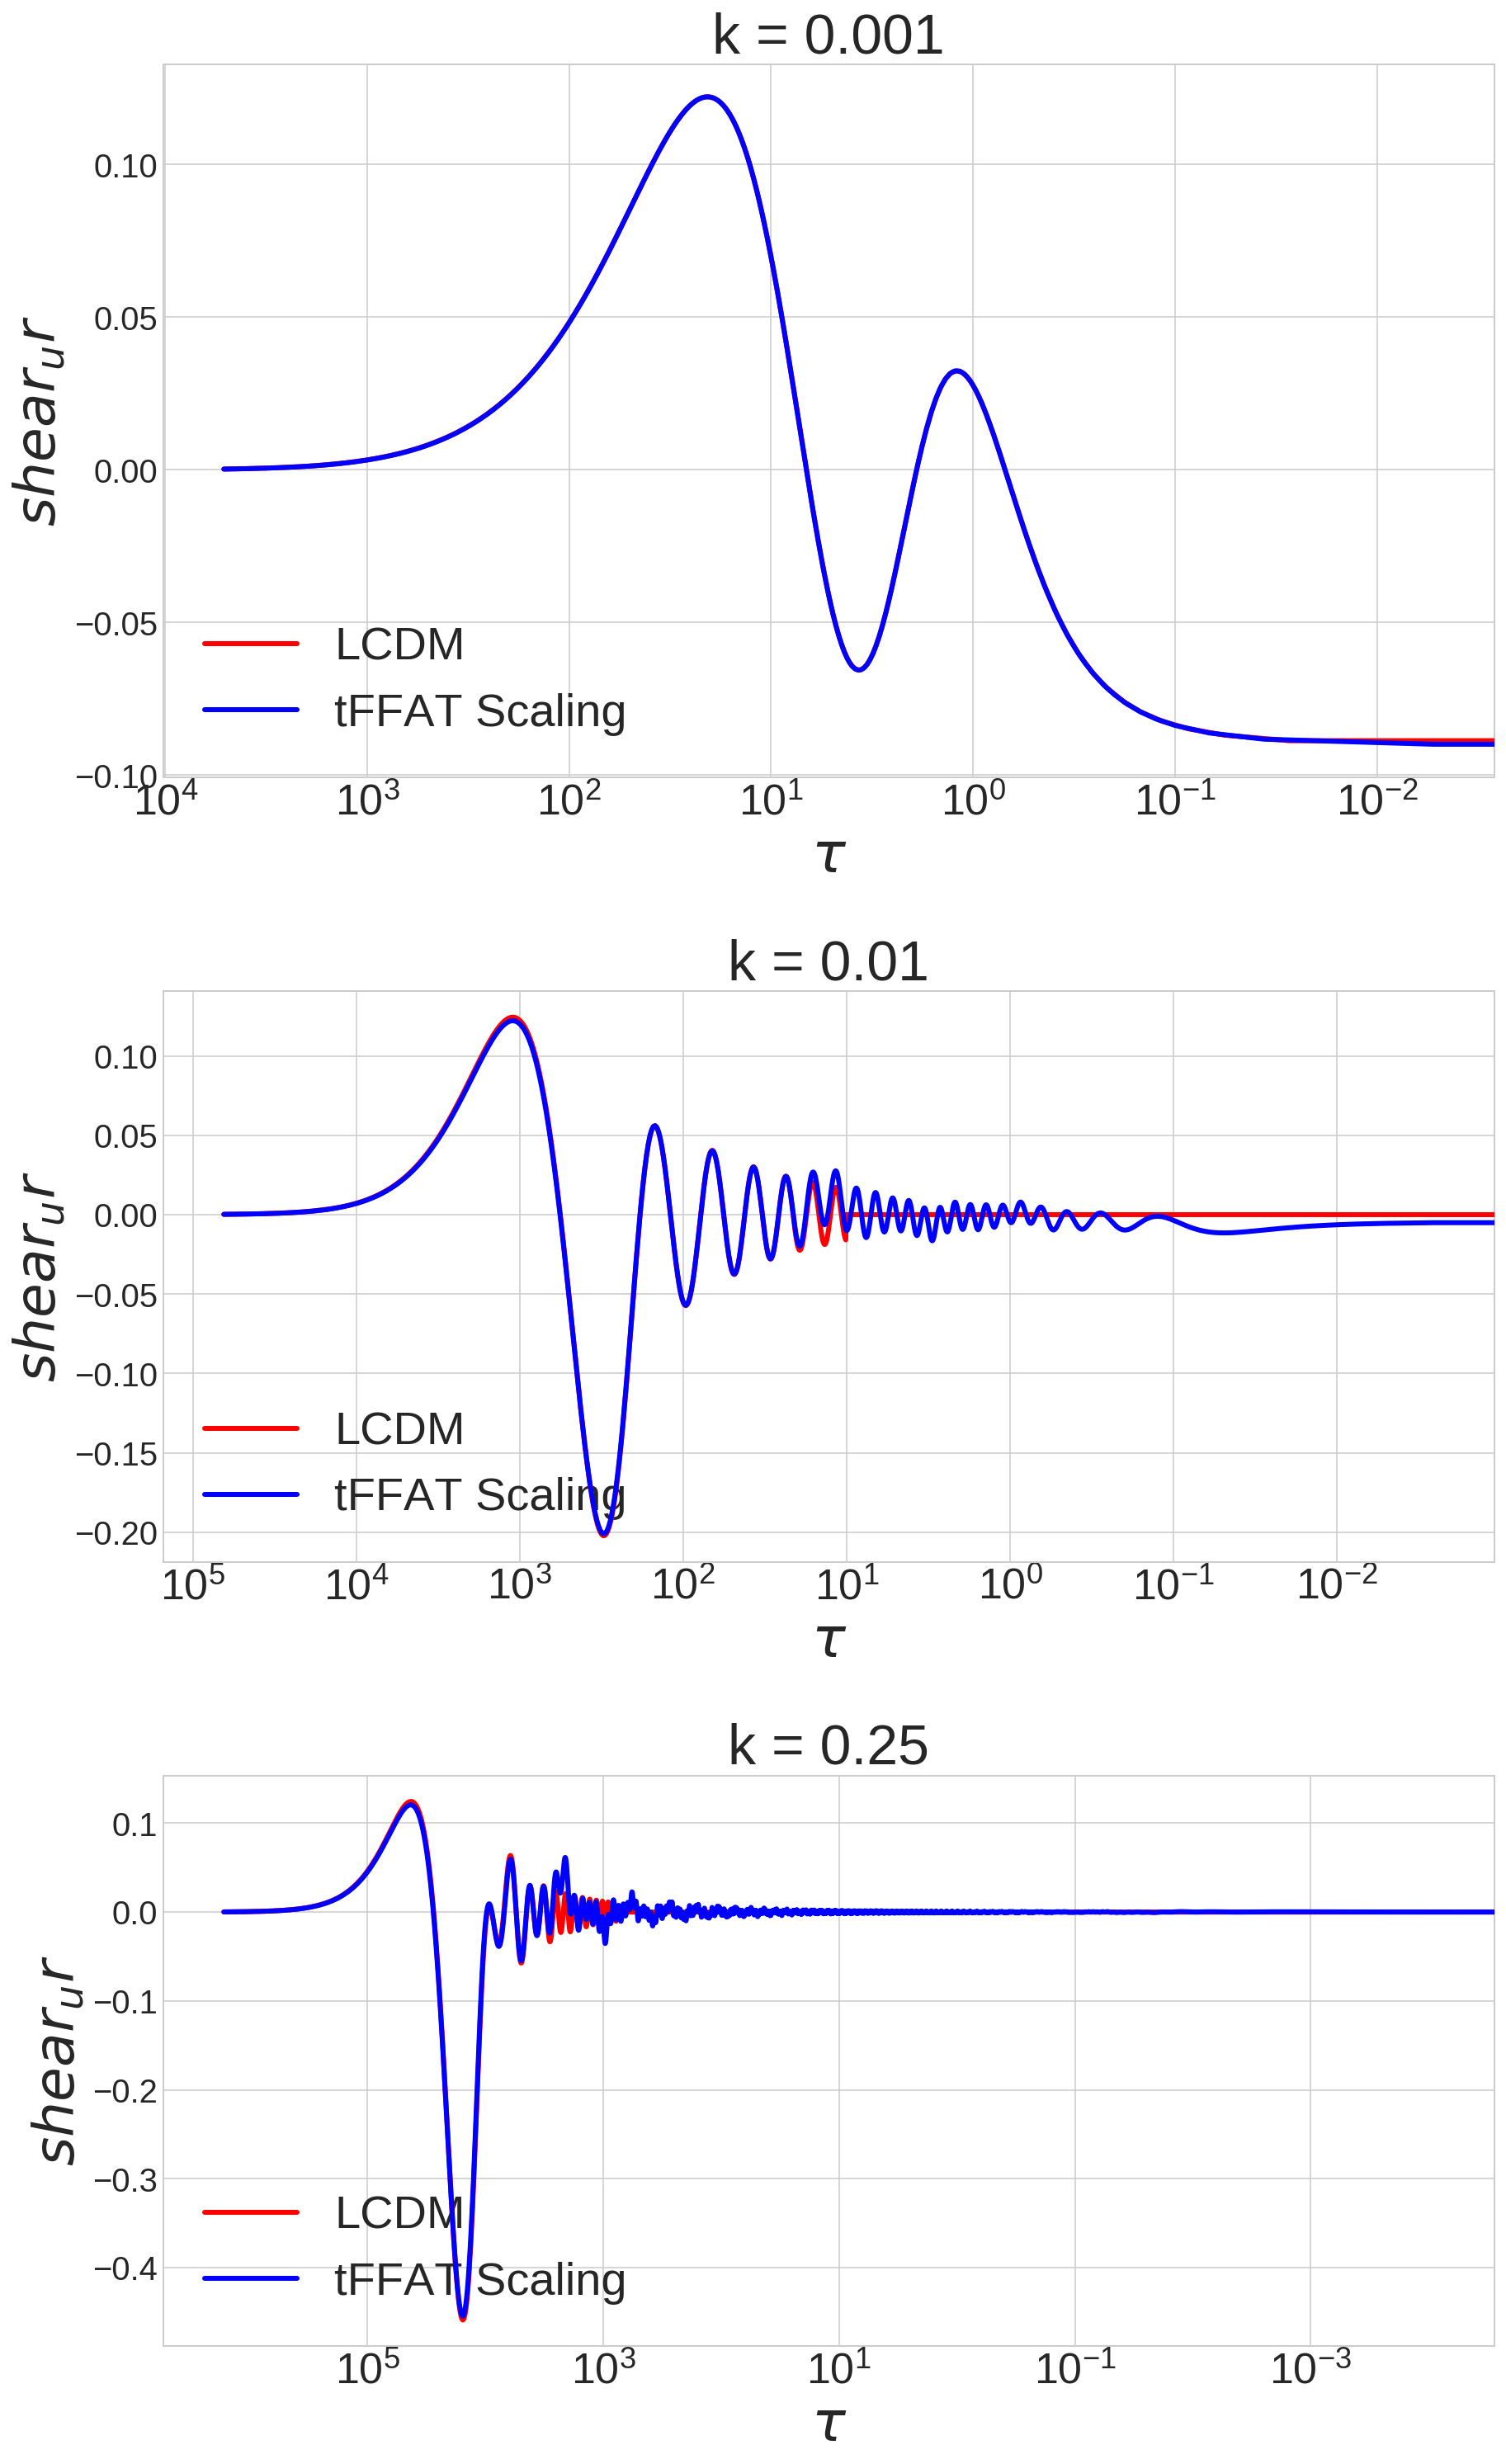

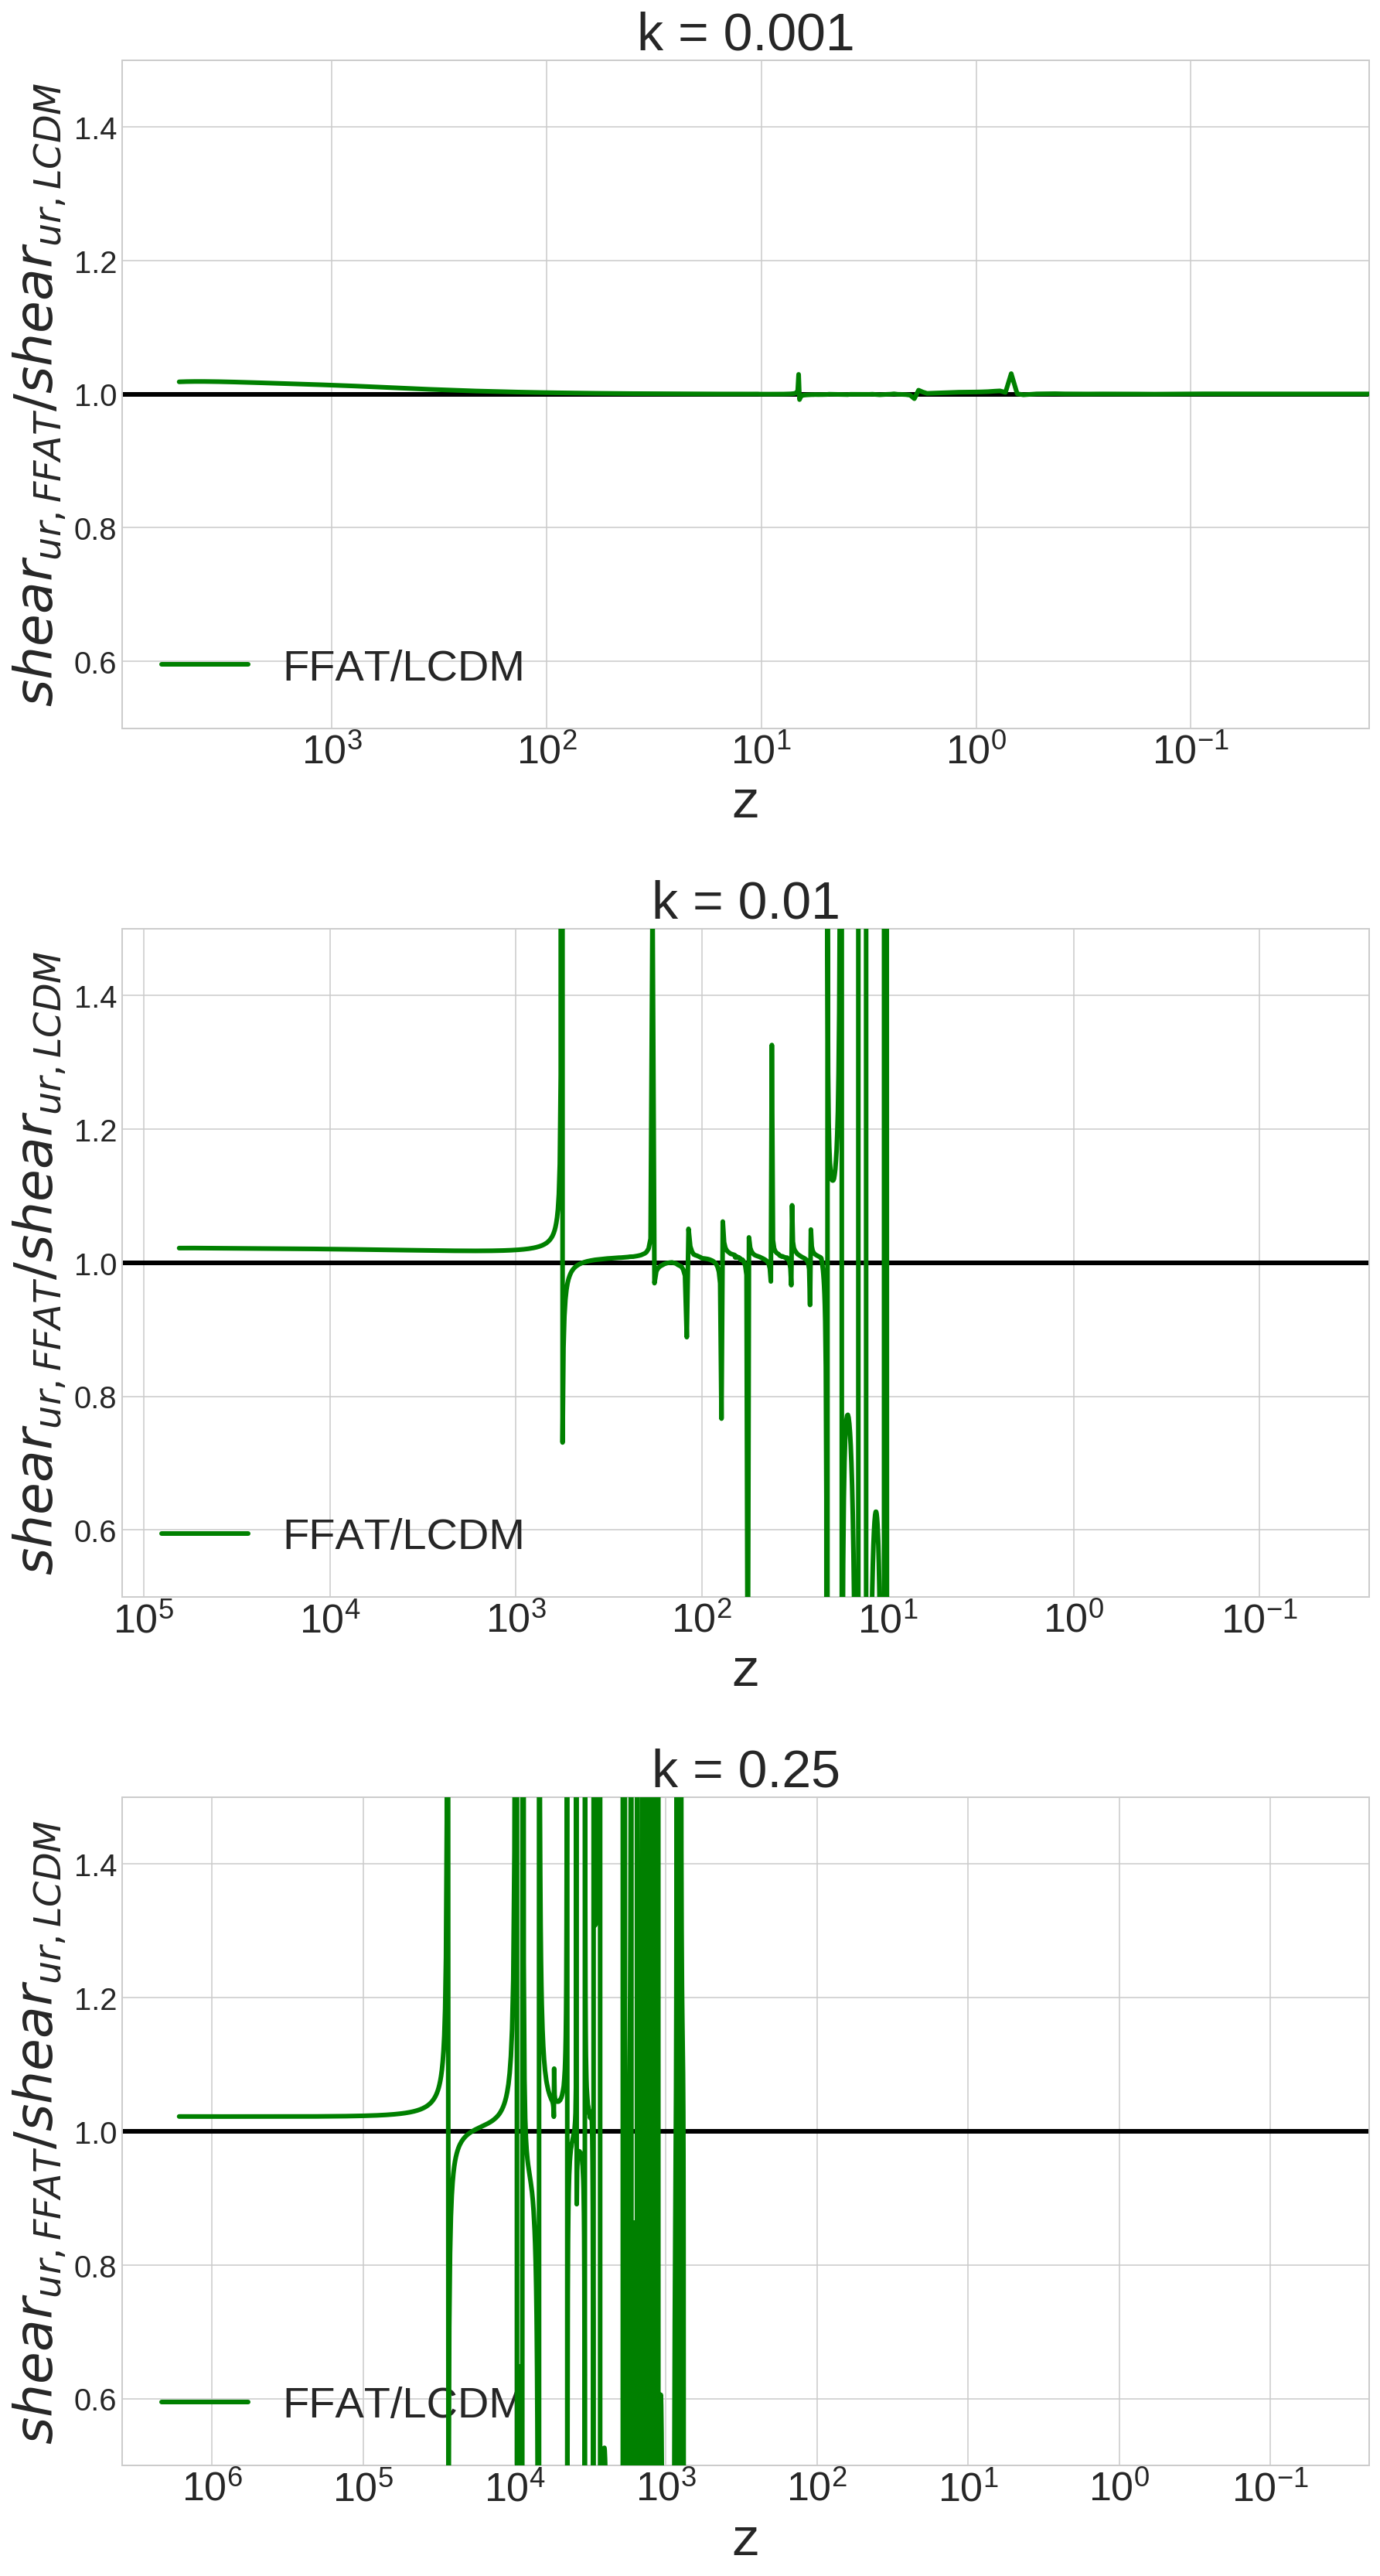

In [214]:
y1 = LCDM_shear_ur_k0
x1 = LCDM_tau_k0
y2 = FFAT_shear_ur_k0
x2 = FFAT_tau_k0

b1 = LCDM_shear_ur_k1
a1 = LCDM_tau_k1
b2 = FFAT_shear_ur_k1
a2 = FFAT_tau_k1

d1 = LCDM_shear_ur_k2
c1 = LCDM_tau_k2
d2 = FFAT_shear_ur_k2
c2 = FFAT_tau_k2

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="red",zorder=8,linewidth=3)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"$\tau$",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$shear_ur$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title("k = 0.001",fontsize = 34)
plt.xscale("log")
frame1.invert_xaxis()


frame2=fig1.add_axes((.1,-0.05,.8,.4))        
plt.plot(a1,b1,color="red",zorder=8,linewidth=3)
plt.plot(a2,b2,color="blue",zorder=9,linewidth=3)
plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"$\tau$",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$shear_ur$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.01",fontsize = 34)
frame2.invert_xaxis()
plt.xscale("log")


frame3=fig1.add_axes((.1,-0.6,.8,.4))        
plt.plot(c1,d1,color="red",zorder=8,linewidth=3)
plt.plot(c2,d2,color="blue",zorder=9,linewidth=3)
plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"$\tau$",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$shear_ur$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.25",fontsize = 34)
frame3.invert_xaxis()
plt.xscale("log")


fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('shear_ur.pdf', dpi=800,bbox_inches='tight')  
plt.show()

from scipy import interpolate
f = interpolate.interp1d(x2,y2)
y1_interp = f(x1)
f = interpolate.interp1d(a2,b2)
b1_interp = f(a1)
f = interpolate.interp1d(c2,d2)
d1_interp = f(c1)

y_ratio = y1/y1_interp
b_ratio = b1/b1_interp
d_ratio = d1/d1_interp

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y_ratio,color="green",zorder=8,linewidth=3)
#plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$shear_{ur,FFAT}/shear_{ur,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title("k = 0.001",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.5,1.5)
frame1.invert_xaxis()
plt.xscale("log")

frame2=fig1.add_axes((.1,-0.15,.8,.5))        
plt.plot(a1,b_ratio,color="green",zorder=8,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$shear_{ur,FFAT}/shear_{ur,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.01",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.5,1.5)
frame2.invert_xaxis()
plt.xscale("log")


frame3=fig1.add_axes((.1,-0.8,.8,.5))        
plt.plot(c1,d_ratio,color="green",zorder=8,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$shear_{ur,FFAT}/shear_{ur,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.25",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.5,1.5)
frame3.invert_xaxis()
plt.xscale("log")


fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('shear_ur_ratio.pdf', dpi=800,bbox_inches='tight')  
plt.show()

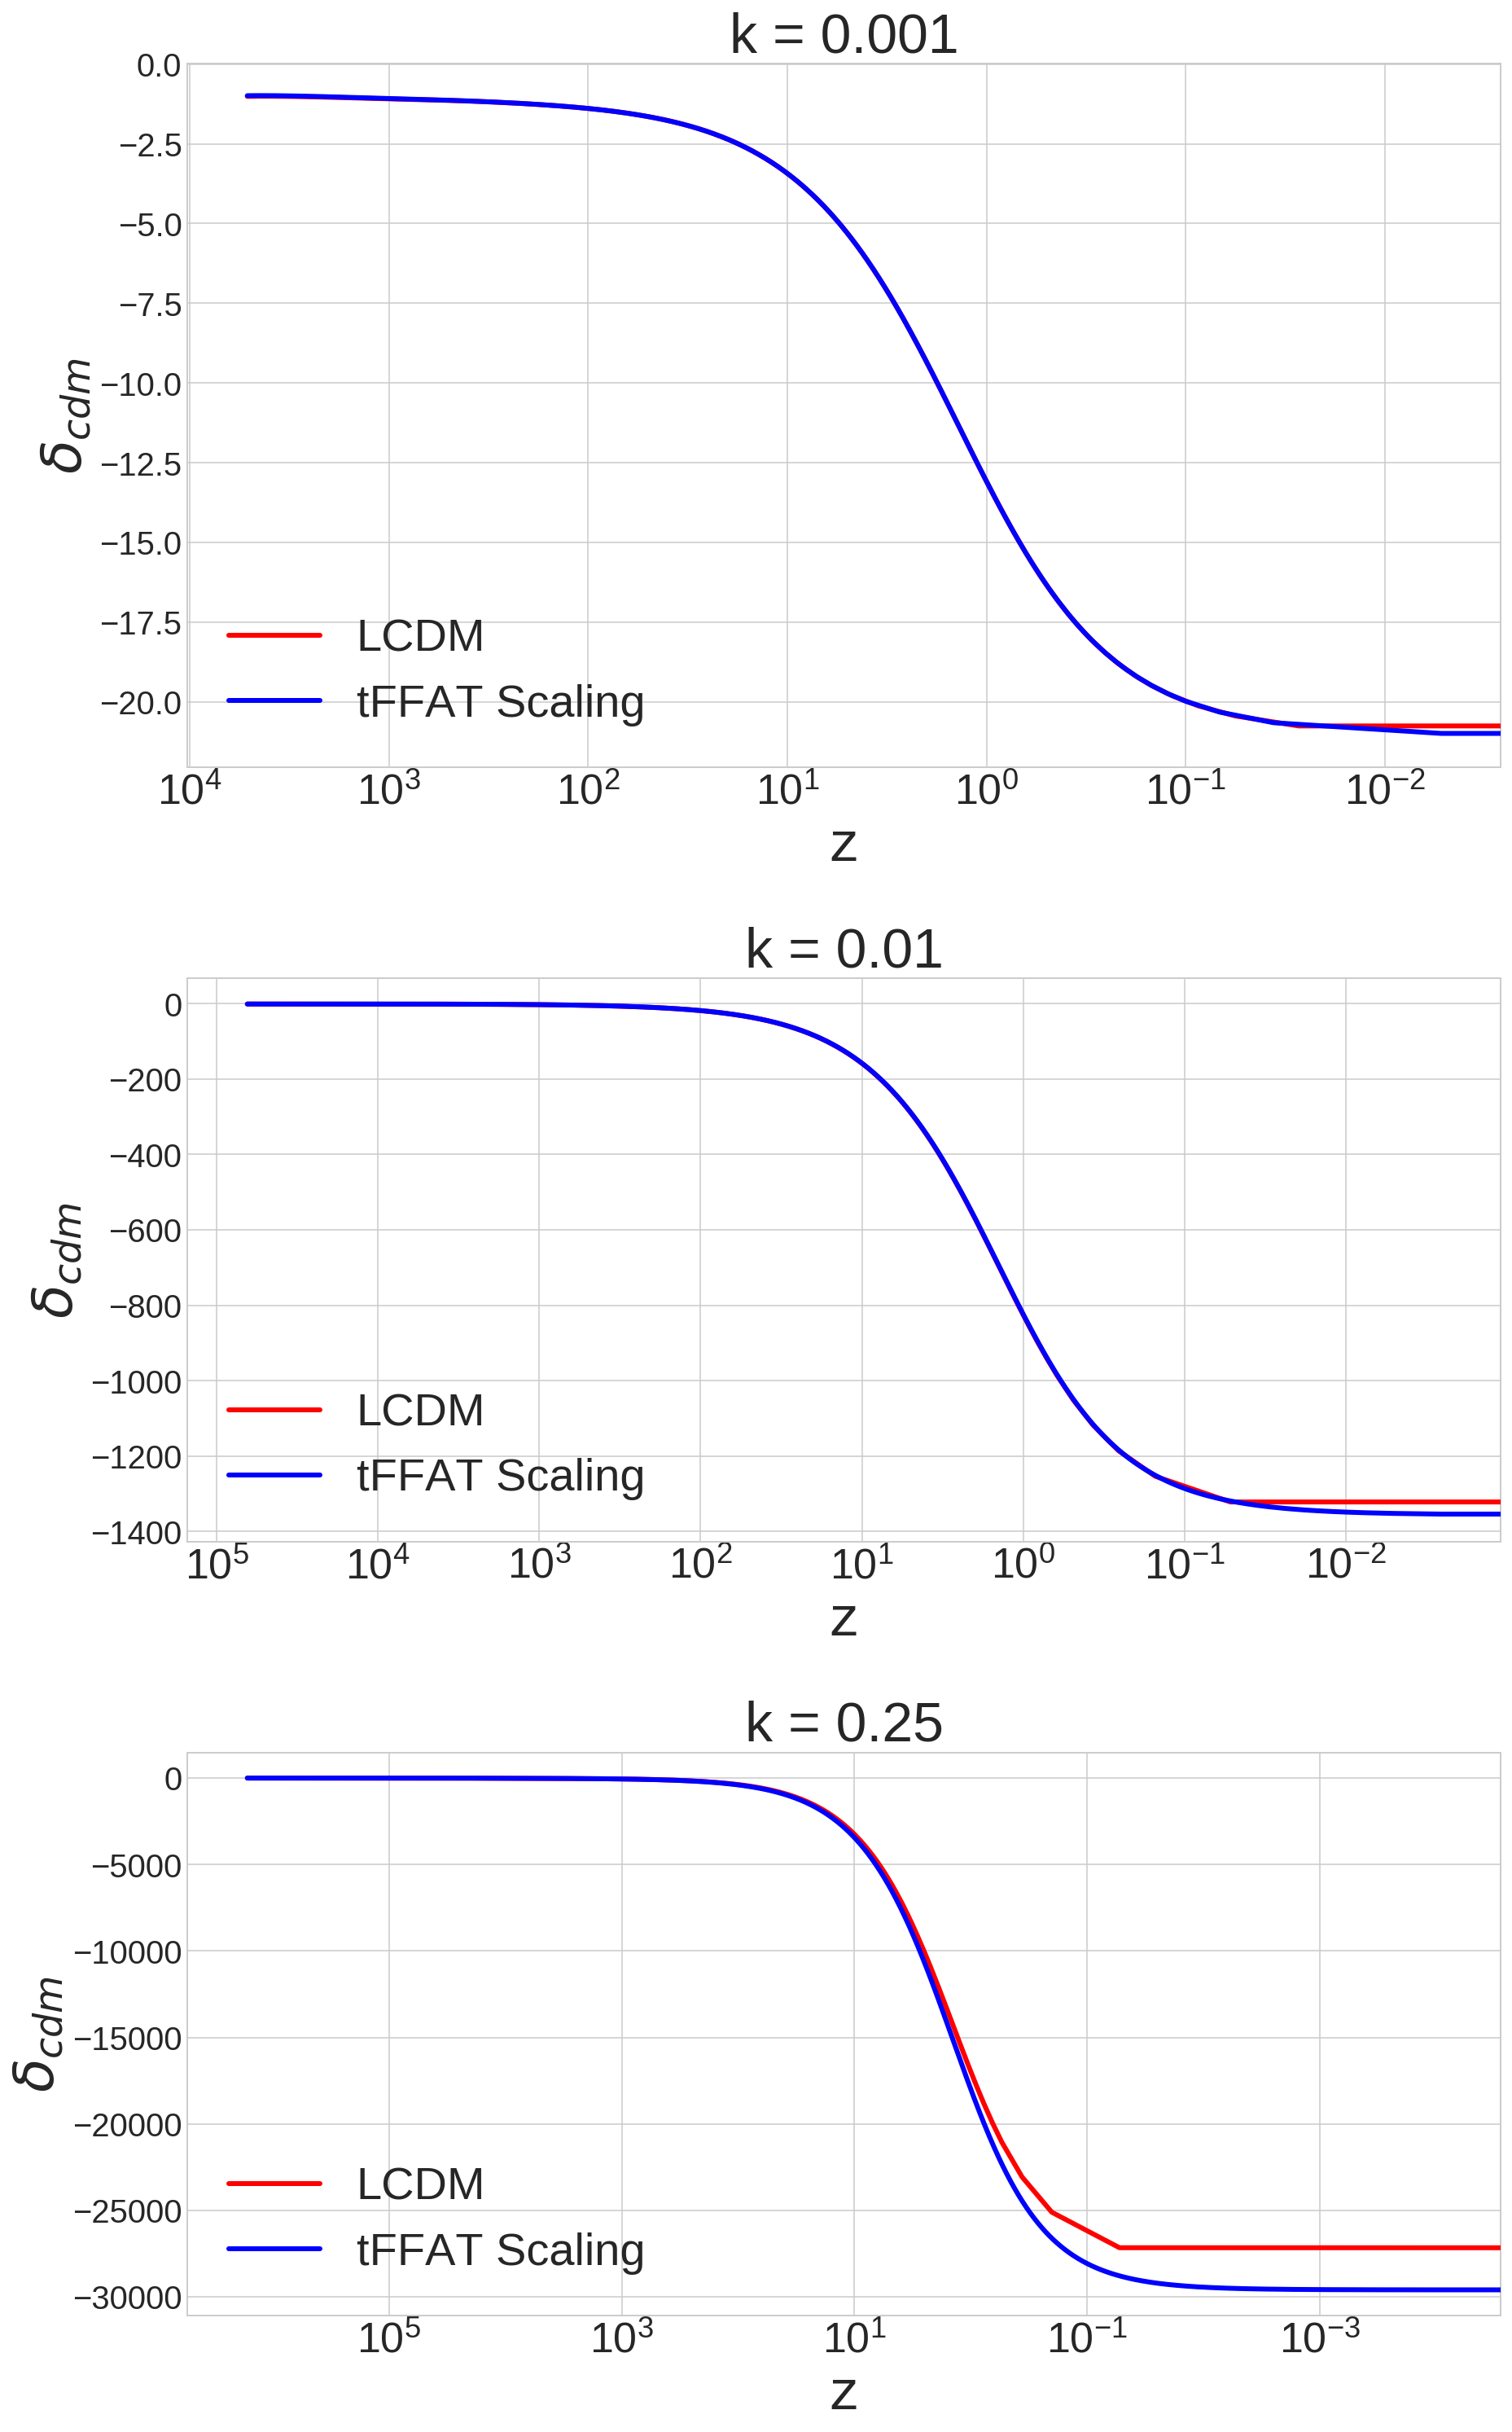

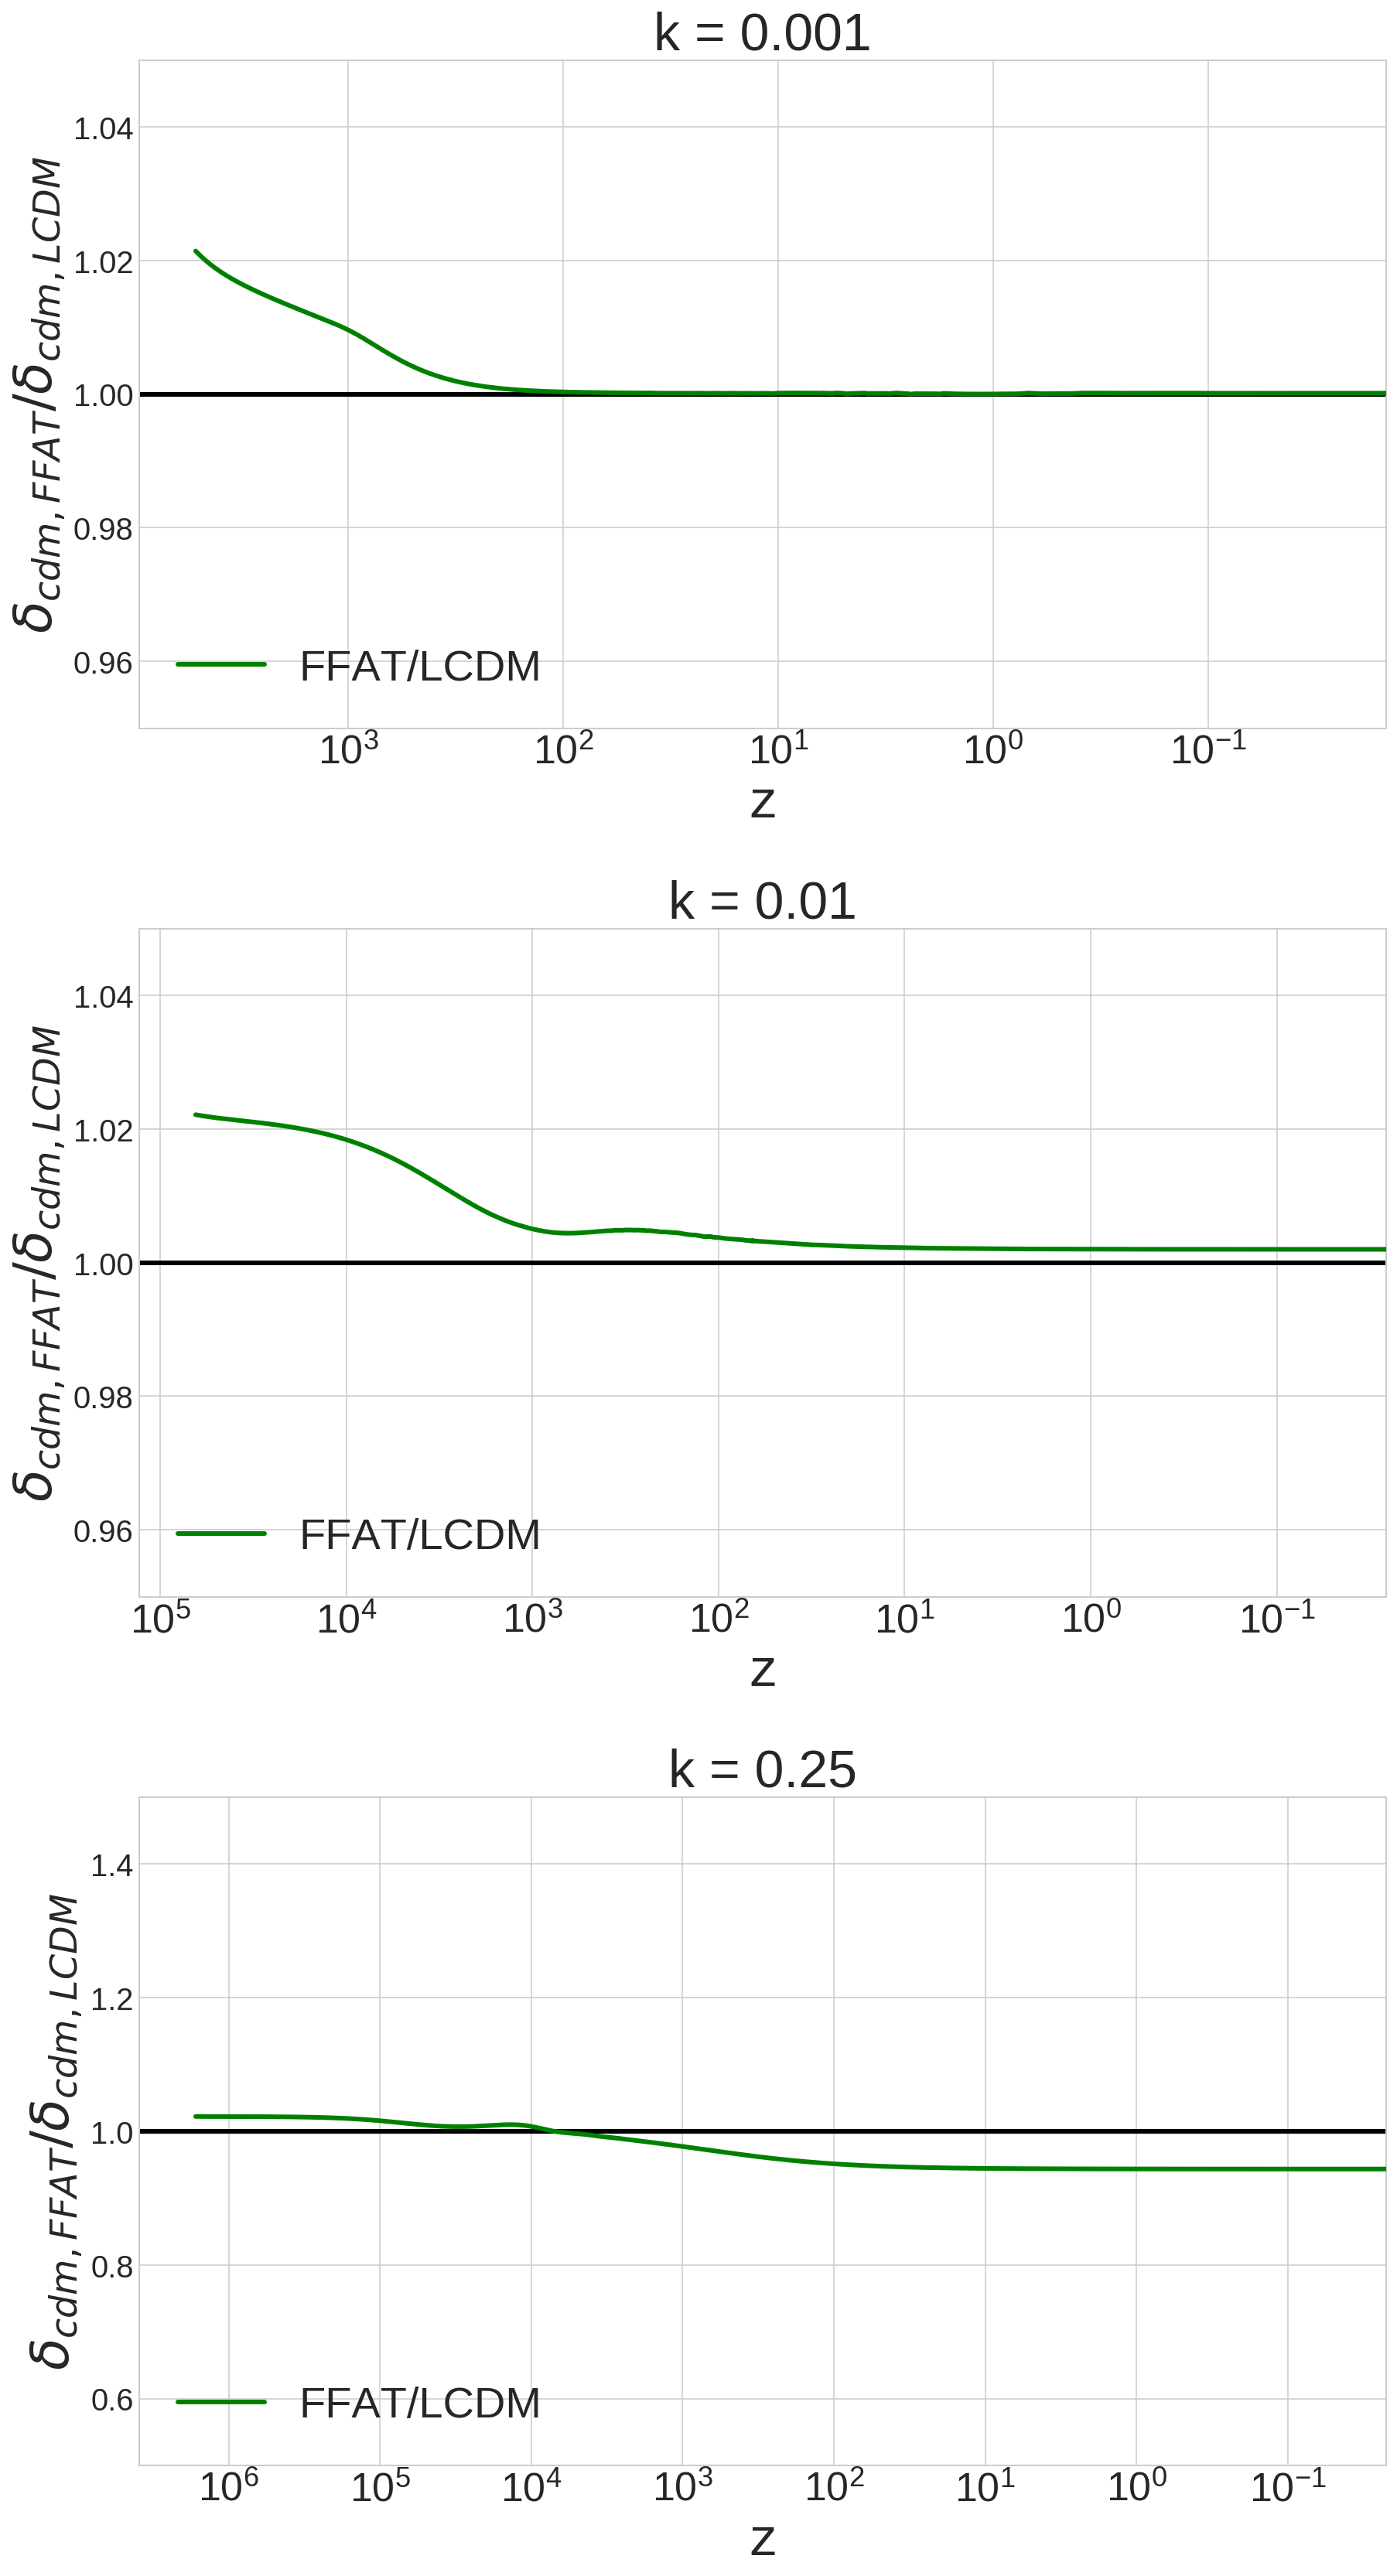

In [215]:
y1 = LCDM_delta_cdm_k0
x1 = LCDM_tau_k0
y2 = FFAT_delta_cdm_k0
x2 = FFAT_tau_k0

b1 = LCDM_delta_cdm_k1
a1 = LCDM_tau_k1
b2 = FFAT_delta_cdm_k1
a2 = FFAT_tau_k1

d1 = LCDM_delta_cdm_k2
c1 = LCDM_tau_k2
d2 = FFAT_delta_cdm_k2
c2 = FFAT_tau_k2

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="red",zorder=8,linewidth=3)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\delta_{cdm}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title("k = 0.001",fontsize = 34)
#plt.xlim(0.01,)
frame1.invert_xaxis()
plt.xscale("log")

frame2=fig1.add_axes((.1,-0.05,.8,.4))        
plt.plot(a1,b1,color="red",zorder=8,linewidth=3)
plt.plot(a2,b2,color="blue",zorder=9,linewidth=3)
plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\delta_{cdm}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.01",fontsize = 34)
#plt.xlim(0.01,)
frame2.invert_xaxis()
plt.xscale("log")


frame3=fig1.add_axes((.1,-0.6,.8,.4))        
plt.plot(c1,d1,color="red",zorder=8,linewidth=3)
plt.plot(c2,d2,color="blue",zorder=9,linewidth=3)
plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\delta_{cdm}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.25",fontsize = 34)
#plt.xlim(0.01,)
frame3.invert_xaxis()
plt.xscale("log")


fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('delta_cdm.pdf', dpi=800,bbox_inches='tight')  
plt.show()

from scipy import interpolate
f = interpolate.interp1d(x2,y2)
y1_interp = f(x1)
f = interpolate.interp1d(a2,b2)
b1_interp = f(a1)
f = interpolate.interp1d(c2,d2)
d1_interp = f(c1)

y_ratio = y1/y1_interp
b_ratio = b1/b1_interp
d_ratio = d1/d1_interp

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y_ratio,color="green",zorder=8,linewidth=3)
#plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\delta_{cdm,FFAT}/\delta_{cdm,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title("k = 0.001",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.95,1.05)
frame1.invert_xaxis()
plt.xscale("log")

frame2=fig1.add_axes((.1,-0.15,.8,.5))        
plt.plot(a1,b_ratio,color="green",zorder=8,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\delta_{cdm,FFAT}/\delta_{cdm,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.01",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.95,1.05)
frame2.invert_xaxis()
plt.xscale("log")


frame3=fig1.add_axes((.1,-0.8,.8,.5))        
plt.plot(c1,d_ratio,color="green",zorder=8,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\delta_{cdm,FFAT}/\delta_{cdm,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.25",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.5,1.5)
frame3.invert_xaxis()
plt.xscale("log")


fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('delta_cdm_ratio.pdf', dpi=800,bbox_inches='tight')  
plt.show()

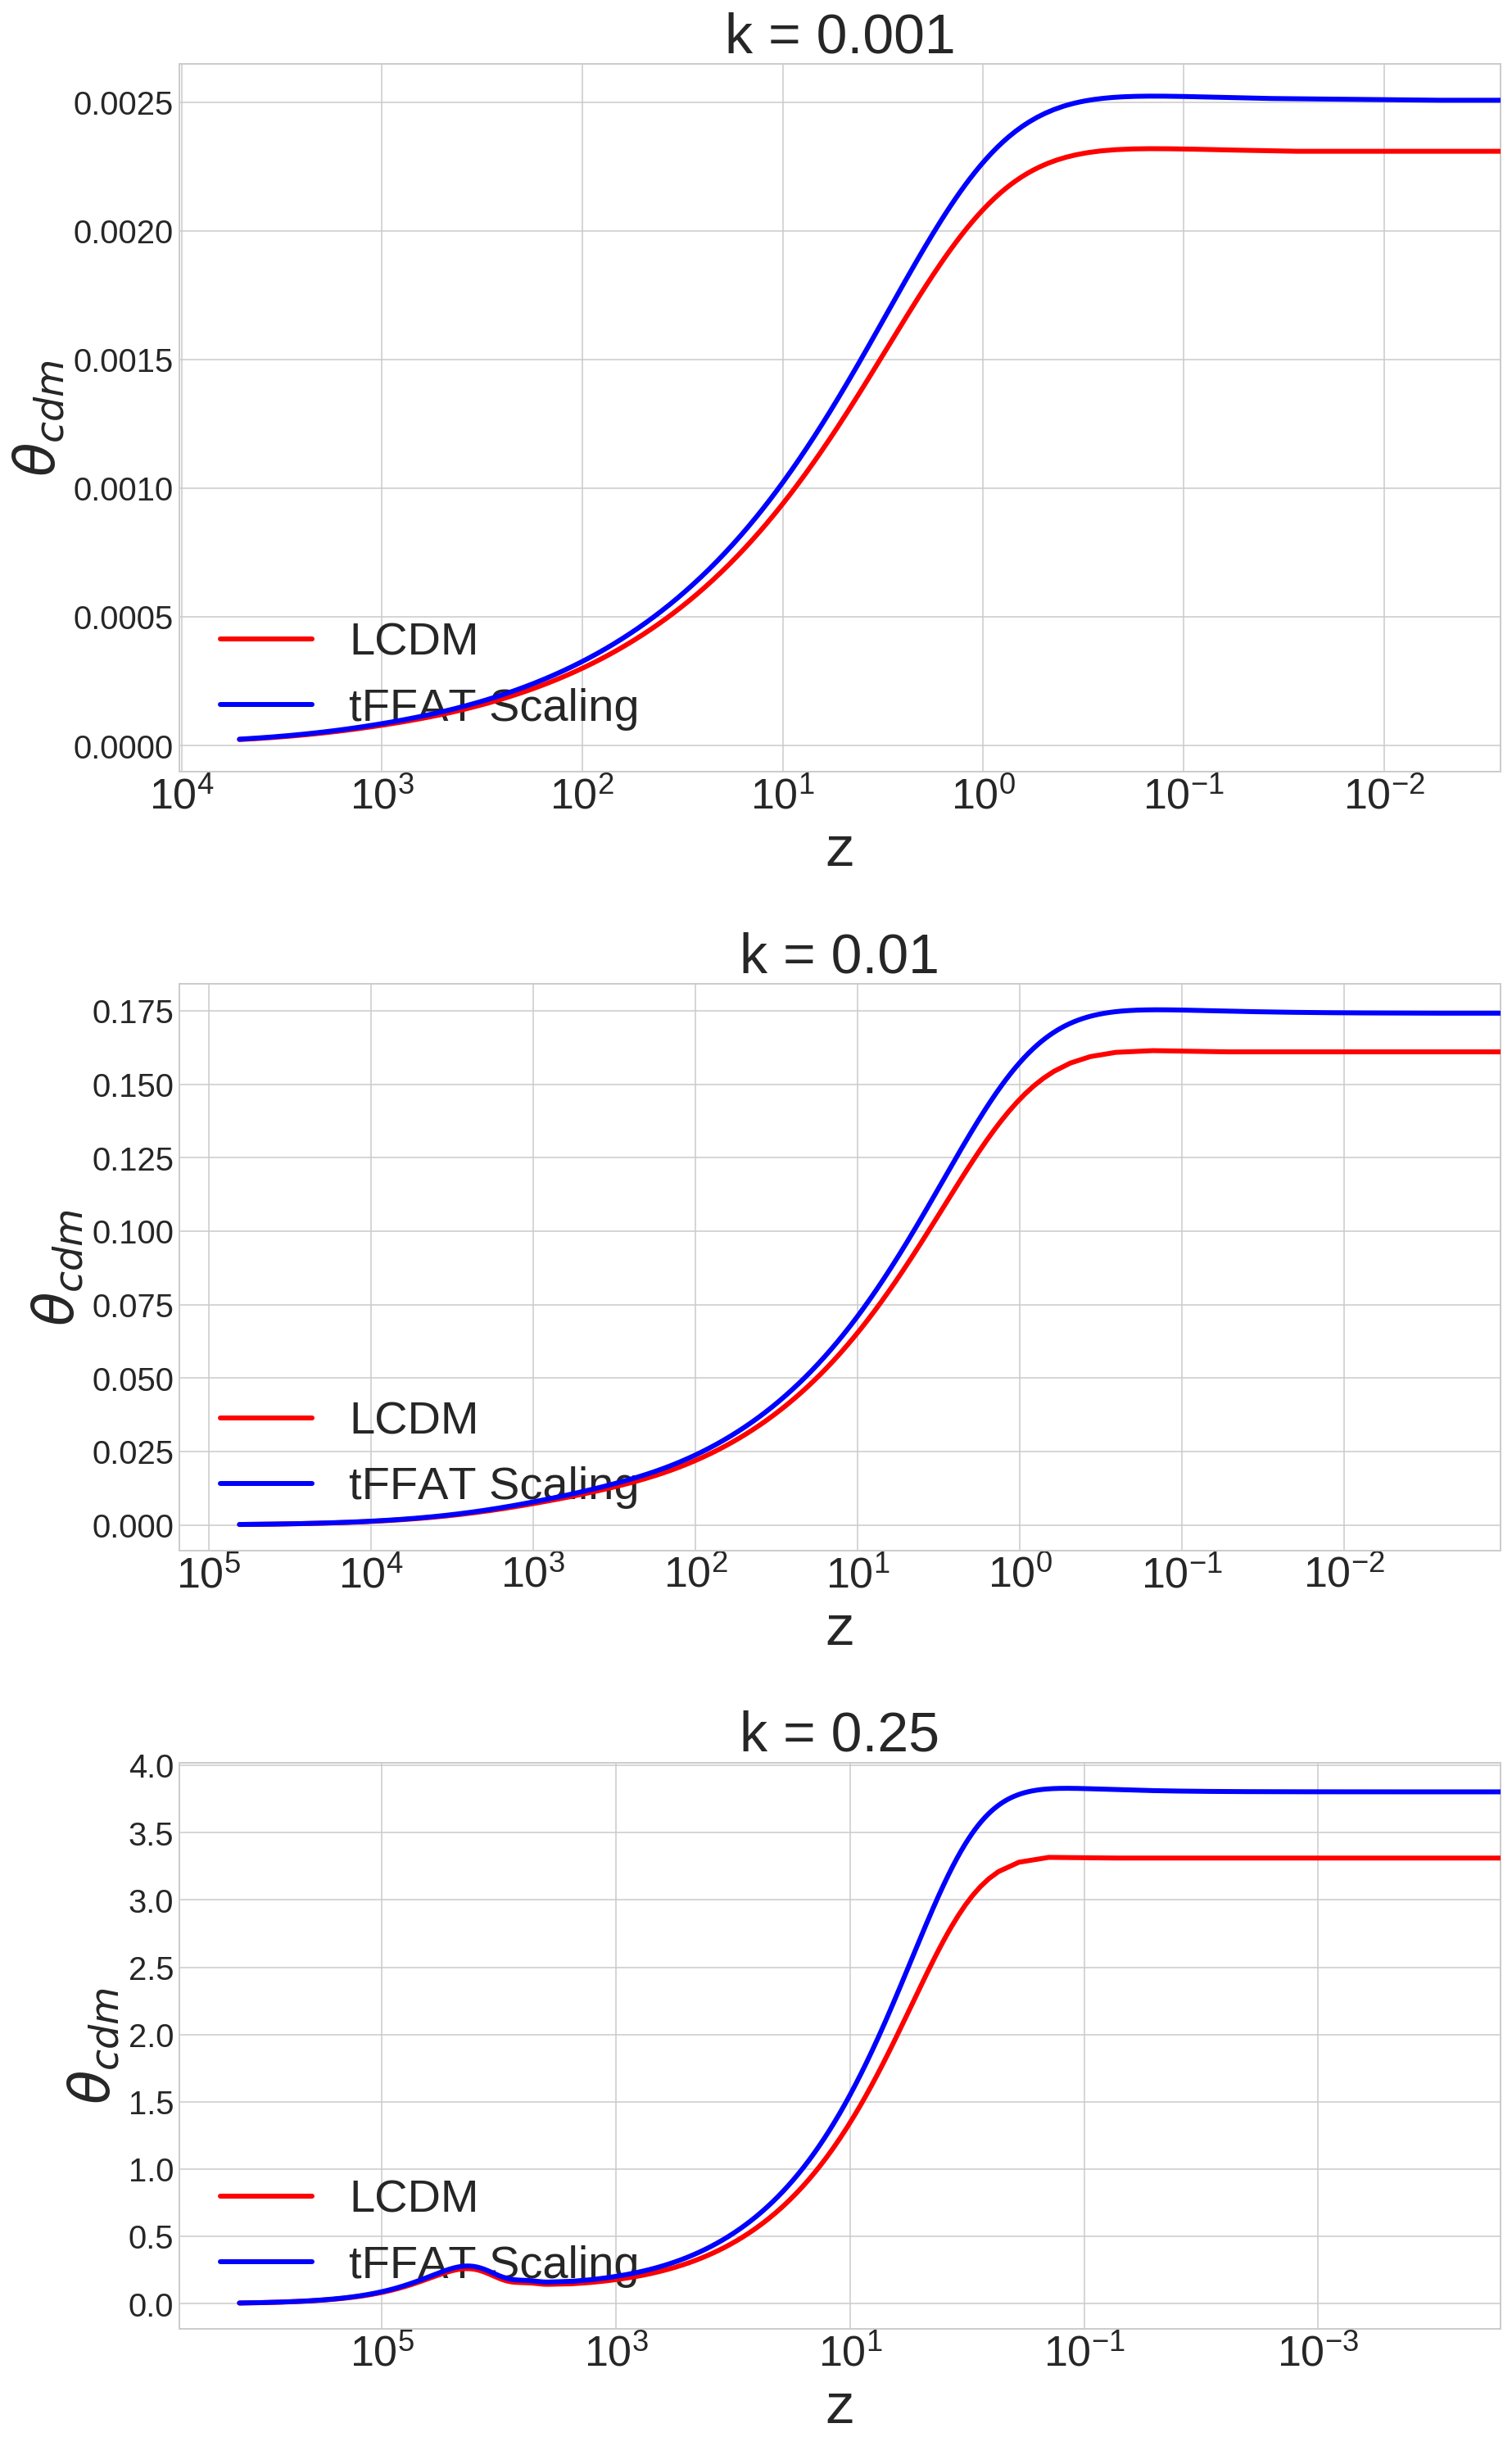

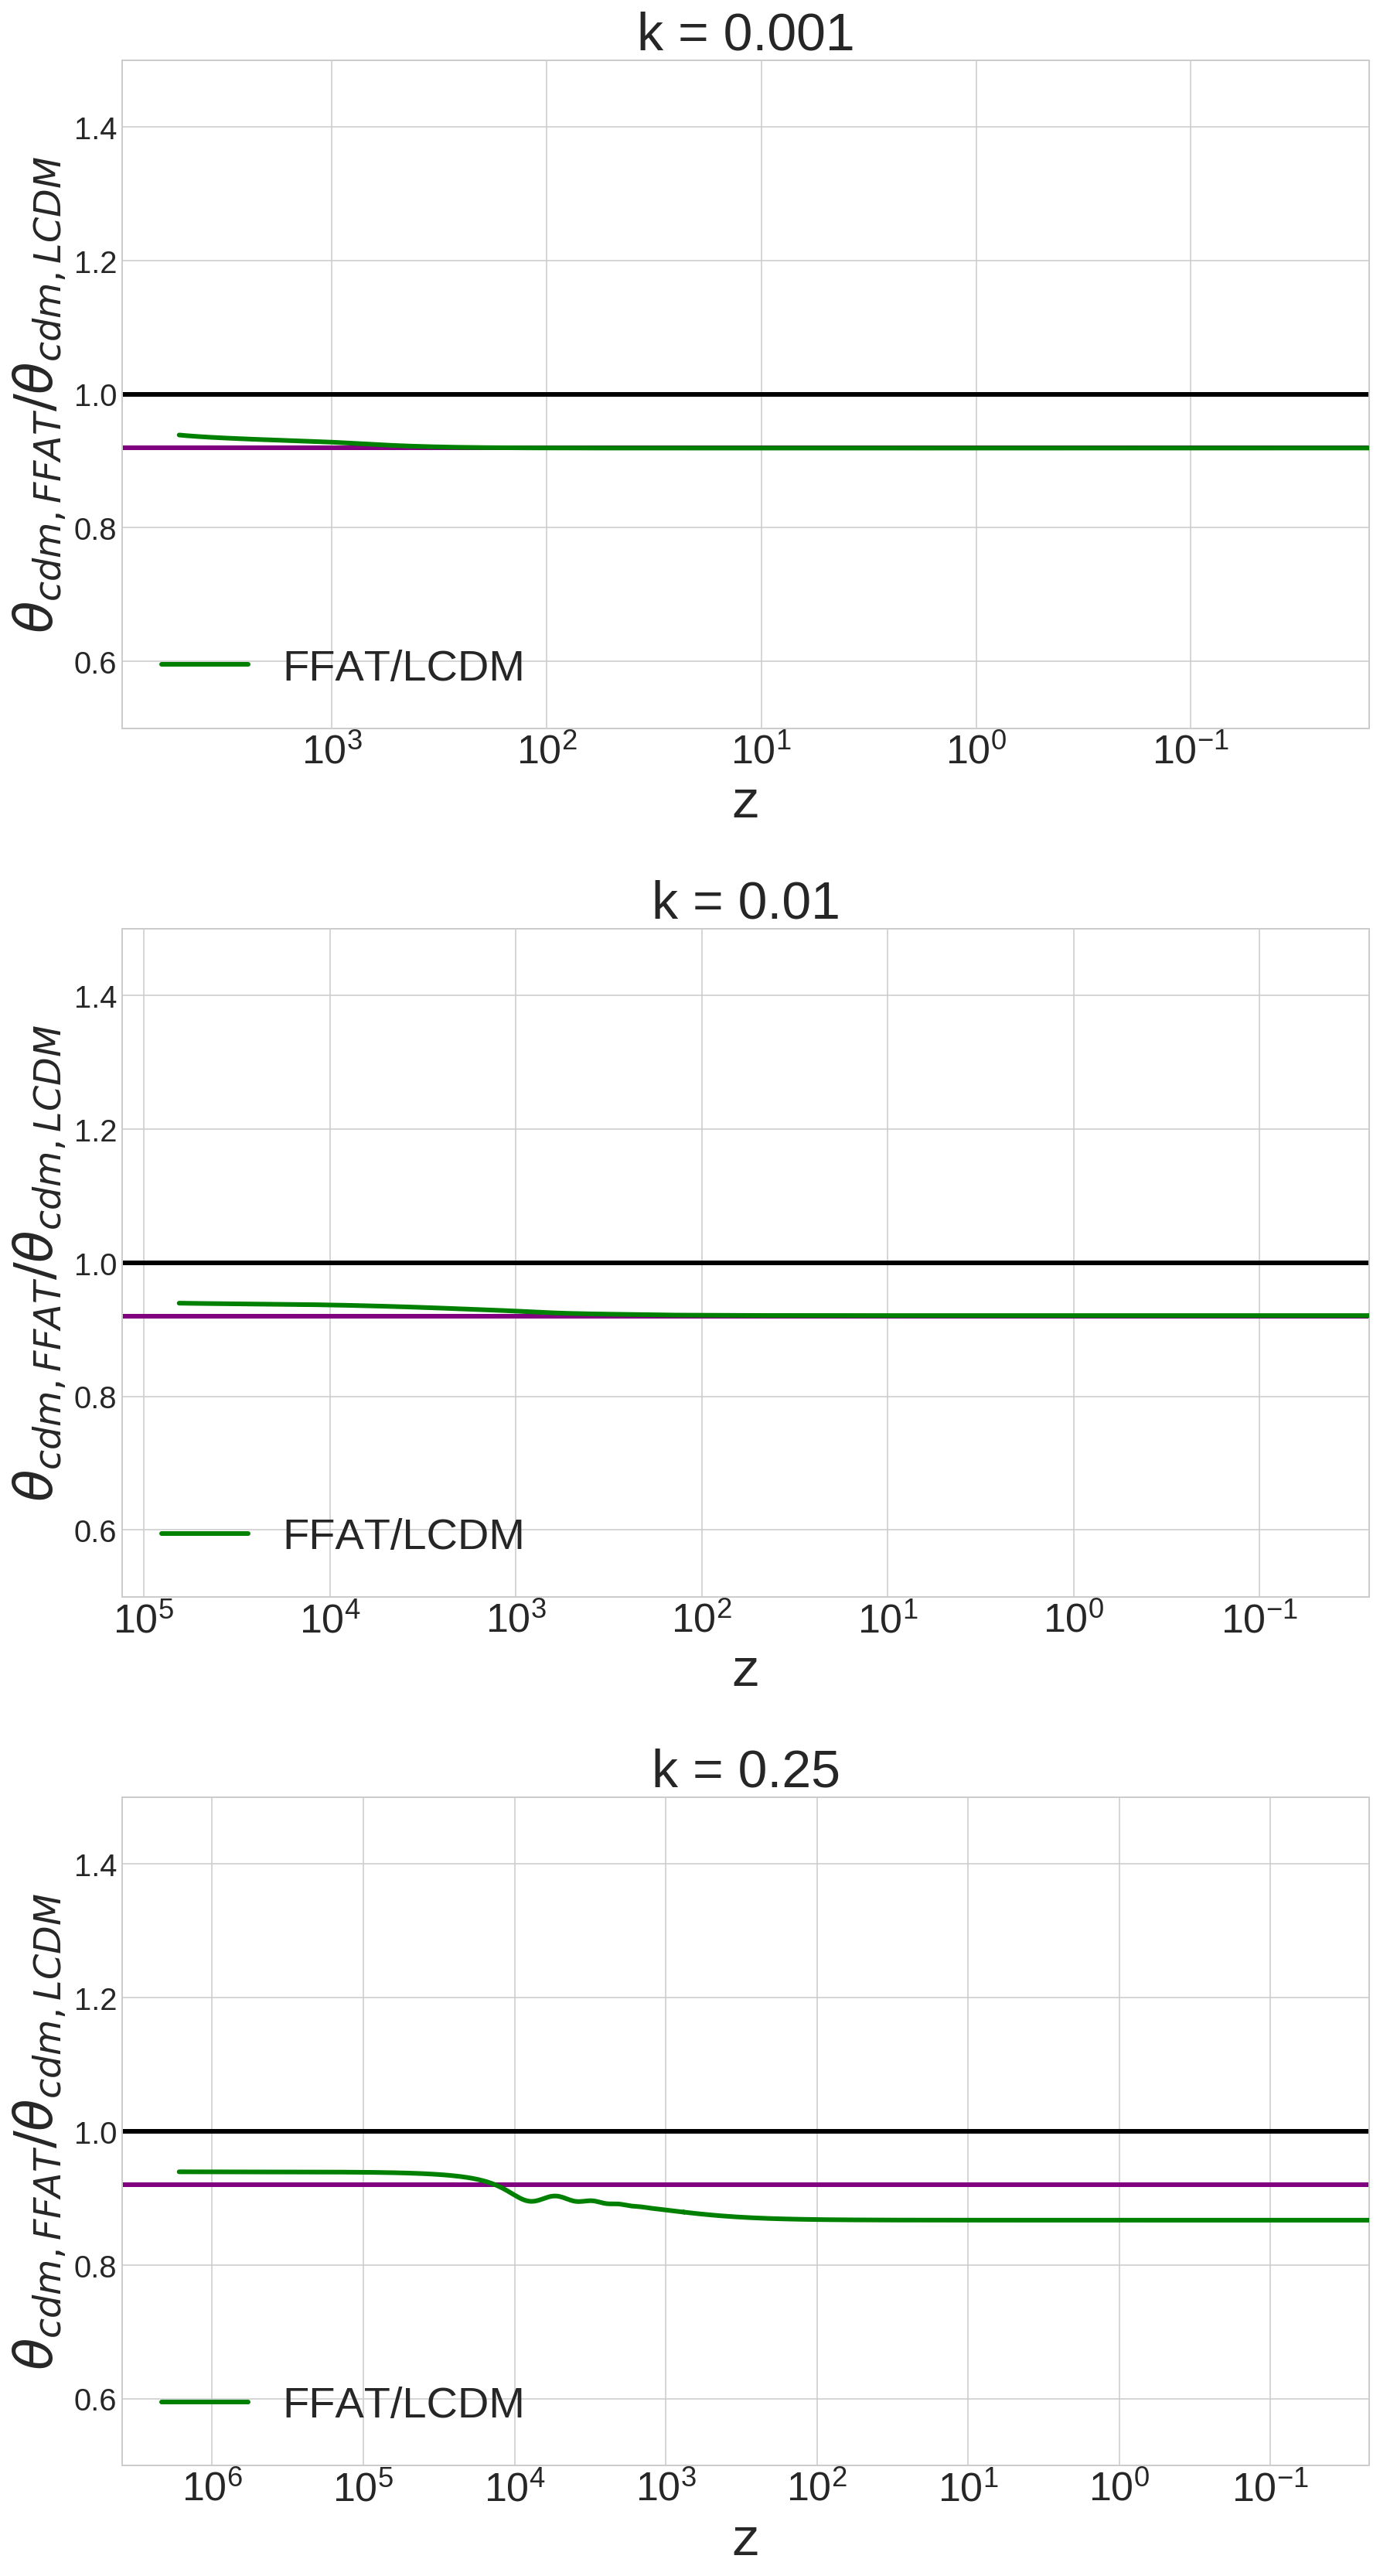

In [216]:
y1 = LCDM_theta_cdm_k0
x1 = LCDM_tau_k0
y2 = FFAT_theta_cdm_k0
x2 = FFAT_tau_k0

b1 = LCDM_theta_cdm_k1
a1 = LCDM_tau_k1
b2 = FFAT_theta_cdm_k1
a2 = FFAT_tau_k1

d1 = LCDM_theta_cdm_k2
c1 = LCDM_tau_k2
d2 = FFAT_theta_cdm_k2
c2 = FFAT_tau_k2

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="red",zorder=8,linewidth=3)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\theta_{cdm}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title("k = 0.001",fontsize = 34)
#plt.xlim(0.01,)
frame1.invert_xaxis()
plt.xscale("log")

frame2=fig1.add_axes((.1,-0.05,.8,.4))        
plt.plot(a1,b1,color="red",zorder=8,linewidth=3)
plt.plot(a2,b2,color="blue",zorder=9,linewidth=3)
plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\theta_{cdm}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.01",fontsize = 34)
#plt.xlim(0.01,)
frame2.invert_xaxis()
plt.xscale("log")


frame3=fig1.add_axes((.1,-0.6,.8,.4))        
plt.plot(c1,d1,color="red",zorder=8,linewidth=3)
plt.plot(c2,d2,color="blue",zorder=9,linewidth=3)
plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\theta_{cdm}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.25",fontsize = 34)
#plt.xlim(0.01,)
frame3.invert_xaxis()
plt.xscale("log")


fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('theta_cdm.pdf', dpi=800,bbox_inches='tight')  
plt.show()

from scipy import interpolate
f = interpolate.interp1d(x2,y2)
y1_interp = f(x1)
f = interpolate.interp1d(a2,b2)
b1_interp = f(a1)
f = interpolate.interp1d(c2,d2)
d1_interp = f(c1)

y_ratio = y1/y1_interp
b_ratio = b1/b1_interp
d_ratio = d1/d1_interp

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y_ratio,color="green",zorder=8,linewidth=3)
#plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\theta_{cdm,FFAT}/\theta_{cdm,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title("k = 0.001",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
plt.axhline(0.91950886766 ,color='purple',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.5,1.5)
frame1.invert_xaxis()
plt.xscale("log")

frame2=fig1.add_axes((.1,-0.15,.8,.5))        
plt.plot(a1,b_ratio,color="green",zorder=8,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\theta_{cdm,FFAT}/\theta_{cdm,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.01",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
plt.axhline(0.91950886766 ,color='purple',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.5,1.5)
frame2.invert_xaxis()
plt.xscale("log")


frame3=fig1.add_axes((.1,-0.8,.8,.5))        
plt.plot(c1,d_ratio,color="green",zorder=8,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\theta_{cdm,FFAT}/\theta_{cdm,LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.25",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
plt.axhline(0.91950886766 ,color='purple',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.5,1.5)
frame3.invert_xaxis()
plt.xscale("log")


fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('theta_cdm_ratio.pdf', dpi=800,bbox_inches='tight')  
plt.show()

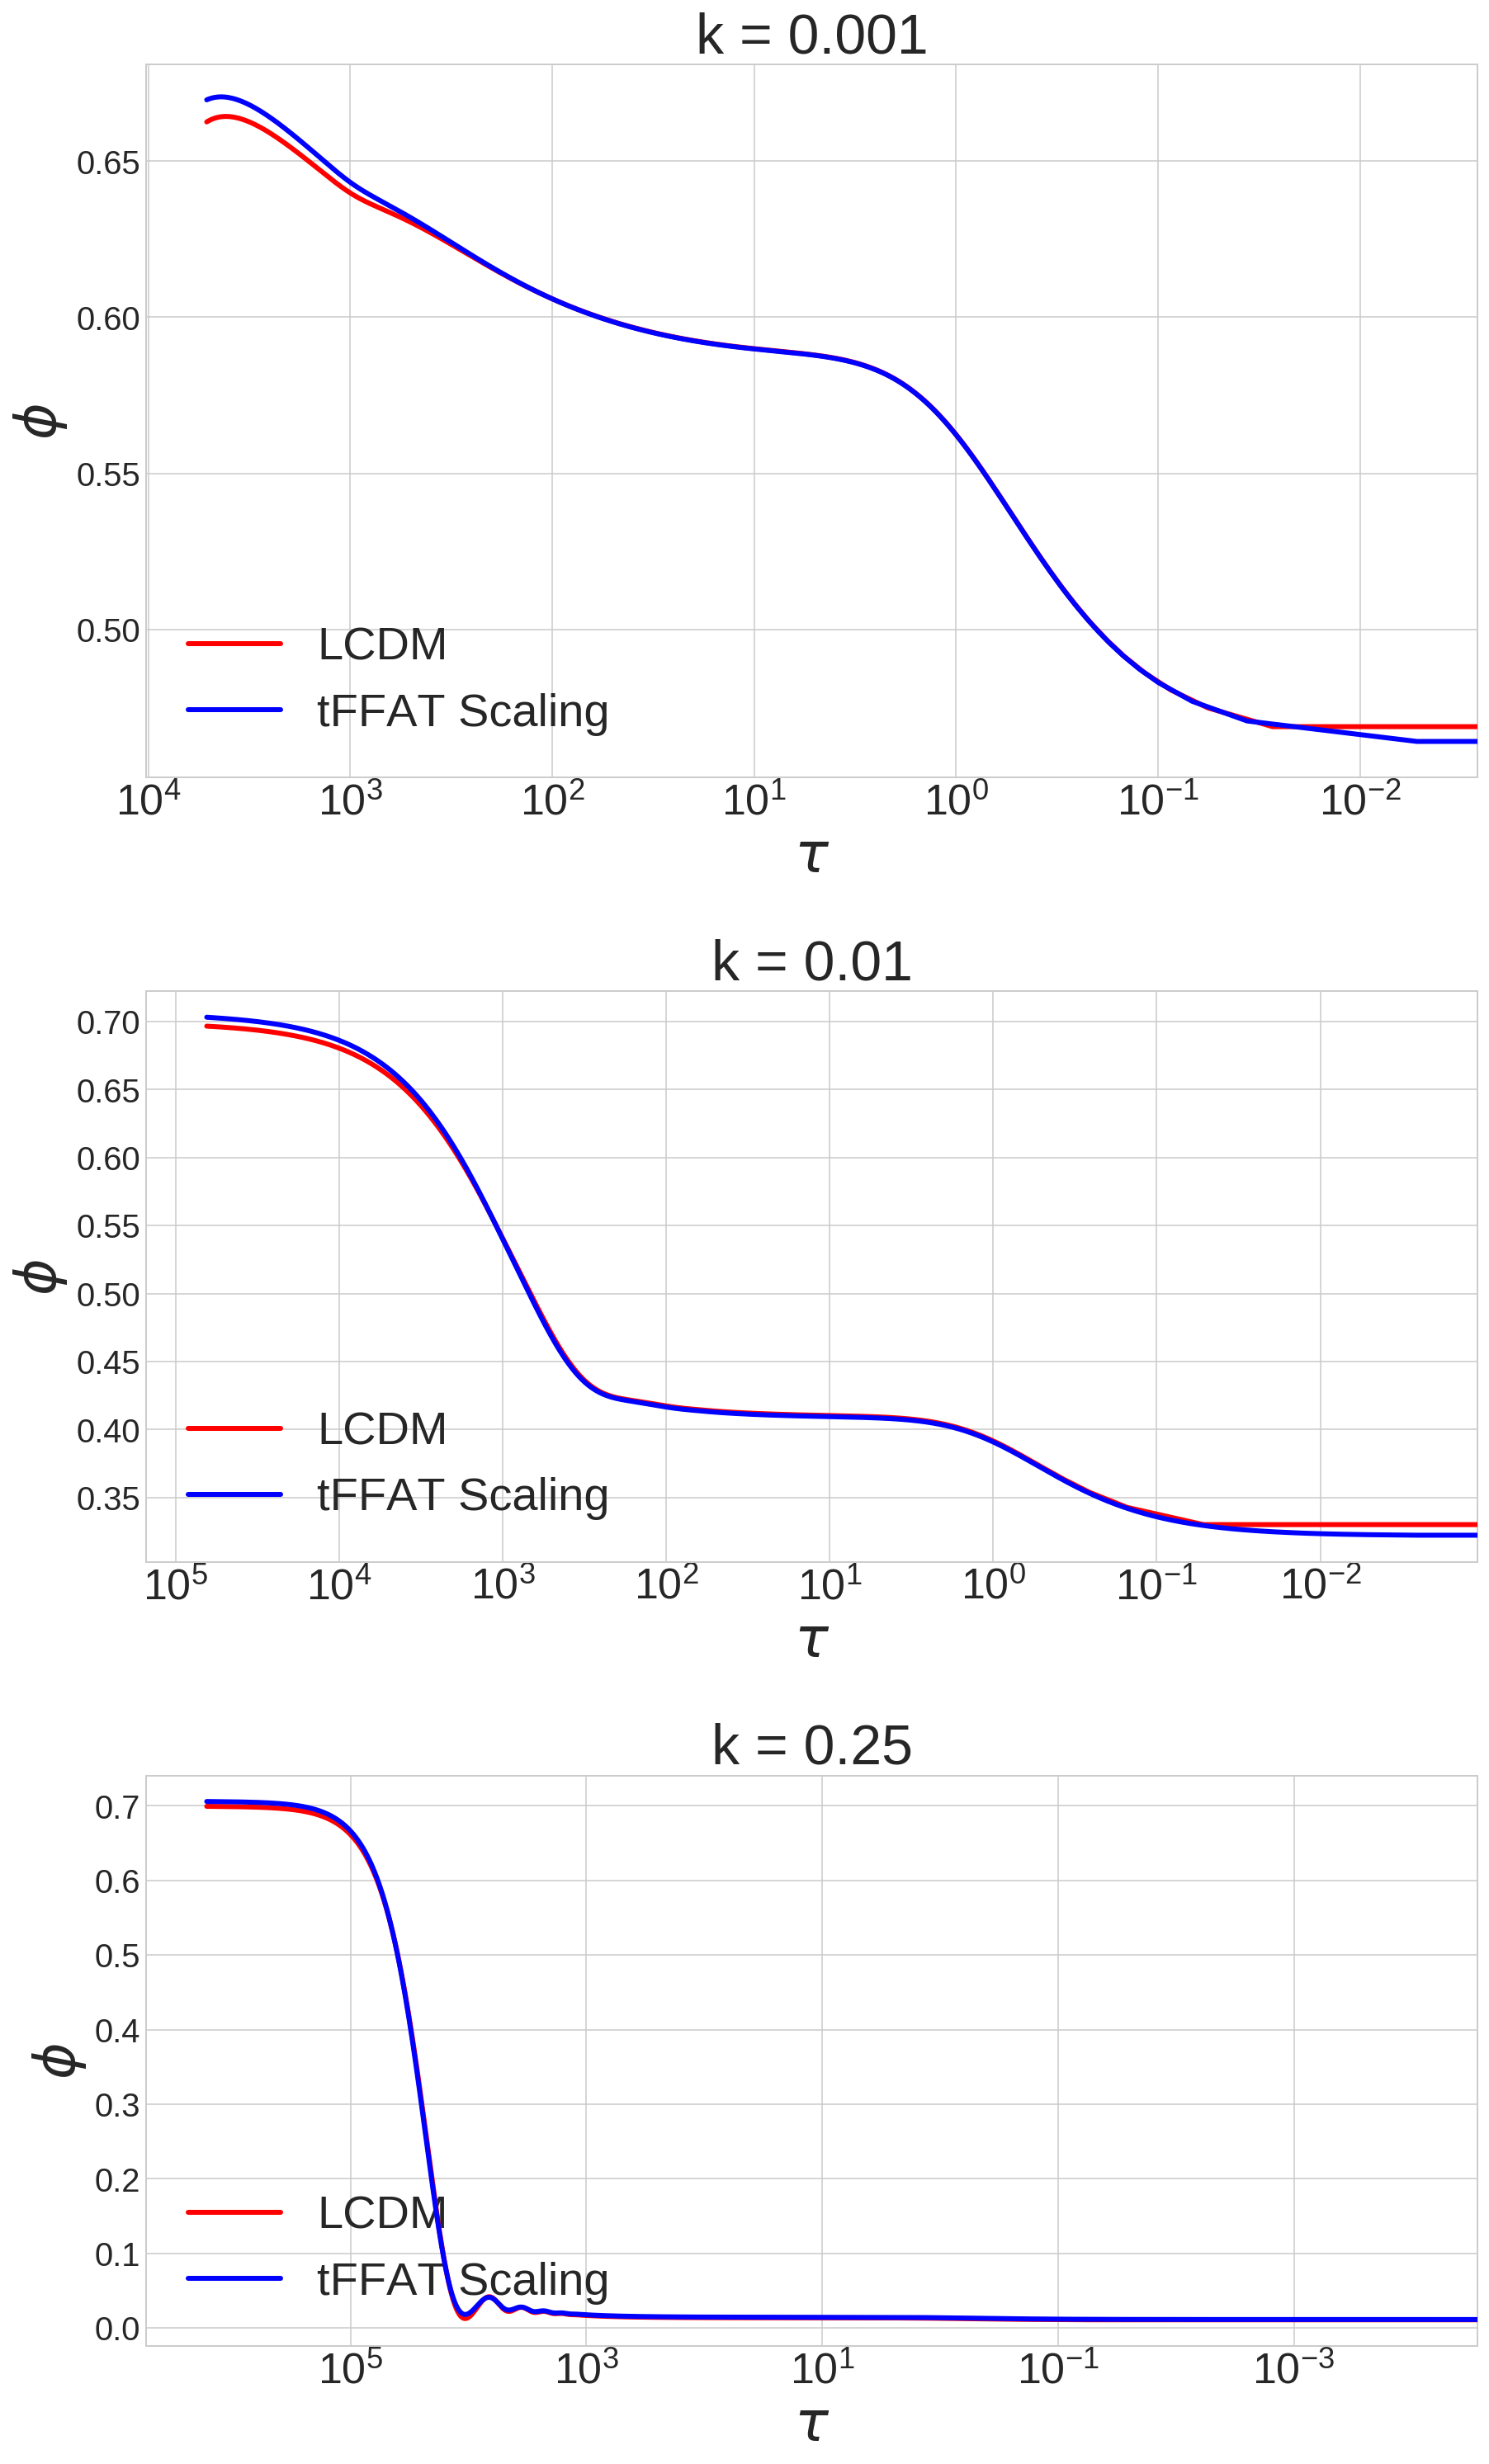

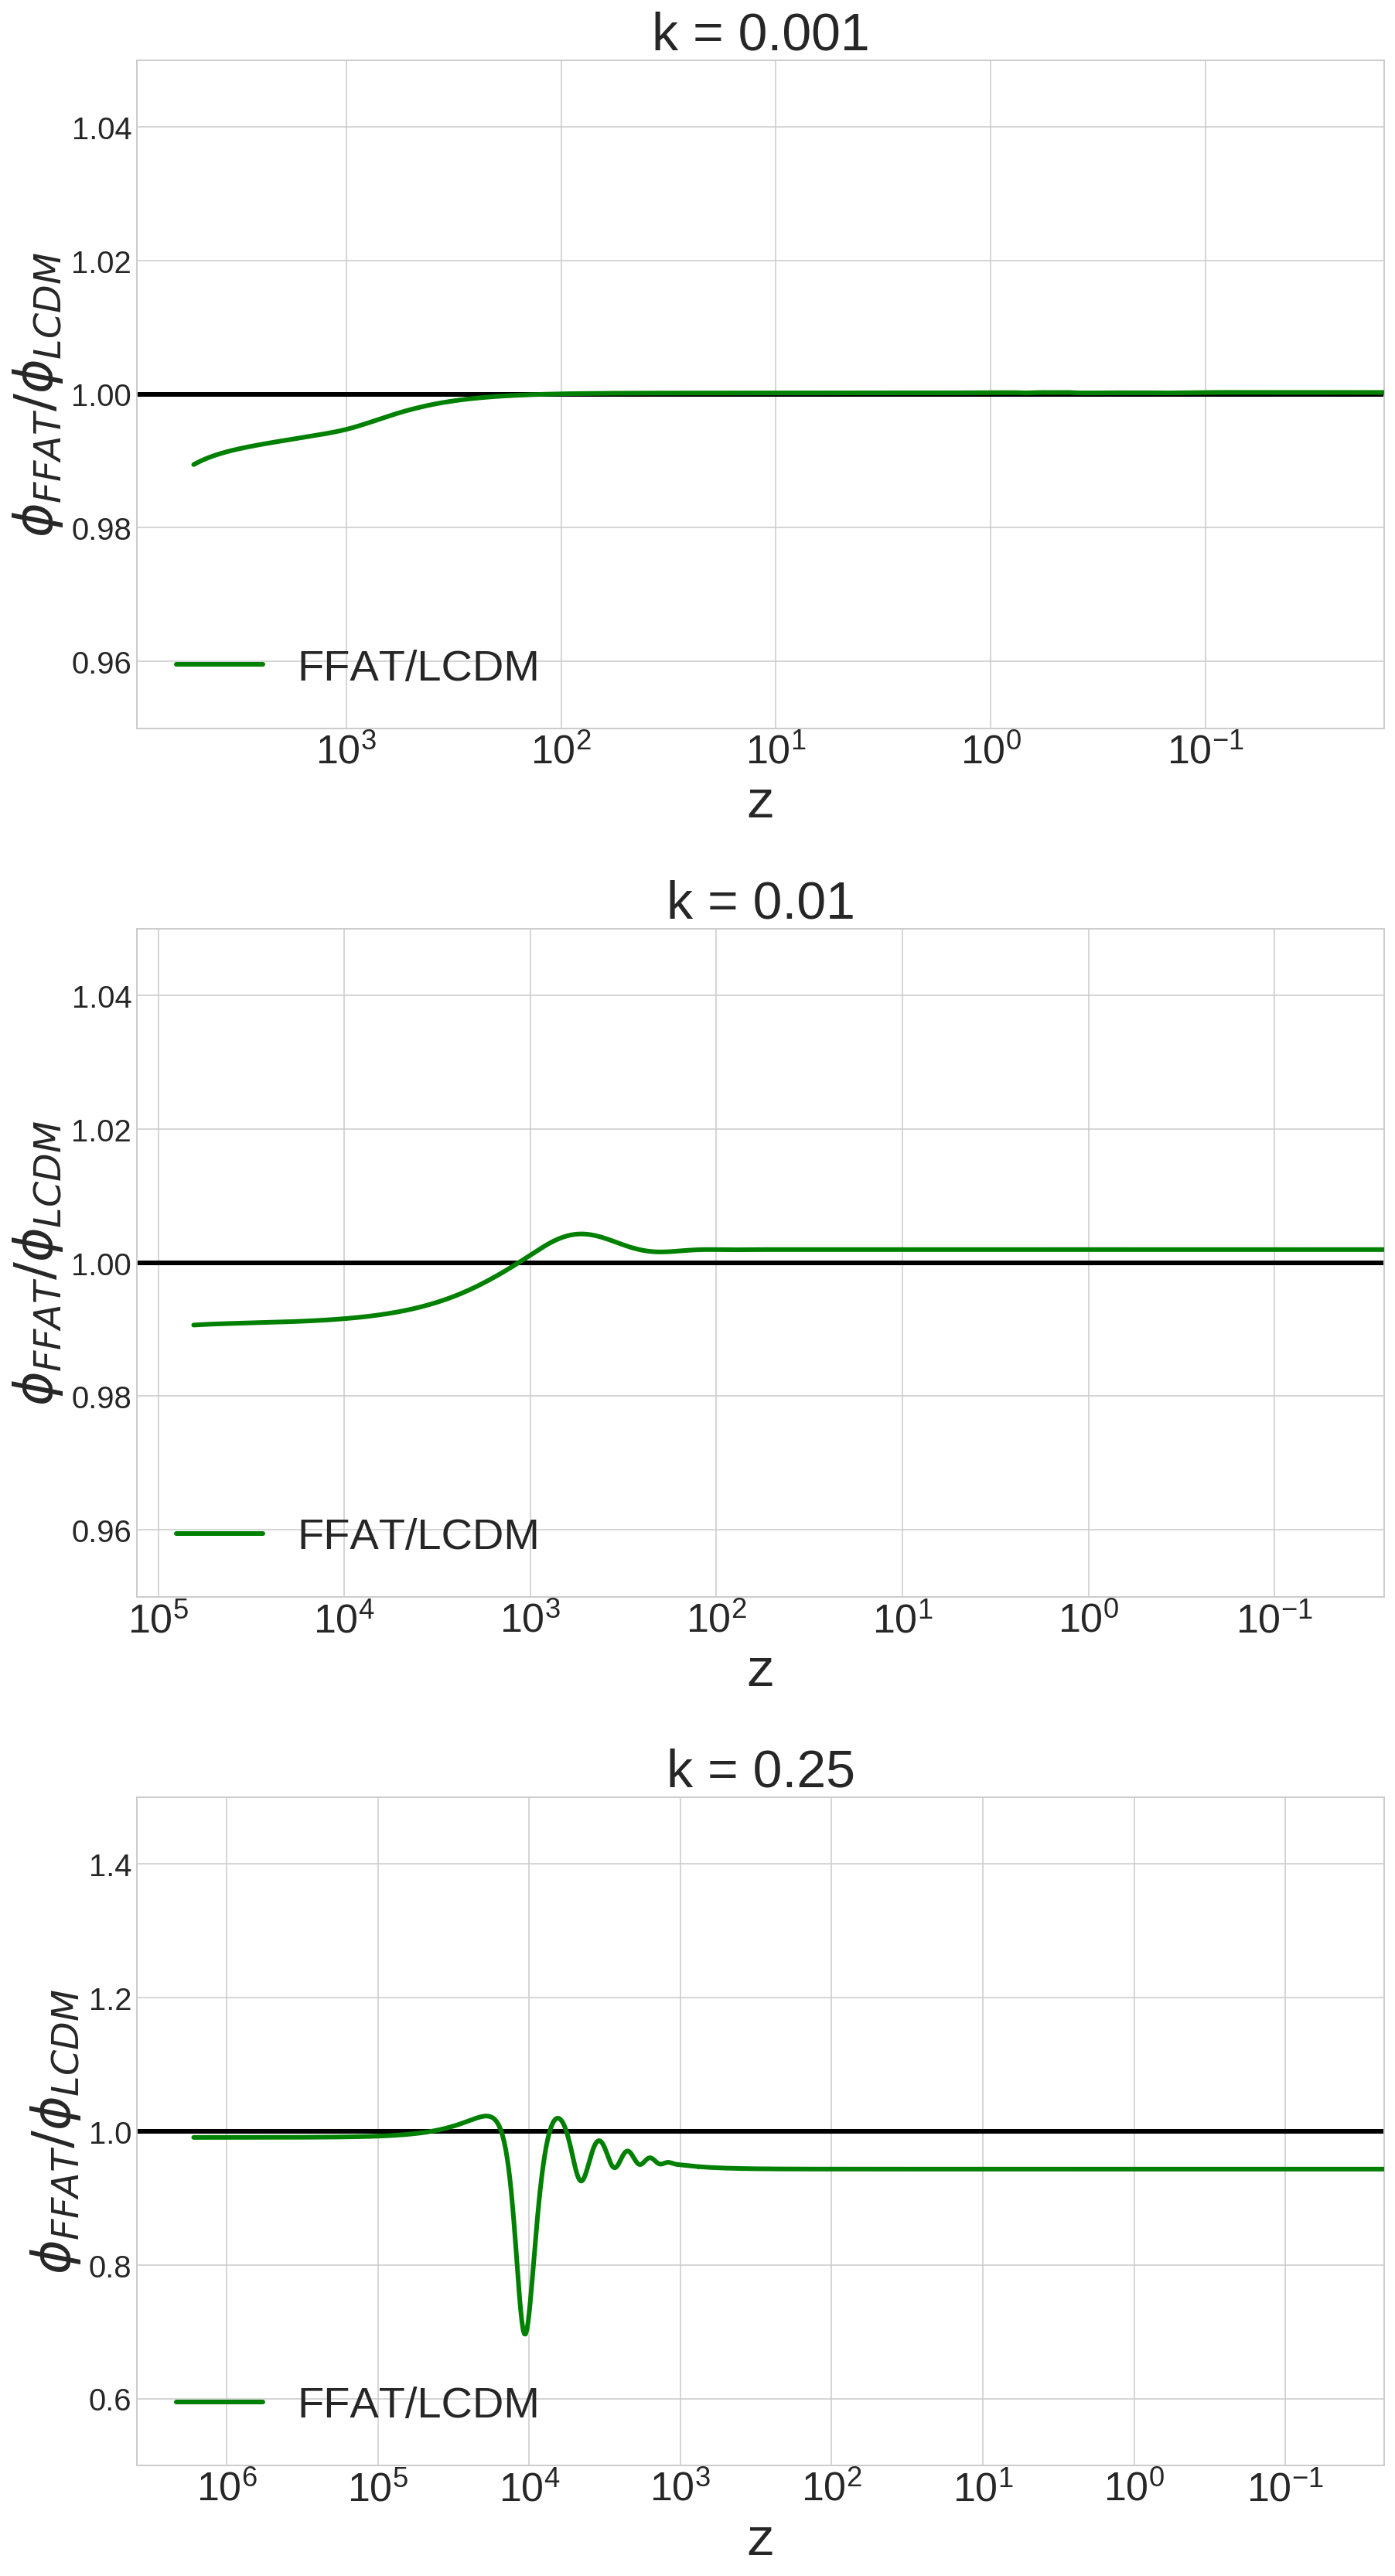

In [217]:
y1 = LCDM_phi_k0
x1 = LCDM_tau_k0
#x1 = LCDM_scale_k0
y2 = FFAT_phi_k0
x2 = FFAT_tau_k0
#x2 = FFAT_scale_k0

b1 = LCDM_phi_k1
a1 = LCDM_tau_k1
b2 = FFAT_phi_k1
a2 = FFAT_tau_k1

d1 = LCDM_phi_k2
c1 = LCDM_tau_k2
d2 = FFAT_phi_k2
c2 = FFAT_tau_k2

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="red",zorder=8,linewidth=3)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"$\tau$",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\phi$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title("k = 0.001",fontsize = 34)
#plt.xlim(0.01,)
frame1.invert_xaxis()
plt.xscale("log")

frame2=fig1.add_axes((.1,-0.05,.8,.4))        
plt.plot(a1,b1,color="red",zorder=8,linewidth=3)
plt.plot(a2,b2,color="blue",zorder=9,linewidth=3)
plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"$\tau$",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\phi$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.01",fontsize = 34)
#plt.xlim(0.01,)
frame2.invert_xaxis()
plt.xscale("log")


frame3=fig1.add_axes((.1,-0.6,.8,.4))        
plt.plot(c1,d1,color="red",zorder=8,linewidth=3)
plt.plot(c2,d2,color="blue",zorder=9,linewidth=3)
plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"$\tau$",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\phi$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.25",fontsize = 34)
#plt.xlim(0.01,)
frame3.invert_xaxis()
plt.xscale("log")


fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('phi.pdf', dpi=800,bbox_inches='tight')  
plt.show()

from scipy import interpolate
f = interpolate.interp1d(x2,y2)
y1_interp = f(x1)
f = interpolate.interp1d(a2,b2)
b1_interp = f(a1)
f = interpolate.interp1d(c2,d2)
d1_interp = f(c1)

y_ratio = y1/y1_interp
b_ratio = b1/b1_interp
d_ratio = d1/d1_interp

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y_ratio,color="green",zorder=8,linewidth=3)
#plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\phi_{FFAT}/\phi_{LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title("k = 0.001",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.95,1.05)
frame1.invert_xaxis()
plt.xscale("log")

frame2=fig1.add_axes((.1,-0.15,.8,.5))        
plt.plot(a1,b_ratio,color="green",zorder=8,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\phi_{FFAT}/\phi_{LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.01",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.95,1.05)
frame2.invert_xaxis()
plt.xscale("log")


frame3=fig1.add_axes((.1,-0.8,.8,.5))        
plt.plot(c1,d_ratio,color="green",zorder=8,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\phi_{FFAT}/\phi_{LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.25",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
#plt.xlim(0.01,)
plt.ylim(0.5,1.5)
frame3.invert_xaxis()
plt.xscale("log")


fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('phi_ratio.pdf', dpi=800,bbox_inches='tight')  
plt.show()

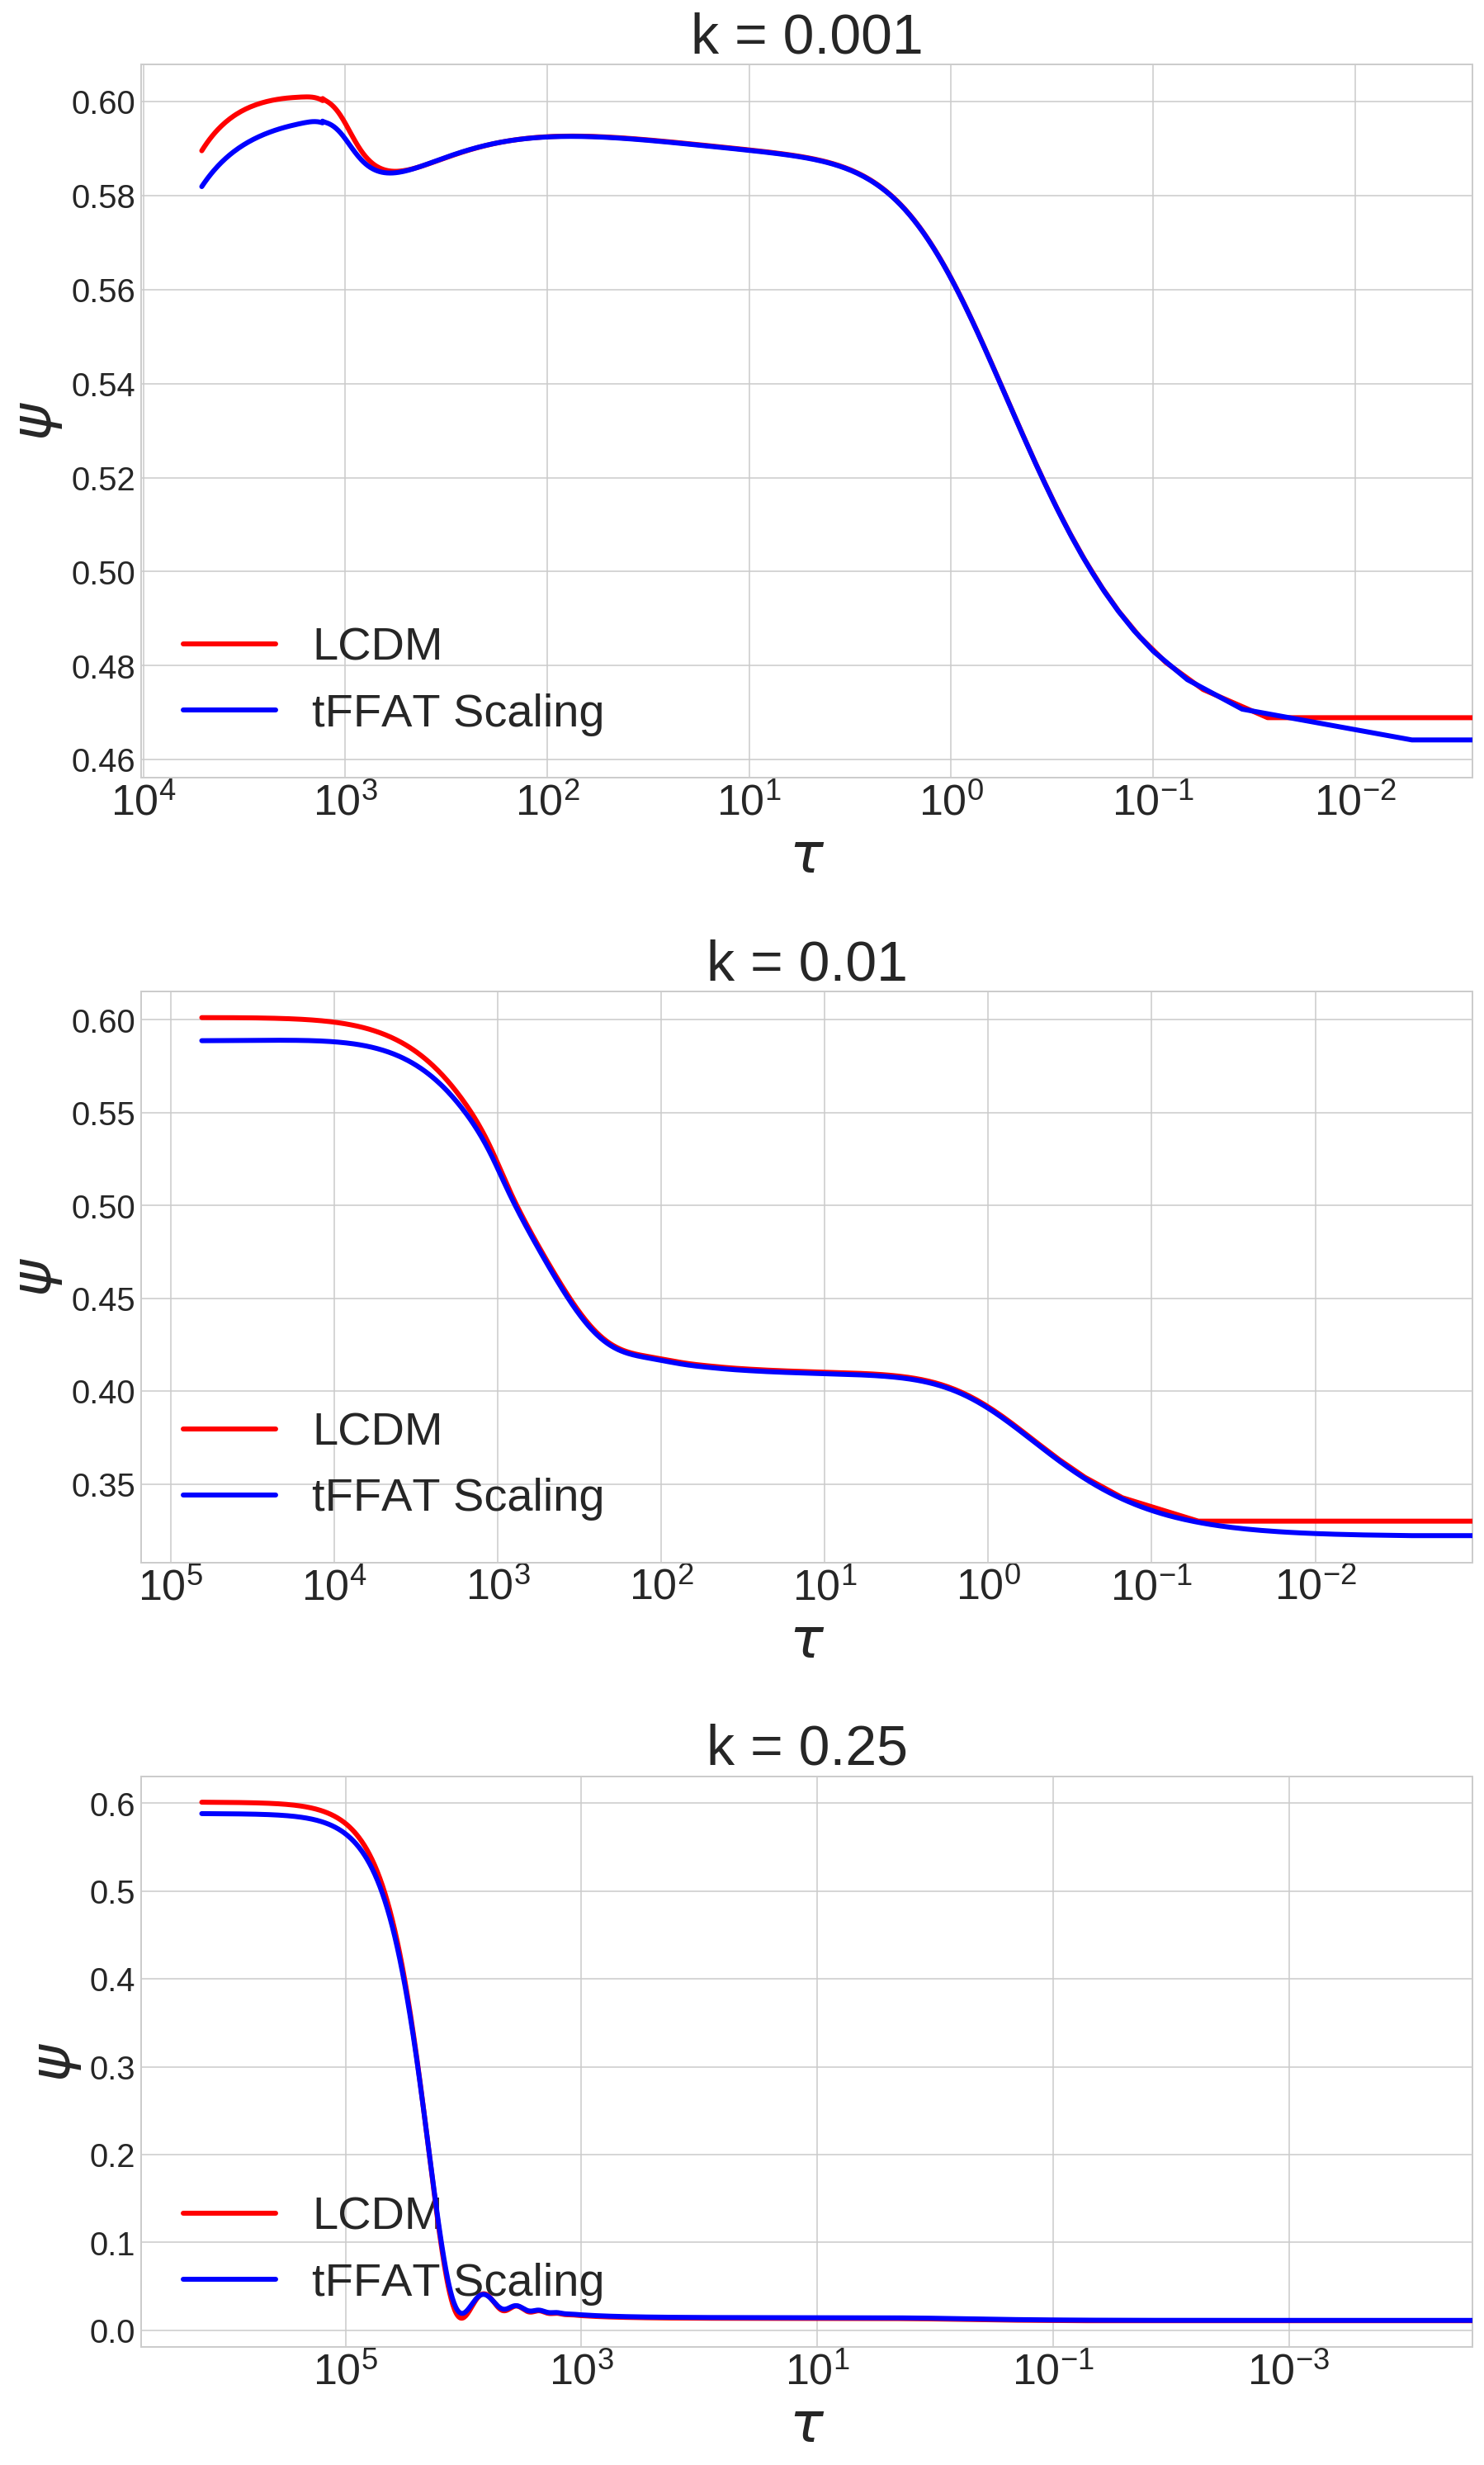

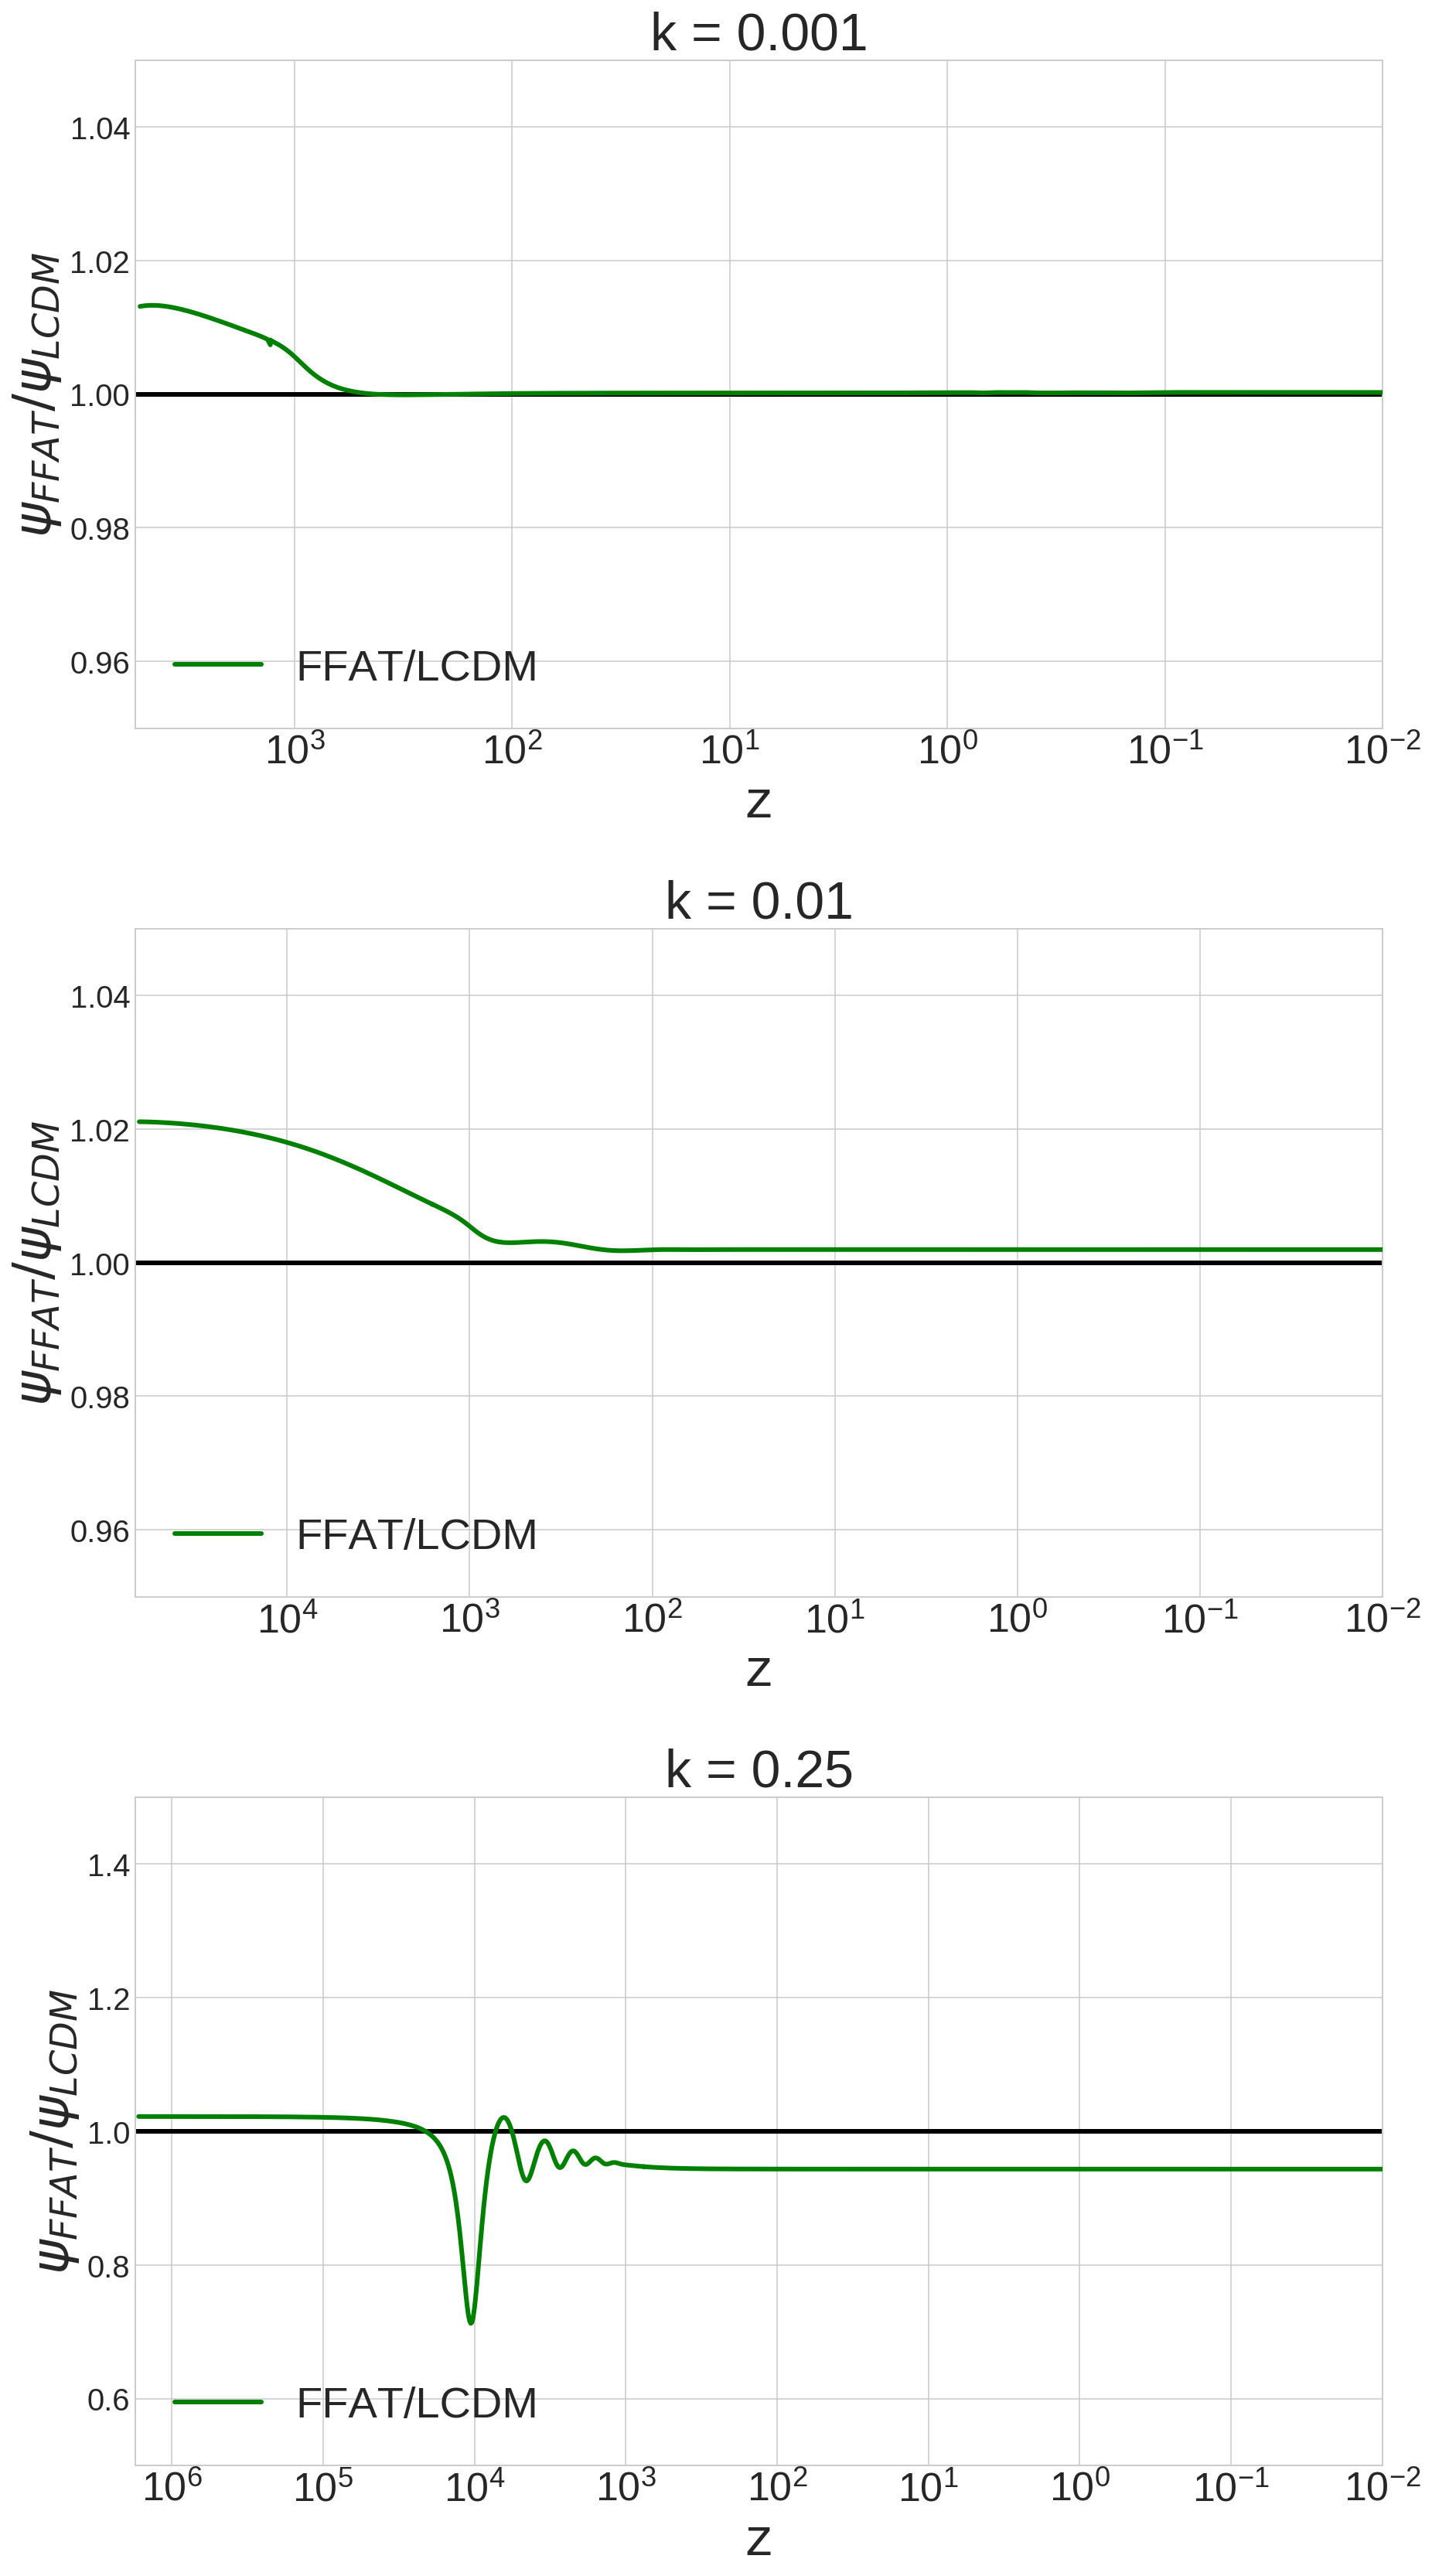

In [218]:
y1 = LCDM_psi_k0
x1 = LCDM_tau_k0
#x1 = LCDM_scale_k0
y2 = FFAT_psi_k0
x2 = FFAT_tau_k0
#x2 = FFAT_scale_k0

b1 = LCDM_psi_k1
a1 = LCDM_tau_k1
b2 = FFAT_psi_k1
a2 = FFAT_tau_k1

d1 = LCDM_psi_k2
c1 = LCDM_tau_k2
d2 = FFAT_psi_k2
c2 = FFAT_tau_k2

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y1,color="red",zorder=8,linewidth=3)
plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"$\tau$",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\psi$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title("k = 0.001",fontsize = 34)
#plt.xlim(0.01,)
frame1.invert_xaxis()
plt.xscale("log")

frame2=fig1.add_axes((.1,-0.05,.8,.4))        
plt.plot(a1,b1,color="red",zorder=8,linewidth=3)
plt.plot(a2,b2,color="blue",zorder=9,linewidth=3)
plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"$\tau$",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\psi$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.01",fontsize = 34)
#plt.xlim(0.01,)
frame2.invert_xaxis()
plt.xscale("log")


frame3=fig1.add_axes((.1,-0.6,.8,.4))        
plt.plot(c1,d1,color="red",zorder=8,linewidth=3)
plt.plot(c2,d2,color="blue",zorder=9,linewidth=3)
plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['LCDM','tFFAT Scaling'],loc = 3, fontsize=28)
plt.xlabel(r"$\tau$",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\psi$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.25",fontsize = 34)
#plt.xlim(0.01,)
frame3.invert_xaxis()
plt.xscale("log")


fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('psi.pdf', dpi=800,bbox_inches='tight')  
plt.show()

from scipy import interpolate
f = interpolate.interp1d(x2,y2)
y1_interp = f(x1)
f = interpolate.interp1d(a2,b2)
b1_interp = f(a1)
f = interpolate.interp1d(c2,d2)
d1_interp = f(c1)

y_ratio = y1/y1_interp
b_ratio = b1/b1_interp
d_ratio = d1/d1_interp

fig1 = figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.5))
plt.plot(x1,y_ratio,color="green",zorder=8,linewidth=3)
#plt.plot(x2,y2,color="blue",zorder=9,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\psi_{FFAT}/\psi_{LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.title("k = 0.001",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
plt.xlim(0.01,)
plt.ylim(0.95,1.05)
frame1.invert_xaxis()
plt.xscale("log")

frame2=fig1.add_axes((.1,-0.15,.8,.5))        
plt.plot(a1,b_ratio,color="green",zorder=8,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\psi_{FFAT}/\psi_{LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.01",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
plt.xlim(0.01,)
plt.ylim(0.95,1.05)
frame2.invert_xaxis()
plt.xscale("log")


frame3=fig1.add_axes((.1,-0.8,.8,.5))        
plt.plot(c1,d_ratio,color="green",zorder=8,linewidth=3)

plt.grid(True)
plt.yticks(fontsize= 28)
plt.legend(['FFAT/LCDM'],loc = 3, fontsize=28)
plt.xlabel(r"z",fontsize=34)
plt.yticks(fontsize= 20)
plt.ylabel(r'$\psi_{FFAT}/\psi_{LCDM}$',fontsize=34)
plt.xticks(fontsize= 26)
plt.grid(True)
plt.title("k = 0.25",fontsize = 34)
plt.axhline(1,color='black',linewidth=3)
plt.xlim(0.01,)
plt.ylim(0.5,1.5)
frame3.invert_xaxis()
plt.xscale("log")


fig = plt.gcf()
fig.set_size_inches(14, 12)
fig.savefig('psi_ratio.pdf', dpi=800,bbox_inches='tight')  
plt.show()